# Ejemplo 01:
Estas son las librerías que utilizaremos.

In [1]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings

In [2]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
df = pd.read_csv('../proyecto/metro.csv')
df

fecha    mes  anio     linea         estacion  tipo_pago  \
0       2021-01-01  Enero  2021   Linea 1         Balbuena     Boleto   
1       2021-01-01  Enero  2021   Linea 1         Balbuena    Prepago   
2       2021-01-01  Enero  2021   Linea 1         Balbuena  Gratuidad   
3       2021-01-01  Enero  2021   Linea 1         Balderas     Boleto   
4       2021-01-01  Enero  2021   Linea 1         Balderas    Prepago   
...            ...    ...   ...       ...              ...        ...   
551065  2023-07-31  Julio  2023  Linea 12  Insurgentes Sur    Prepago   
551066  2023-07-31  Julio  2023  Linea 12  Insurgentes Sur  Gratuidad   
551067  2023-07-31  Julio  2023  Linea 12          Mixcoac     Boleto   
551068  2023-07-31  Julio  2023  Linea 12          Mixcoac    Prepago   
551069  2023-07-31  Julio  2023  Linea 12          Mixcoac  Gratuidad   

        afluencia  
0            1848  
1             790  
2             325  
3            1103  
4             922  
...           ...  
551065      22961  
551066       2617  
551067          0  
551068       8962  
551069       1025  

[551070 rows x 7 columns]

In [4]:
df.shape

(551070, 7)

In [5]:
df.dtypes

fecha        object
mes          object
anio          int64
linea        object
estacion     object
tipo_pago    object
afluencia     int64
dtype: object

In [6]:
df.rename(columns={'anio': 'año'}, inplace=True)

In [7]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [8]:
df.dtypes

fecha        datetime64[ns]
mes                  object
año                   int64
linea                object
estacion             object
tipo_pago            object
afluencia             int64
dtype: object

In [9]:
df = df.drop(columns=['mes','año'])

In [10]:
df['dia_semana'] = df['fecha'].dt.day_name()
df['semana'] = df['fecha'].dt.strftime('%U')
df

fecha     linea         estacion  tipo_pago  afluencia dia_semana  \
0      2021-01-01   Linea 1         Balbuena     Boleto       1848     Friday   
1      2021-01-01   Linea 1         Balbuena    Prepago        790     Friday   
2      2021-01-01   Linea 1         Balbuena  Gratuidad        325     Friday   
3      2021-01-01   Linea 1         Balderas     Boleto       1103     Friday   
4      2021-01-01   Linea 1         Balderas    Prepago        922     Friday   
...           ...       ...              ...        ...        ...        ...   
551065 2023-07-31  Linea 12  Insurgentes Sur    Prepago      22961     Monday   
551066 2023-07-31  Linea 12  Insurgentes Sur  Gratuidad       2617     Monday   
551067 2023-07-31  Linea 12          Mixcoac     Boleto          0     Monday   
551068 2023-07-31  Linea 12          Mixcoac    Prepago       8962     Monday   
551069 2023-07-31  Linea 12          Mixcoac  Gratuidad       1025     Monday   

       semana  
0          00  
1          00  
2          00  
3          00  
4          00  
...       ...  
551065     31  
551066     31  
551067     31  
551068     31  
551069     31  

[551070 rows x 7 columns]

In [11]:
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['dia_del_año'] = df['fecha'].dt.dayofyear


In [12]:
nuevo_orden = ['dia','mes','año',"dia_semana","dia_del_año","semana", 'linea', 'estacion', 'tipo_pago', 'afluencia']

# Reorganizar las columnas según el nuevo orden
df = df[nuevo_orden]


In [13]:
df

dia  mes   año dia_semana  dia_del_año semana     linea  \
0         1    1  2021     Friday            1     00   Linea 1   
1         1    1  2021     Friday            1     00   Linea 1   
2         1    1  2021     Friday            1     00   Linea 1   
3         1    1  2021     Friday            1     00   Linea 1   
4         1    1  2021     Friday            1     00   Linea 1   
...     ...  ...   ...        ...          ...    ...       ...   
551065   31    7  2023     Monday          212     31  Linea 12   
551066   31    7  2023     Monday          212     31  Linea 12   
551067   31    7  2023     Monday          212     31  Linea 12   
551068   31    7  2023     Monday          212     31  Linea 12   
551069   31    7  2023     Monday          212     31  Linea 12   

               estacion  tipo_pago  afluencia  
0              Balbuena     Boleto       1848  
1              Balbuena    Prepago        790  
2              Balbuena  Gratuidad        325  
3              Balderas     Boleto       1103  
4              Balderas    Prepago        922  
...                 ...        ...        ...  
551065  Insurgentes Sur    Prepago      22961  
551066  Insurgentes Sur  Gratuidad       2617  
551067          Mixcoac     Boleto          0  
551068          Mixcoac    Prepago       8962  
551069          Mixcoac  Gratuidad       1025  

[551070 rows x 10 columns]

In [14]:
mapeo_dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplica la función de mapeo a la columna 'dia_semana' usando .loc
df.loc[:, 'dia_semana'] = df['dia_semana'].map(mapeo_dias_semana)

In [15]:
df

dia  mes   año dia_semana  dia_del_año semana     linea  \
0         1    1  2021    Viernes            1     00   Linea 1   
1         1    1  2021    Viernes            1     00   Linea 1   
2         1    1  2021    Viernes            1     00   Linea 1   
3         1    1  2021    Viernes            1     00   Linea 1   
4         1    1  2021    Viernes            1     00   Linea 1   
...     ...  ...   ...        ...          ...    ...       ...   
551065   31    7  2023      Lunes          212     31  Linea 12   
551066   31    7  2023      Lunes          212     31  Linea 12   
551067   31    7  2023      Lunes          212     31  Linea 12   
551068   31    7  2023      Lunes          212     31  Linea 12   
551069   31    7  2023      Lunes          212     31  Linea 12   

               estacion  tipo_pago  afluencia  
0              Balbuena     Boleto       1848  
1              Balbuena    Prepago        790  
2              Balbuena  Gratuidad        325  
3              Balderas     Boleto       1103  
4              Balderas    Prepago        922  
...                 ...        ...        ...  
551065  Insurgentes Sur    Prepago      22961  
551066  Insurgentes Sur  Gratuidad       2617  
551067          Mixcoac     Boleto          0  
551068          Mixcoac    Prepago       8962  
551069          Mixcoac  Gratuidad       1025  

[551070 rows x 10 columns]

In [16]:
#Busca los nan
df.isna().sum()

dia            0
mes            0
año            0
dia_semana     0
dia_del_año    0
semana         0
linea          0
estacion       0
tipo_pago      0
afluencia      0
dtype: int64

In [17]:
df.columns

Index(['dia', 'mes', 'año', 'dia_semana', 'dia_del_año', 'semana', 'linea',
       'estacion', 'tipo_pago', 'afluencia'],
      dtype='object')

In [18]:
df["año"].unique()

array([2021, 2022, 2023])

In [19]:
df["semana"].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52'], dtype=object)

In [20]:
df["dia_del_año"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
df["linea"].unique()

array(['Linea 1', 'Linea 12', 'Linea 2', 'Linea 3', 'Linea 4', 'Linea 5',
       'Linea 6', 'Linea 7', 'Linea 8', 'Linea 9', 'Linea A', 'Linea B'],
      dtype=object)

In [22]:
df["estacion"].unique()

array(['Balbuena', 'Balderas', 'Boulevard Puerto Aéreo', 'Candelaria',
       'Chapultepec', 'Cuauhtémoc', 'Gómez Farías', 'Insurgentes',
       'Isabel la Católica', 'Juanacatlán', 'Merced', 'Moctezuma',
       'Observatorio', 'Pantitlán', 'Pino Suárez', 'Salto del Agua',
       'San Lázaro', 'Sevilla', 'Tacubaya', 'Zaragoza',
       'Hospital 20 de Noviembre', 'Atlalilco', 'Calle 11', 'Culhuacán',
       'Eje Central', 'Ermita', 'Insurgentes Sur', 'Lomas Estrella',
       'Mexicaltzingo', 'Mixcoac', 'Nopalera', 'Olivos',
       'Parque de los Venados', 'Periférico Oriente',
       'San Andrés Tomatlán', 'Tezonco', 'Tláhuac', 'Tlaltenco', 'Zapata',
       'Zapotitlán', 'Allende', 'Bellas Artes', 'Chabacano',
       'Colegio Militar', 'Cuatro Caminos', 'Cuitláhuac', 'General Anaya',
       'Hidalgo', 'Nativitas', 'Normal', 'Panteones', 'Popotla',
       'Portales', 'Revolución', 'San Antonio Abad', 'San Cosme',
       'Tacuba', 'Tasqueña', 'Viaducto', 'Villa de Cortés', 'Xola',
       

In [23]:
df["tipo_pago"].unique()

array(['Boleto', 'Prepago', 'Gratuidad'], dtype=object)

In [24]:
df["dia_semana"].unique()

array(['Viernes', 'Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles',
       'Jueves'], dtype=object)

In [25]:
df_resp = df.copy()

In [24]:
#por si algo falla
df=df_resp.copy()

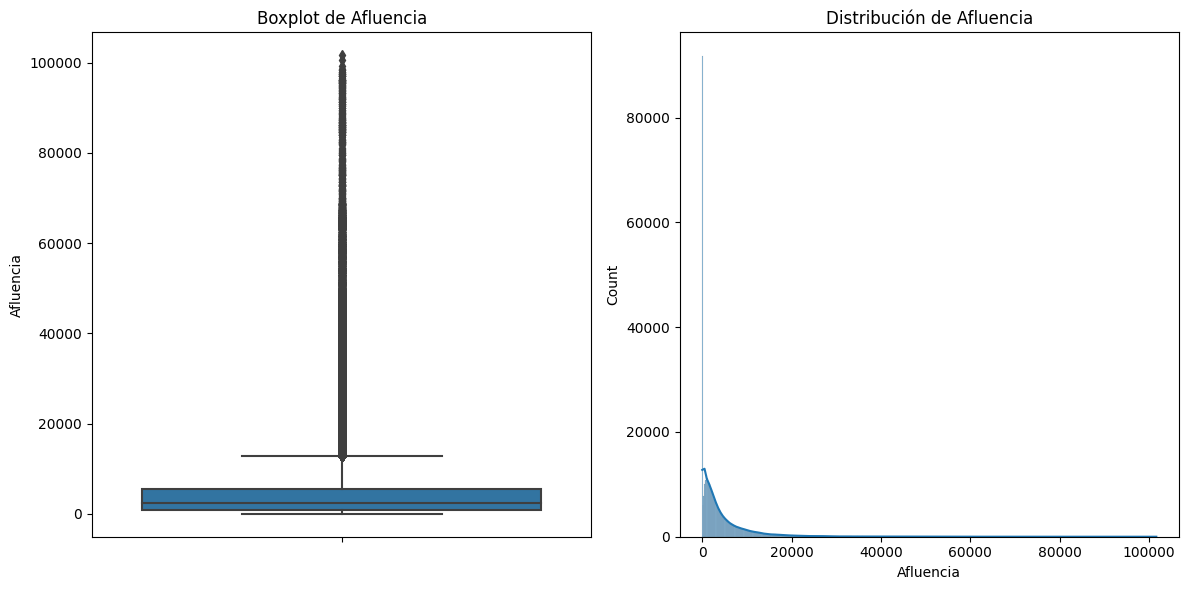

In [26]:
# Crear una figura con dos subgráficos (uno para el boxplot y otro para la distribución)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot de la afluencia
sns.boxplot(data=df, y='afluencia', ax=axes[0])
axes[0].set_title('Boxplot de Afluencia')
axes[0].set_ylabel('Afluencia')

# Gráfico de densidad (distribución) de la afluencia
sns.histplot(data=df, x='afluencia', kde=True, ax=axes[1])
axes[1].set_title('Distribución de Afluencia')
axes[1].set_xlabel('Afluencia')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


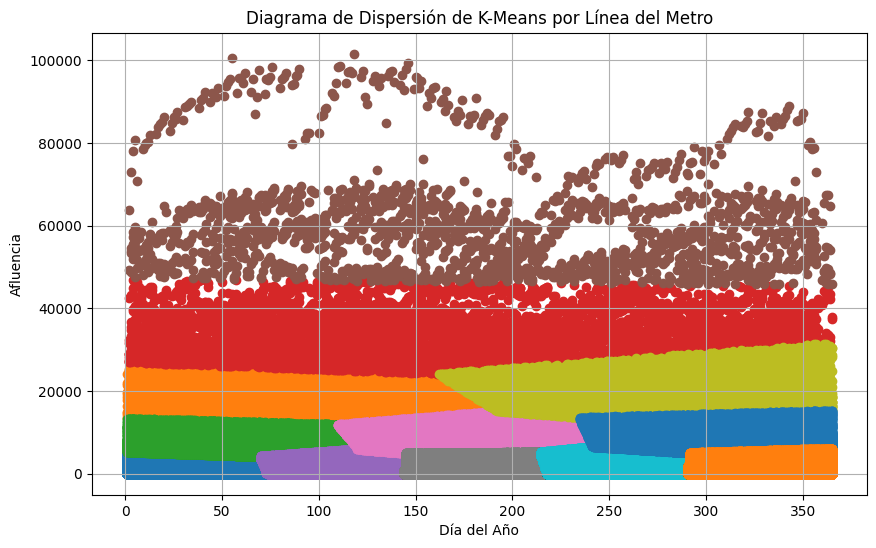

In [27]:

# Seleccionar las columnas relevantes para el clustering
data = df[['dia_del_año', 'afluencia', 'linea']]

# Codificar las variables categóricas (linea) usando one-hot encoding
data = pd.get_dummies(data, columns=['linea'], drop_first=True)

# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['dia_del_año', 'afluencia']])

# Aplicar K-Means para agrupar por línea del metro
kmeans = KMeans(n_clusters=12)  # Cambia el número de clusters según tus necesidades
data['cluster'] = kmeans.fit_predict(scaled_data)

# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['dia_del_año'], cluster_data['afluencia'], label=f'Cluster {cluster}')

plt.xlabel('Día del Año')
plt.ylabel('Afluencia')
plt.title('Diagrama de Dispersión de K-Means por Línea del Metro')


plt.grid()
plt.show()

In [27]:
df_32 = df[df['afluencia'] >= 20000]
df_32

dia  mes   año dia_semana  dia_del_año semana     linea  \
718       2    1  2021     Sábado            2     00   Linea 2   
811       2    1  2021     Sábado            2     00   Linea 3   
1347      3    1  2021    Domingo            3     01   Linea 2   
1396      3    1  2021    Domingo            3     01   Linea 3   
1792      4    1  2021      Lunes            4     01   Linea 1   
...     ...  ...   ...        ...          ...    ...       ...   
550945   31    7  2023      Lunes          212     31   Linea A   
550948   31    7  2023      Lunes          212     31   Linea B   
551008   31    7  2023      Lunes          212     31   Linea B   
551029   31    7  2023      Lunes          212     31  Linea 12   
551065   31    7  2023      Lunes          212     31  Linea 12   

                  estacion tipo_pago  afluencia  
718         Cuatro Caminos   Prepago      22129  
811          Indios Verdes   Prepago      27447  
1347              Tasqueña    Boleto      20213  
1396         Indios Verdes   Prepago      21194  
1792          Observatorio   Prepago      25527  
...                    ...       ...        ...  
550945              La Paz   Prepago      23682  
550948          Buenavista   Prepago      37057  
551008       Ciudad Azteca   Prepago      26762  
551029  Periférico Oriente   Prepago      36674  
551065     Insurgentes Sur   Prepago      22961  

[16992 rows x 10 columns]

In [28]:
df_32_copy = df_32.copy()  # Crea una copia del DataFrame
df_32_copy.sort_values(by="afluencia", ascending=False, inplace=True)  # Ordena la copia
df_32_copy.head(200)

dia  mes   año dia_semana  dia_del_año semana    linea  \
495889   28    4  2023    Viernes          118     17  Linea 8   
459034   24    2  2023    Viernes           55     08  Linea 8   
512269   26    5  2023    Viernes          146     21  Linea 8   
491794   21    4  2023    Viernes          111     16  Linea 8   
471319   17    3  2023    Viernes           76     11  Linea 8   
...     ...  ...   ...        ...          ...    ...      ...   
362509   12    9  2022      Lunes          255     37  Linea 8   
548539   27    7  2023     Jueves          208     30  Linea 8   
391174   31   10  2022      Lunes          304     44  Linea 8   
356659    2    9  2022    Viernes          245     35  Linea 8   
355489   31    8  2022  Miércoles          243     35  Linea 8   

                    estacion tipo_pago  afluencia  
495889  Constitución de 1917   Prepago     101618  
459034  Constitución de 1917   Prepago     100483  
512269  Constitución de 1917   Prepago      99343  
491794  Constitución de 1917   Prepago      98527  
471319  Constitución de 1917   Prepago      98338  
...                      ...       ...        ...  
362509  Constitución de 1917   Prepago      75089  
548539  Constitución de 1917   Prepago      75087  
391174  Constitución de 1917   Prepago      75043  
356659  Constitución de 1917   Prepago      74934  
355489  Constitución de 1917   Prepago      74507  

[200 rows x 10 columns]

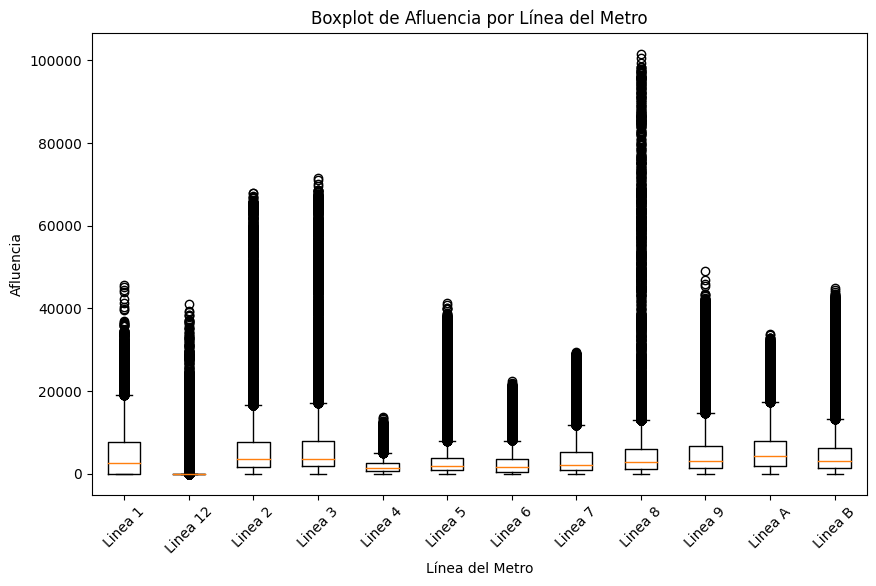

In [27]:
data = df[['linea', 'afluencia']]

# Crear un boxplot para cada línea del metro
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['linea'] == linea]['afluencia'] for linea in data['linea'].unique()], labels=data['linea'].unique())


plt.xlabel('Línea del Metro')
plt.ylabel('Afluencia')
plt.title('Boxplot de Afluencia por Línea del Metro')
plt.xticks(rotation=45)
plt.show()

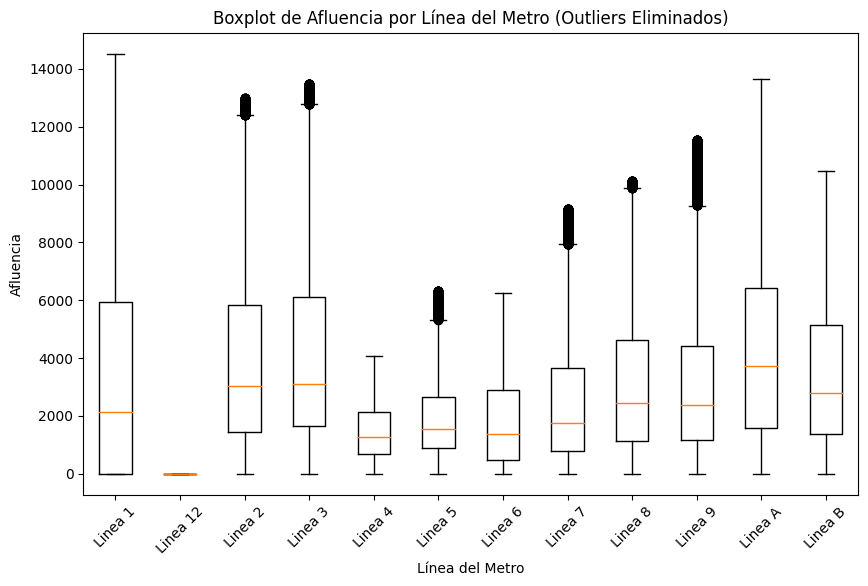

In [28]:
data = df[['linea', 'afluencia']]

# Función para eliminar outliers basados en el rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 0.9 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Limpiar outliers en la columna 'afluencia' por cada línea del metro
data_limpia = pd.DataFrame()
for linea in data['linea'].unique():
    linea_data = data[data['linea'] == linea]
    data_limpia = pd.concat([data_limpia, remove_outliers(linea_data, 'afluencia')])

# Crear un boxplot con los outliers eliminados
plt.figure(figsize=(10, 6))
plt.boxplot([data_limpia[data_limpia['linea'] == linea]['afluencia'] for linea in data_limpia['linea'].unique()], labels=data_limpia['linea'].unique())
plt.xlabel('Línea del Metro')
plt.ylabel('Afluencia')
plt.title('Boxplot de Afluencia por Línea del Metro (Outliers Eliminados)')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Función para eliminar outliers basados en el rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 0.9 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Limpiar outliers en la columna 'afluencia' por cada línea del metro
data_limpia2 = pd.DataFrame()
for linea in df['linea'].unique():
    linea_data = df[df['linea'] == linea]
    data_limpia2 = pd.concat([data_limpia2, remove_outliers(linea_data, 'afluencia')])

data_limpia2

dia  mes   año dia_semana  dia_del_año semana    linea       estacion  \
0         1    1  2021    Viernes            1     00  Linea 1       Balbuena   
1         1    1  2021    Viernes            1     00  Linea 1       Balbuena   
2         1    1  2021    Viernes            1     00  Linea 1       Balbuena   
3         1    1  2021    Viernes            1     00  Linea 1       Balderas   
4         1    1  2021    Viernes            1     00  Linea 1       Balderas   
...     ...  ...   ...        ...          ...    ...      ...            ...   
551003   31    7  2023      Lunes          212     31  Linea B       Olímpica   
551005   31    7  2023      Lunes          212     31  Linea B   Plaza Aragón   
551006   31    7  2023      Lunes          212     31  Linea B   Plaza Aragón   
551007   31    7  2023      Lunes          212     31  Linea B  Ciudad Azteca   
551009   31    7  2023      Lunes          212     31  Linea B  Ciudad Azteca   

        tipo_pago  afluencia  
0          Boleto       1848  
1         Prepago        790  
2       Gratuidad        325  
3          Boleto       1103  
4         Prepago        922  
...           ...        ...  
551003  Gratuidad       2175  
551005    Prepago       3894  
551006  Gratuidad        159  
551007     Boleto       8883  
551009  Gratuidad       3570  

[489304 rows x 10 columns]

In [31]:
df_1 = data_limpia2.reset_index(drop=True)
df_1

dia  mes   año dia_semana  dia_del_año semana    linea       estacion  \
0         1    1  2021    Viernes            1     00  Linea 1       Balbuena   
1         1    1  2021    Viernes            1     00  Linea 1       Balbuena   
2         1    1  2021    Viernes            1     00  Linea 1       Balbuena   
3         1    1  2021    Viernes            1     00  Linea 1       Balderas   
4         1    1  2021    Viernes            1     00  Linea 1       Balderas   
...     ...  ...   ...        ...          ...    ...      ...            ...   
489299   31    7  2023      Lunes          212     31  Linea B       Olímpica   
489300   31    7  2023      Lunes          212     31  Linea B   Plaza Aragón   
489301   31    7  2023      Lunes          212     31  Linea B   Plaza Aragón   
489302   31    7  2023      Lunes          212     31  Linea B  Ciudad Azteca   
489303   31    7  2023      Lunes          212     31  Linea B  Ciudad Azteca   

        tipo_pago  afluencia  
0          Boleto       1848  
1         Prepago        790  
2       Gratuidad        325  
3          Boleto       1103  
4         Prepago        922  
...           ...        ...  
489299  Gratuidad       2175  
489300    Prepago       3894  
489301  Gratuidad        159  
489302     Boleto       8883  
489303  Gratuidad       3570  

[489304 rows x 10 columns]

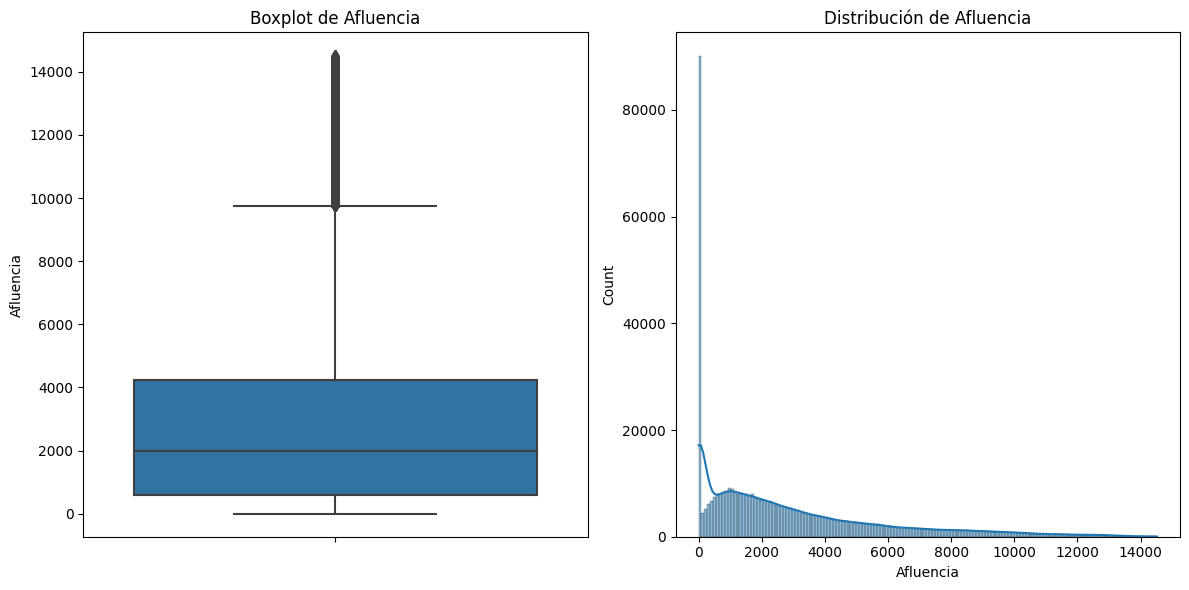

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_1, y='afluencia', ax=axes[0])
axes[0].set_title('Boxplot de Afluencia')
axes[0].set_ylabel('Afluencia')

sns.histplot(data=df_1, x='afluencia', kde=True, ax=axes[1])
axes[1].set_title('Distribución de Afluencia')
axes[1].set_xlabel('Afluencia')

plt.tight_layout()
plt.show()

In [97]:
df_1.columns


Index(['dia', 'mes', 'año', 'dia_semana', 'dia_del_año', 'semana', 'linea',
       'estacion', 'tipo_pago', 'afluencia'],
      dtype='object')

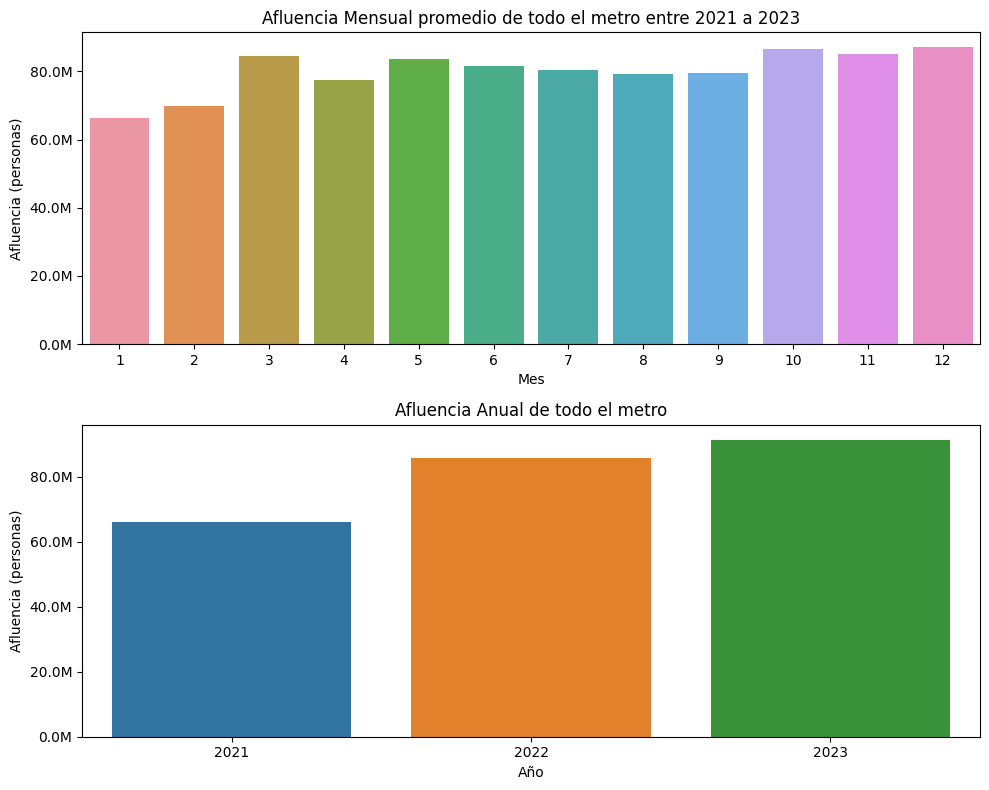

In [35]:
# Agrupar por año y mes, y calcular la suma de la afluencia en cada grupo
afluencia_por_mes_y_año = df.groupby(['año', 'mes'])['afluencia'].sum().reset_index()

# Crear una figura con dos subgráficos (uno para afluencia mensual y otro para afluencia anual)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Función para formatear el eje y en millones
def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Gráfico de afluencia mensual
sns.barplot(x='mes', y='afluencia', data=afluencia_por_mes_y_año, ax=axes[0], errorbar=None)
axes[0].set_title('Afluencia Mensual promedio de todo el metro entre 2021 a 2023')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Afluencia (personas)')
axes[0].yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones

# Gráfico de afluencia anual
sns.barplot(x='año', y='afluencia', data=afluencia_por_mes_y_año, ax=axes[1], errorbar=None)
axes[1].set_title('Afluencia Anual de todo el metro')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Afluencia (personas)')
axes[1].yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

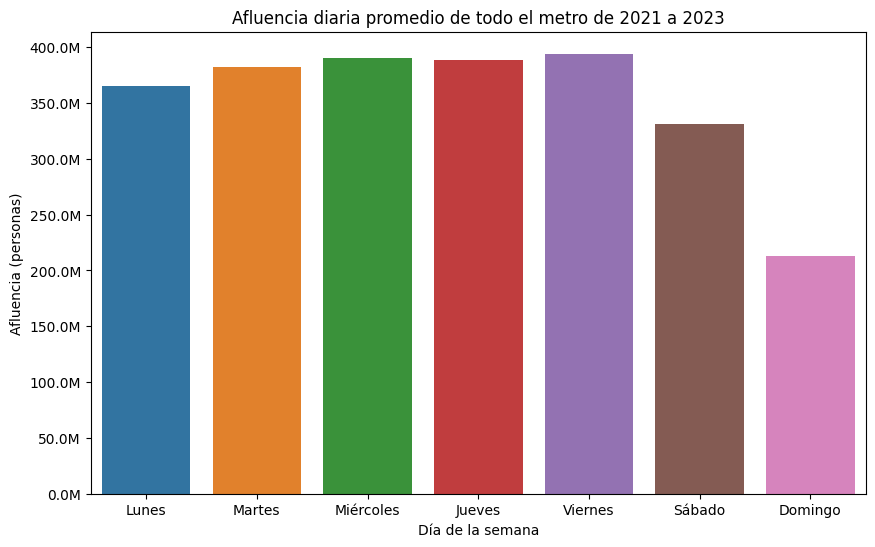

In [36]:
orden_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Aplicar la categoría categórica directamente al DataFrame original
df['dia_semana'] = pd.Categorical(df['dia_semana'], categories=orden_dias_semana, ordered=True)

# Agrupar por día de la semana y calcular la suma de afluencia en cada grupo
afluencia_por_dia = df.groupby('dia_semana')['afluencia'].sum().reset_index()

# Función para formatear el eje y en millones
def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Crear una figura con un único eje
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras de afluencia diaria promedio
sns.barplot(x='dia_semana', y='afluencia', data=afluencia_por_dia, ax=ax, errorbar=None)  # ci=None para quitar las barras de error
ax.set_title('Afluencia diaria promedio de todo el metro de 2021 a 2023')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Afluencia (personas)')
ax.yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones

# Mostrar el gráfico
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8564\2155550552.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


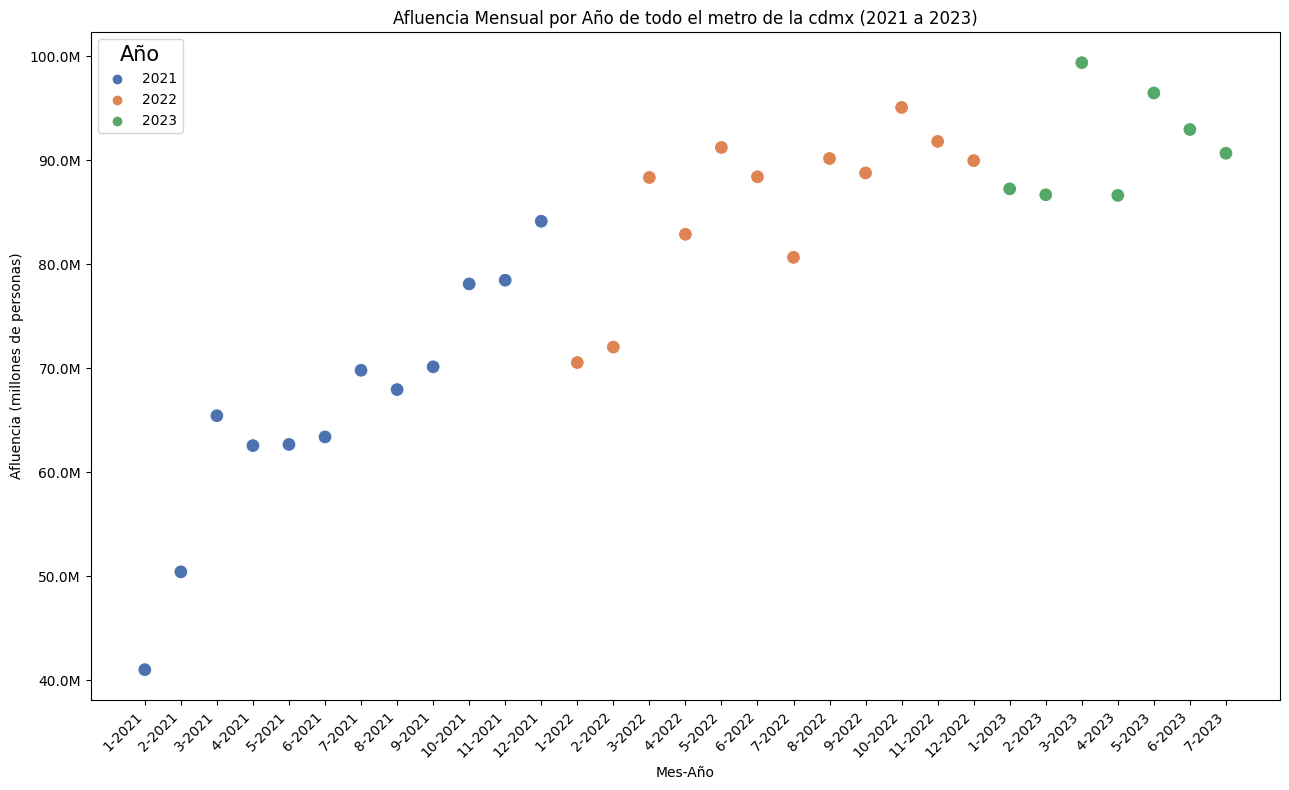

In [34]:
df_general_metro = df.groupby(['año', 'mes'])['afluencia'].sum().reset_index()
def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

plt.figure(figsize=(13, 8))
sns.set_palette("husl")

ax = sns.scatterplot(x=df_general_metro['mes'].astype(str) + '-' + df_general_metro['año'].astype(str), y='afluencia', hue='año', data=df_general_metro,palette='deep', s=100)
plt.title('Afluencia Mensual por Año de todo el metro de la cdmx (2021 a 2023)')
plt.xlabel('Mes-Año')
plt.ylabel('Afluencia (millones de personas)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(FuncFormatter(millones))

plt.legend(title='Año', title_fontsize='15', loc='upper left')
plt.tight_layout()
plt.show()

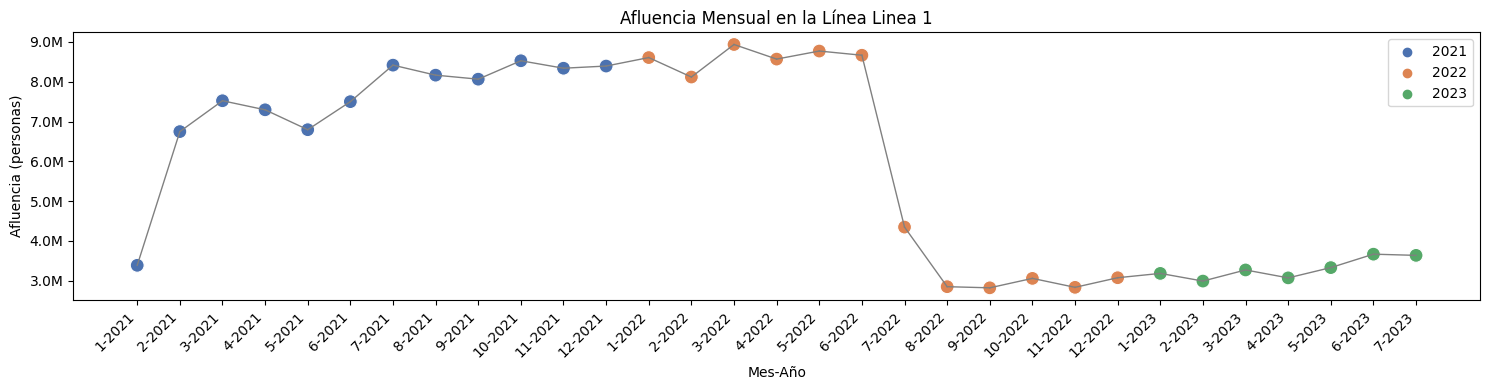

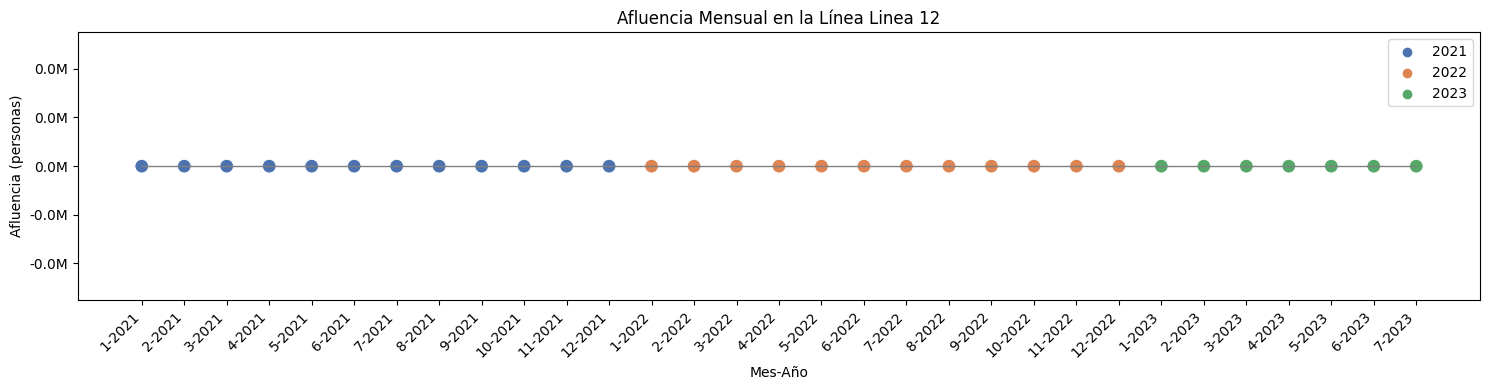

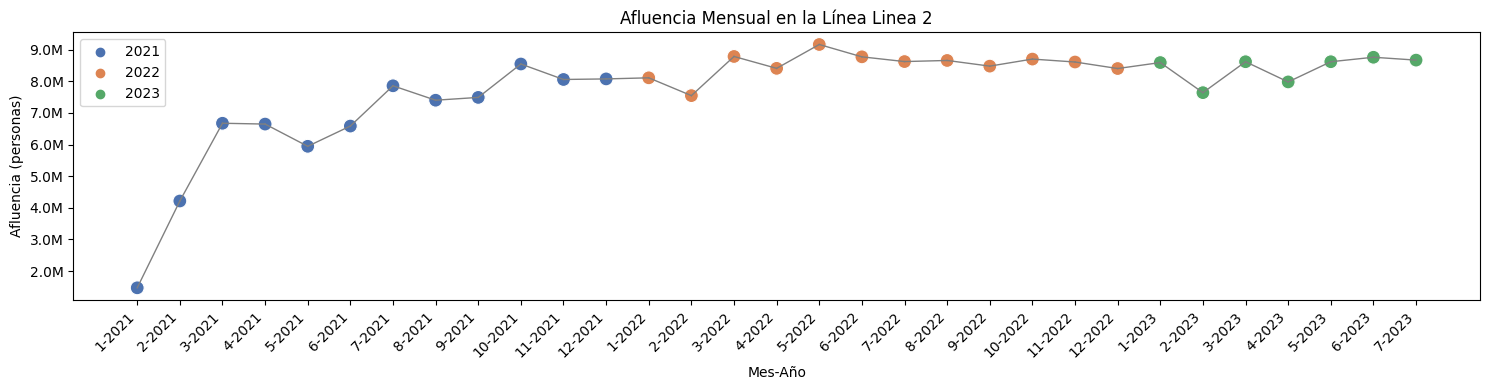

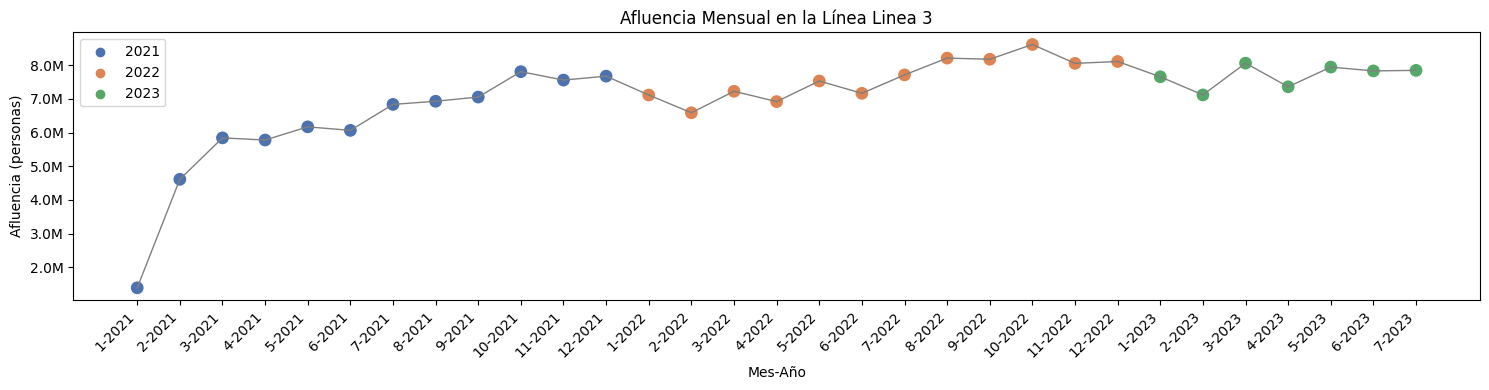

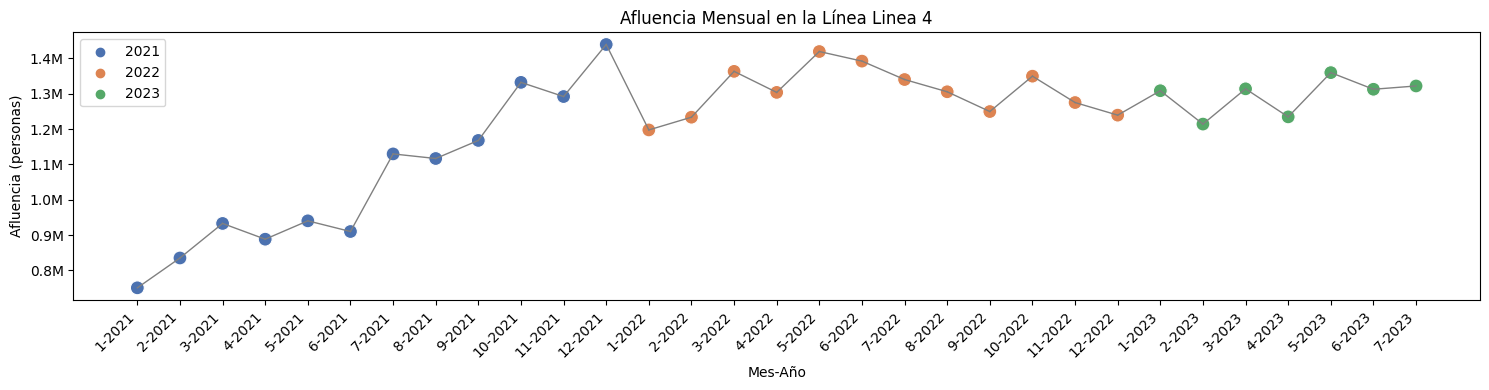

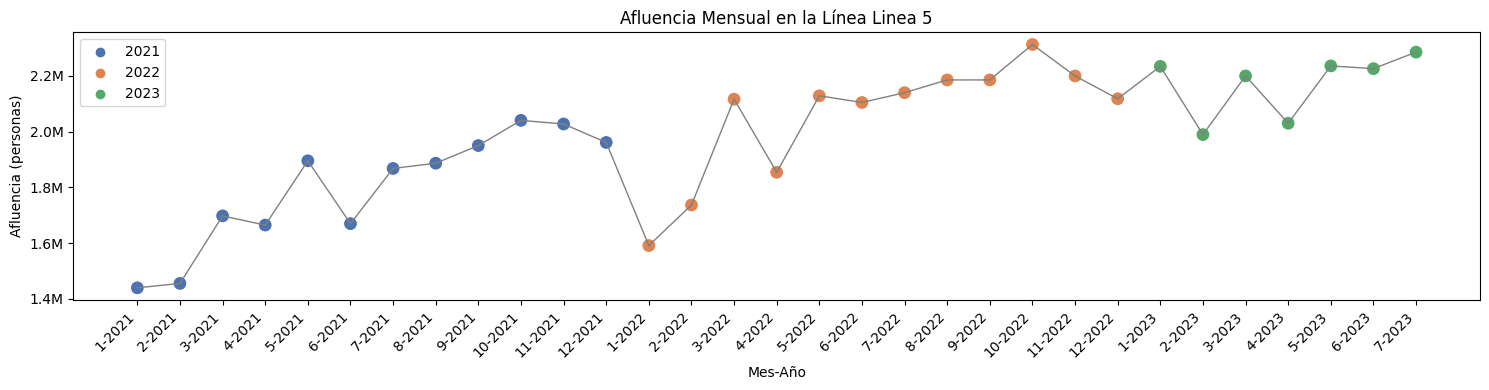

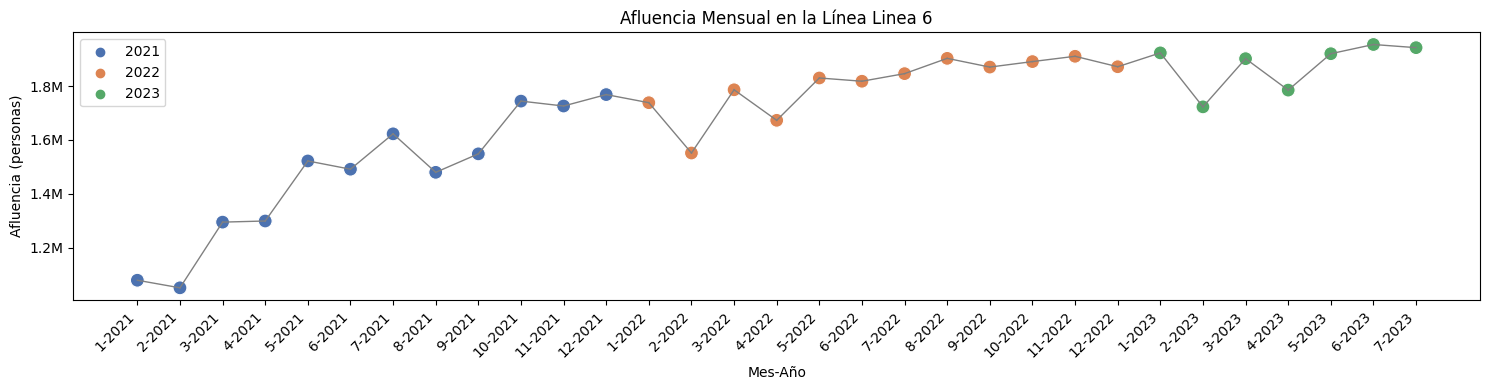

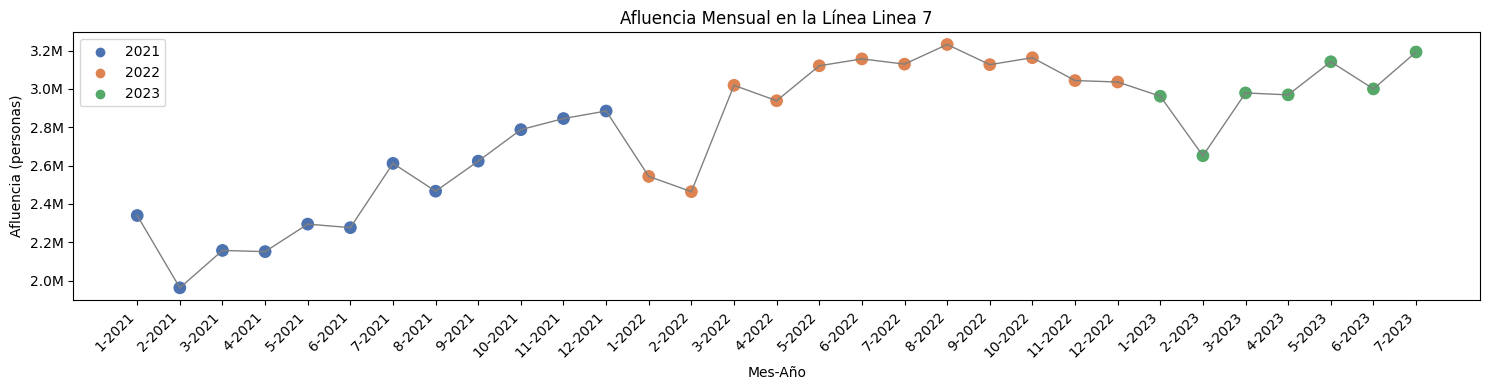

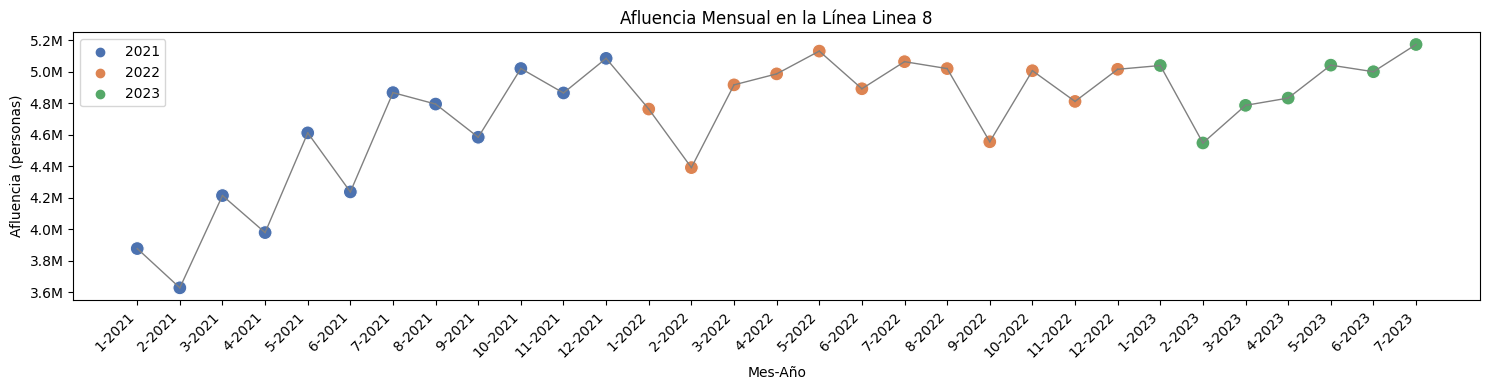

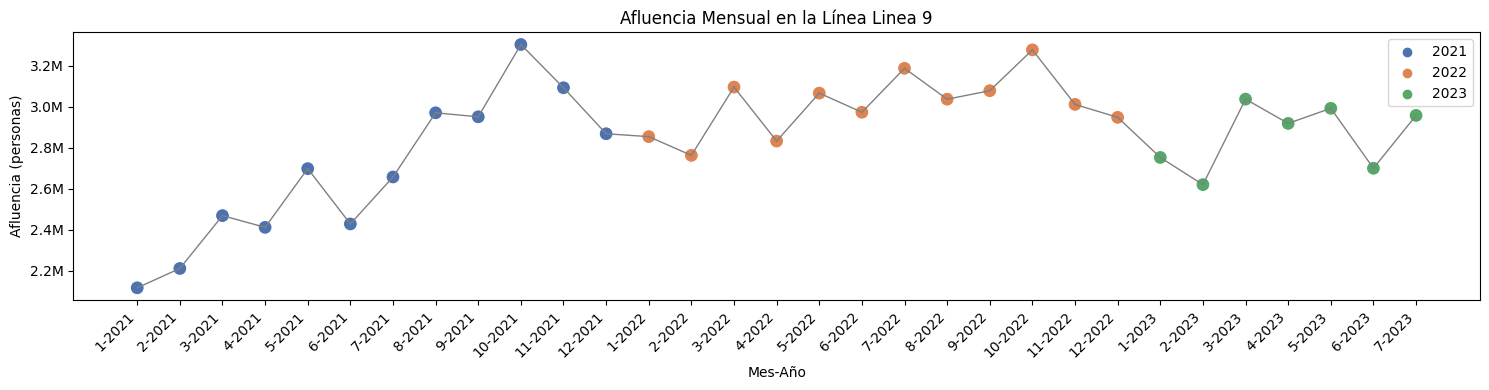

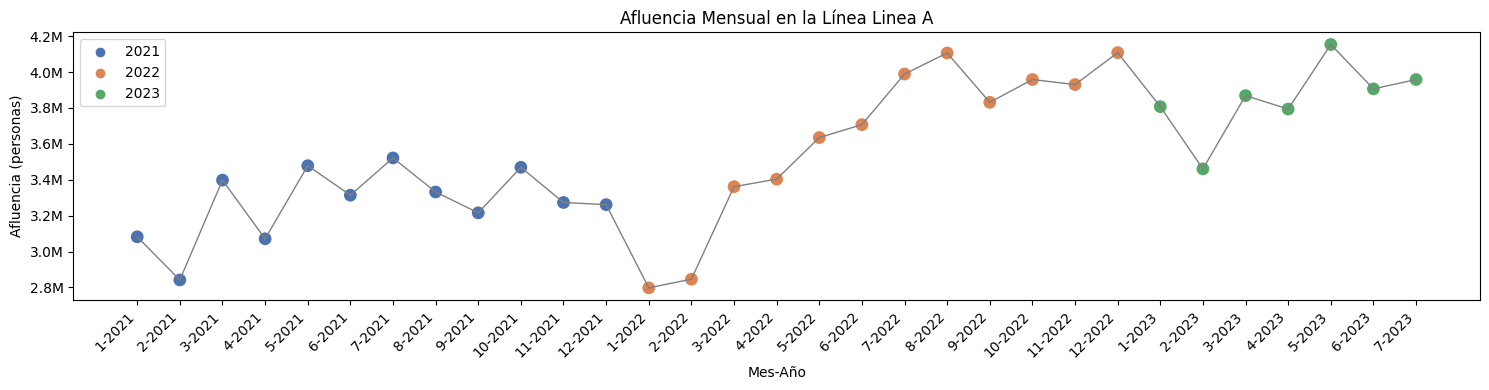

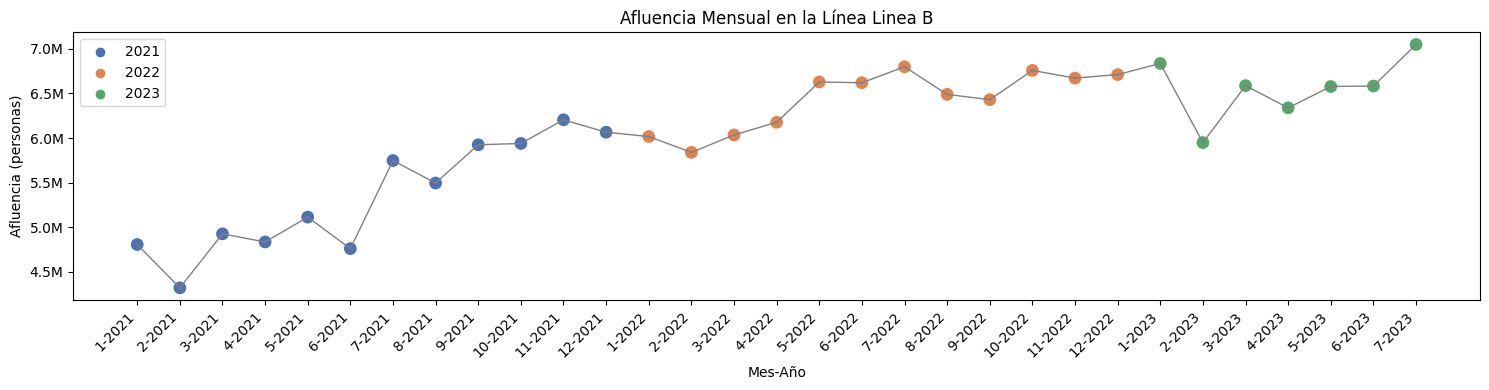

In [35]:
lineas_metro = df_1['linea'].unique()
# Función para formatear el eje y en millones
def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Crear un gráfico de dispersión para cada línea del metro
for linea in lineas_metro:
    data_linea = df_1[df_1['linea'] == linea]
    afluencia_promedio = data_linea.groupby(['año', 'mes'])['afluencia'].sum().reset_index()
    
    plt.figure(figsize=(15, 4))
    sns.set_palette("husl")  # Se cambió la paleta de colores
    
    # Crear un gráfico de dispersión
    ax = sns.scatterplot(x=afluencia_promedio.index, y=afluencia_promedio['afluencia'], hue=afluencia_promedio['año'], palette='deep', s=100)  # Personalizar el tamaño de los puntos
    
    plt.title(f'Afluencia Mensual en la Línea {linea}')
    plt.xlabel('Mes-Año')
    plt.ylabel('Afluencia (personas)')
    
    # Etiquetas en el eje x para cada punto
    etiquetas_x = [f"{mes}-{año}" for mes, año in zip(afluencia_promedio['mes'], afluencia_promedio['año'])]
    
    # Línea que une los puntos (más gruesa)
    for i in range(len(afluencia_promedio)-1):
        ax.plot([i, i+1], [afluencia_promedio['afluencia'].iloc[i], afluencia_promedio['afluencia'].iloc[i+1]], color='gray', linestyle='-', linewidth=1)  # Personalizar el grosor de la línea
    
    ax.set_xticks(range(len(etiquetas_x)))
    ax.set_xticklabels(etiquetas_x, rotation=45, horizontalalignment='right')
   
    
    # Resaltar los colores
    legend = ax.legend(title='Año', title_fontsize='15', loc='upper right')
    handles, labels = ax.get_legend_handles_labels()
    legend.set_visible(False)  # Ocultar la leyenda
    ax.legend(handles=handles, labels=labels)
    ax.yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones
    plt.tight_layout()
    plt.show()

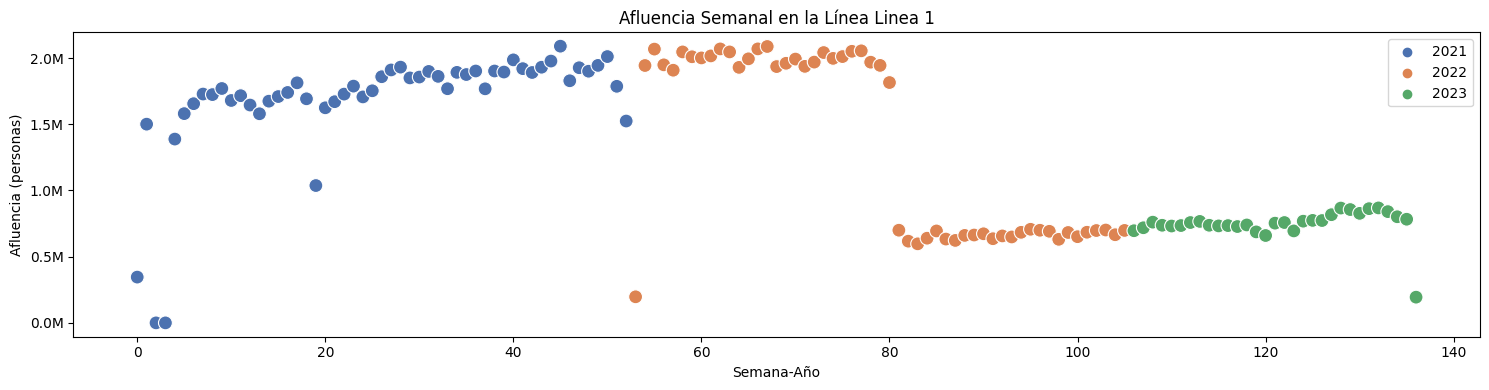

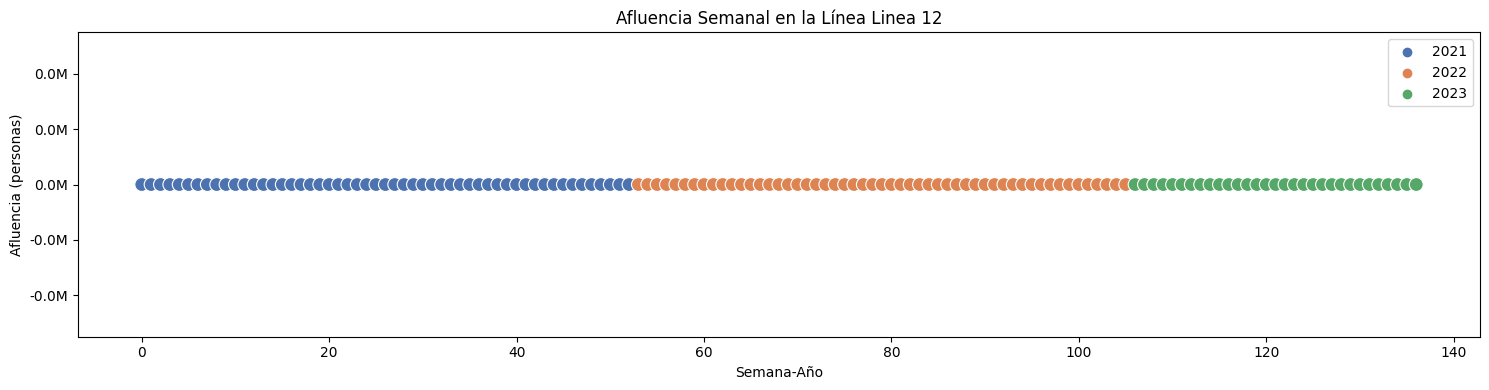

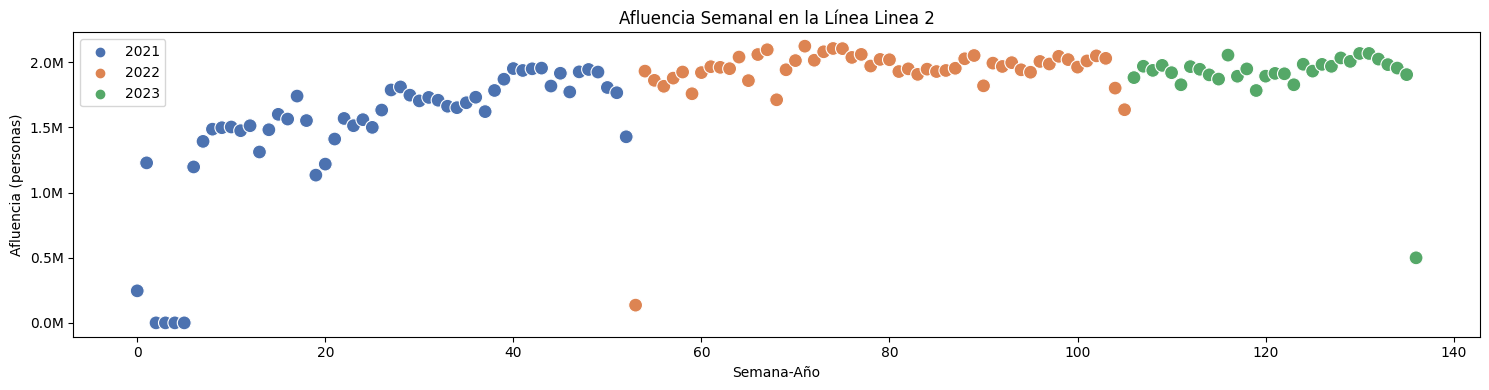

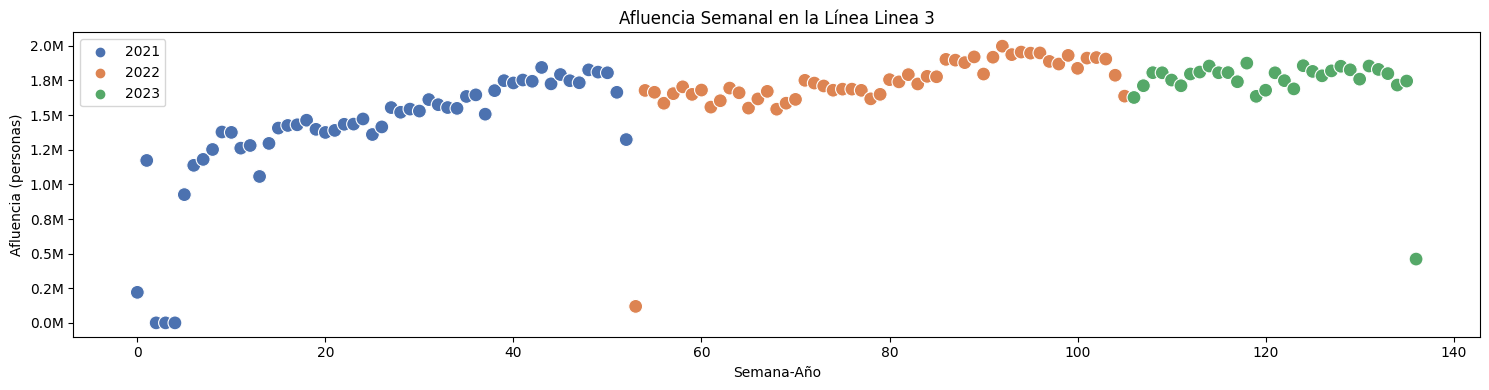

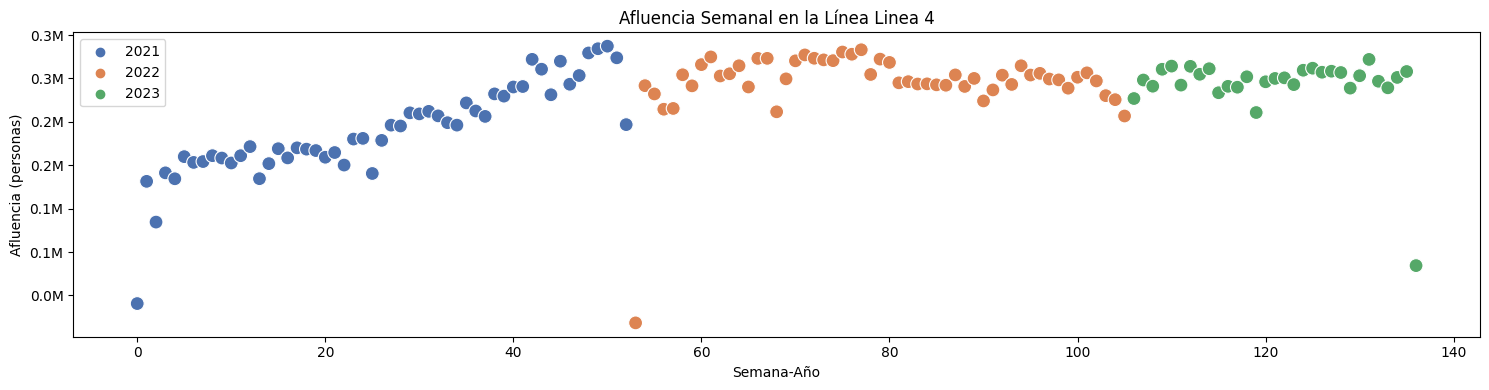

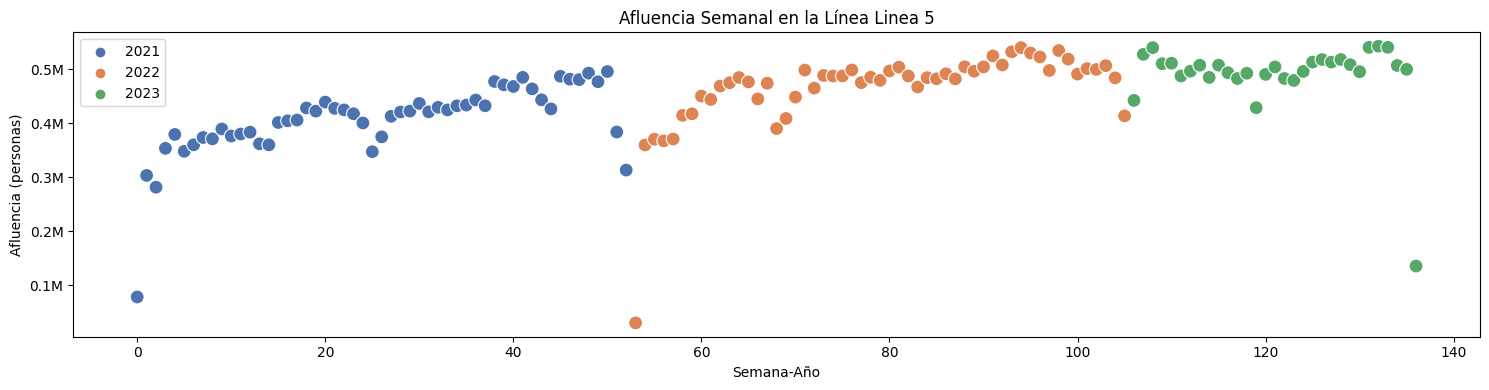

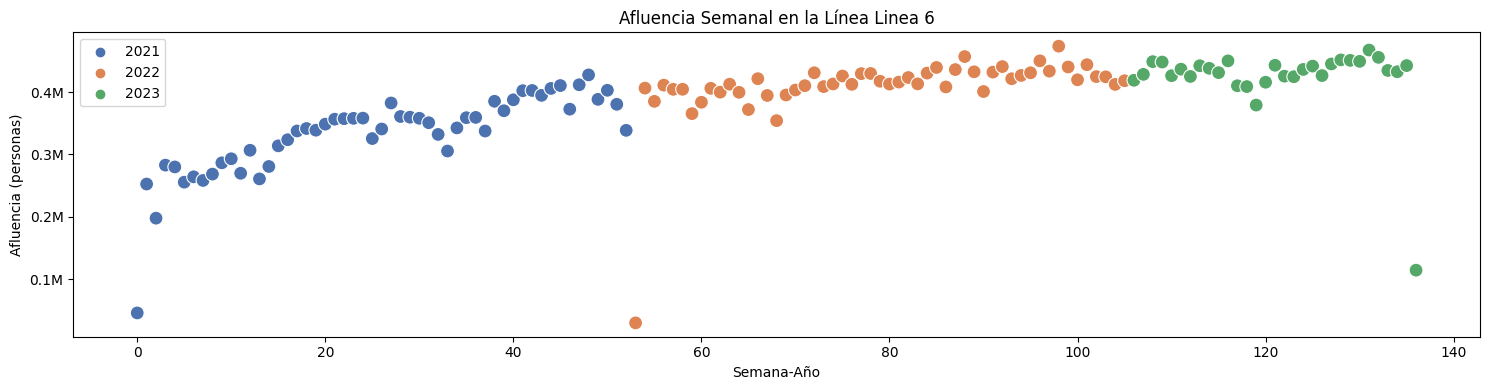

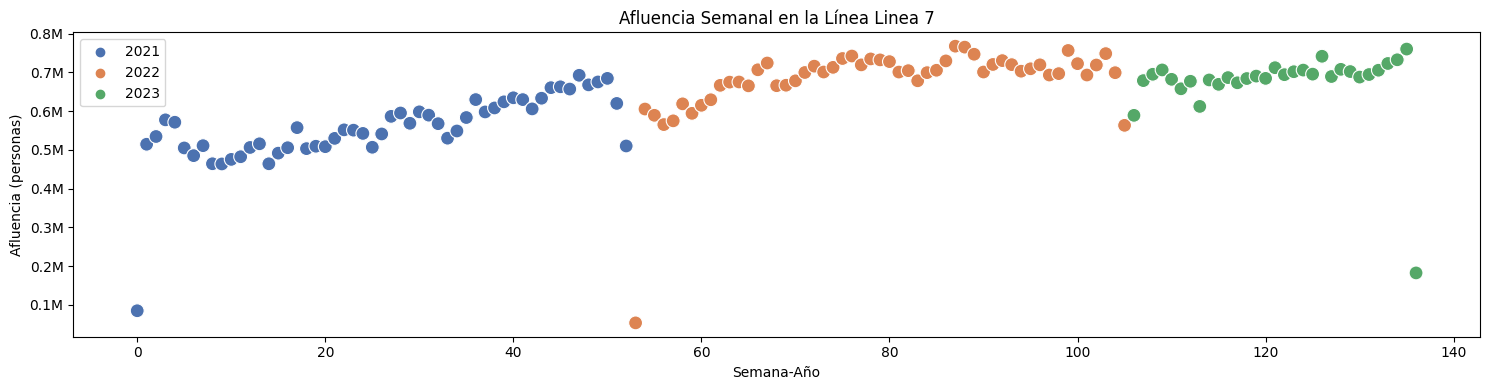

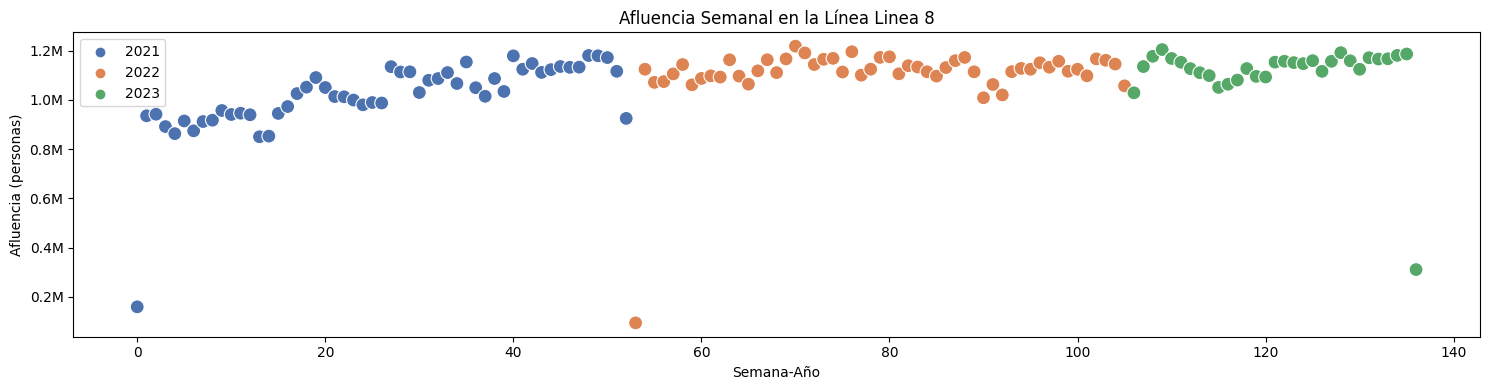

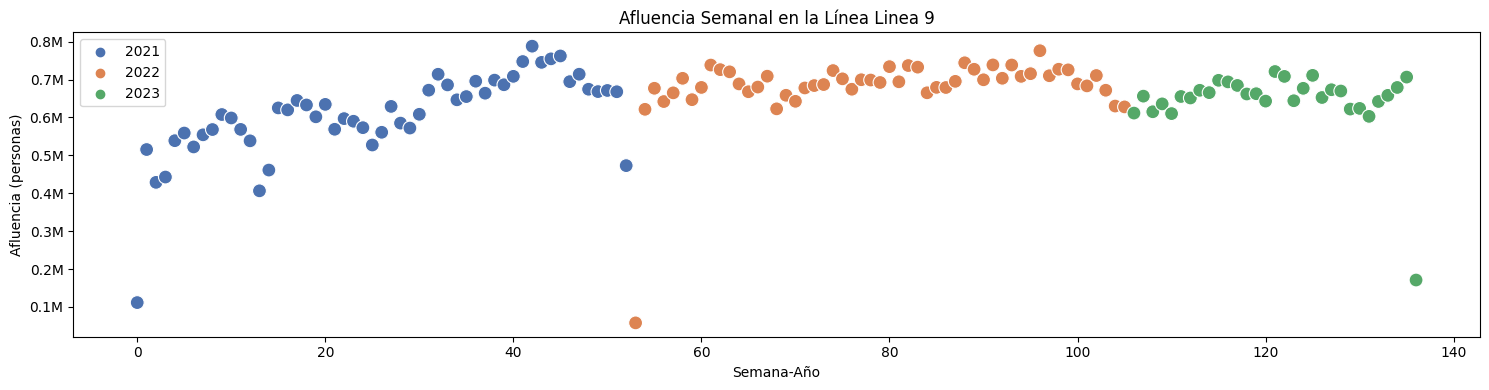

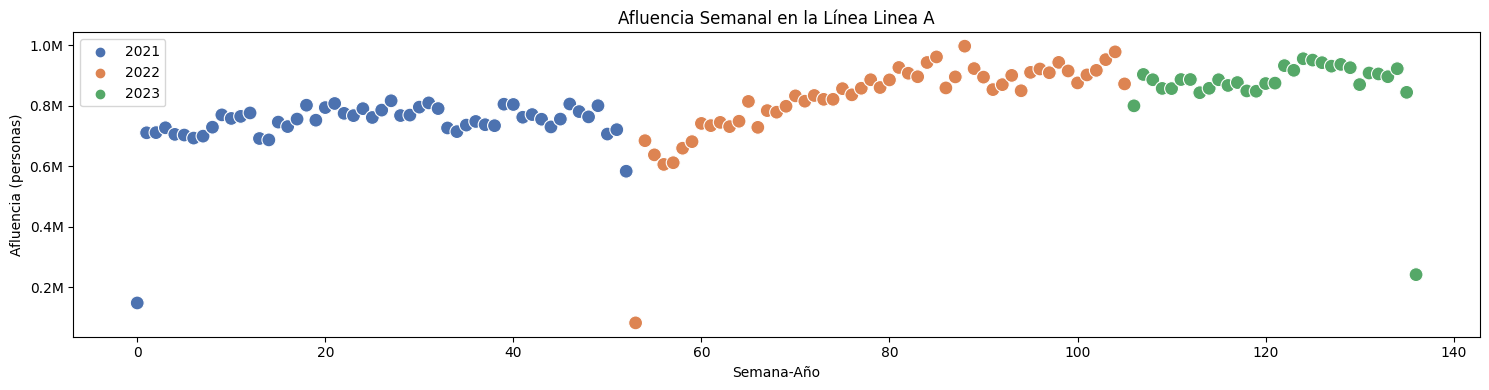

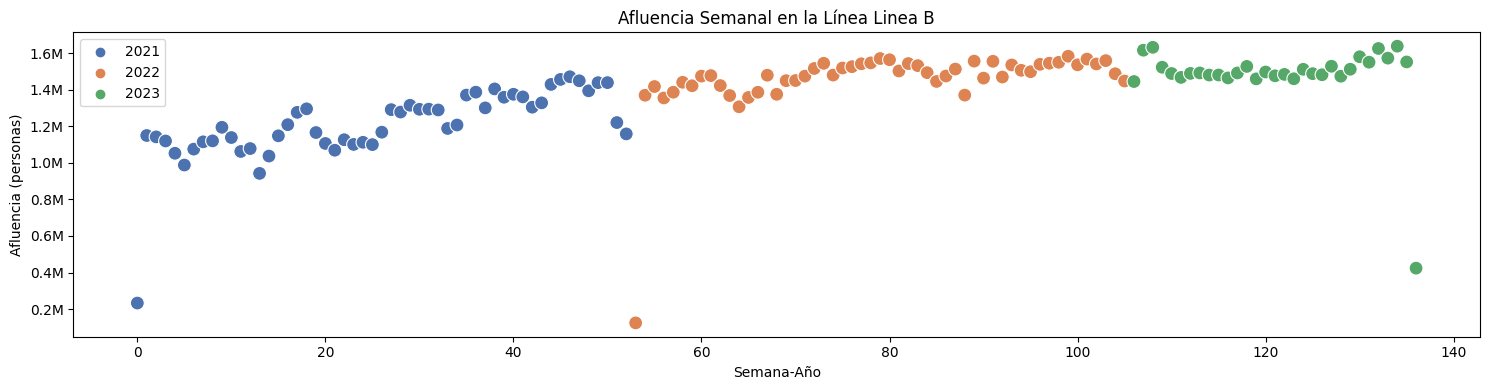

In [36]:
lineas_metro = df_1['linea'].unique()

def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Crear un gráfico de dispersión para cada línea del metro
for linea in lineas_metro:
    data_linea = df_1[df_1['linea'] == linea]
    afluencia_promedio = data_linea.groupby(['año', 'semana'])['afluencia'].sum().reset_index()
    
    plt.figure(figsize=(15, 4))
    sns.set_palette("husl")  # Se cambió la paleta de colores
    
    # Crear un gráfico de dispersión
    ax = sns.scatterplot(x=afluencia_promedio.index, y=afluencia_promedio['afluencia'], hue=afluencia_promedio['año'], palette='deep', s=100)  # Personalizar el tamaño de los puntos
    
    plt.title(f'Afluencia Semanal en la Línea {linea}')
    plt.xlabel('Semana-Año')
    plt.ylabel('Afluencia (personas)')
    
    legend = ax.legend(title='Año', title_fontsize='15', loc='upper right')
    handles, labels = ax.get_legend_handles_labels()
    legend.set_visible(False)  # Ocultar la leyenda
    ax.legend(handles=handles, labels=labels)
    ax.yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones
    plt.tight_layout()
    plt.show()

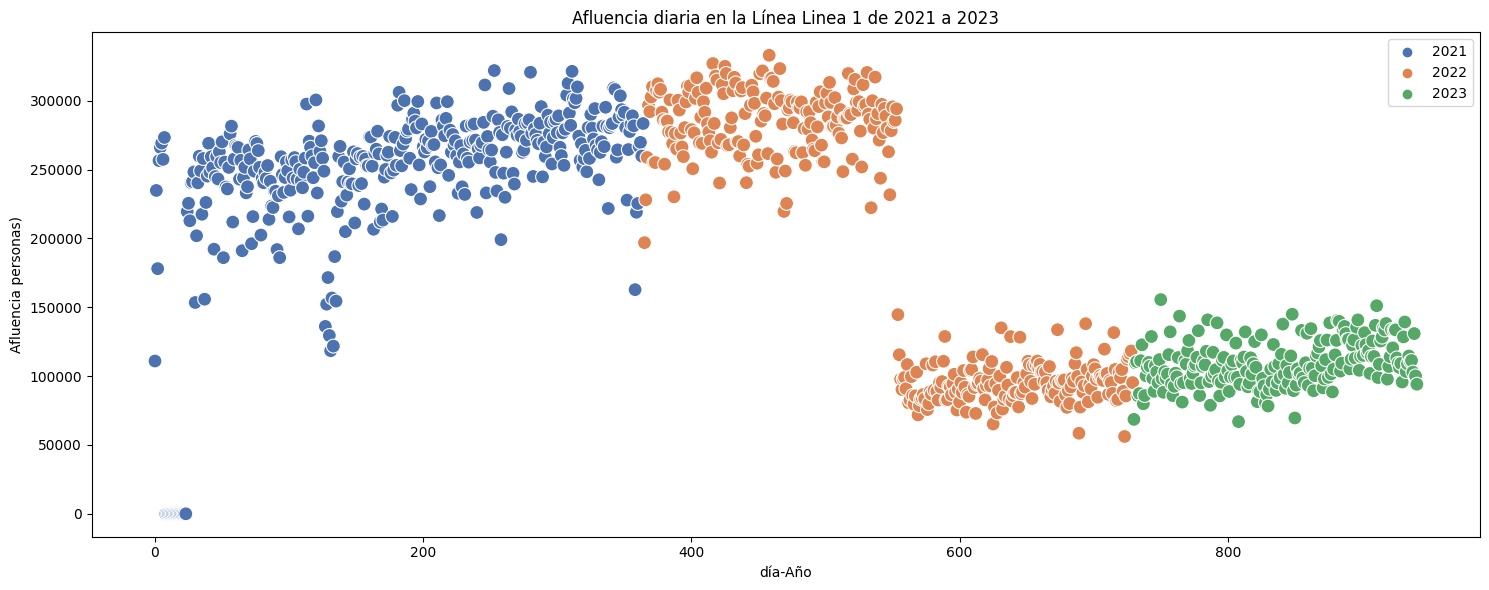

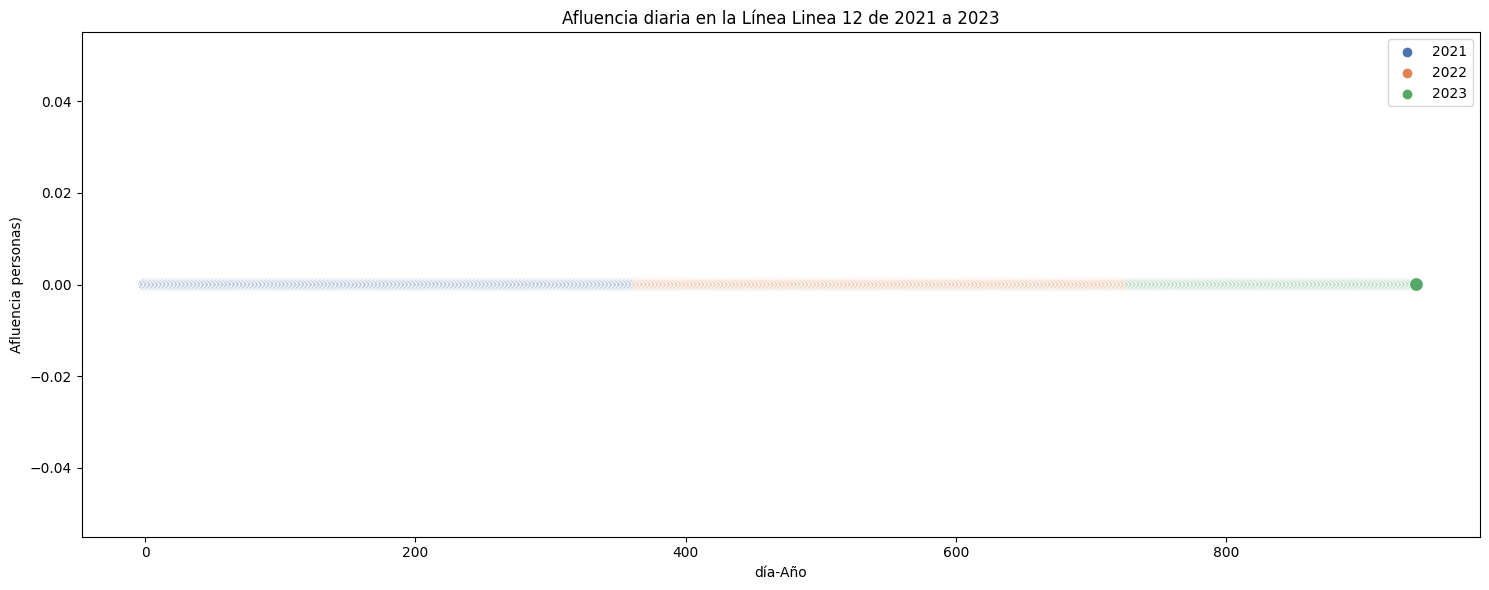

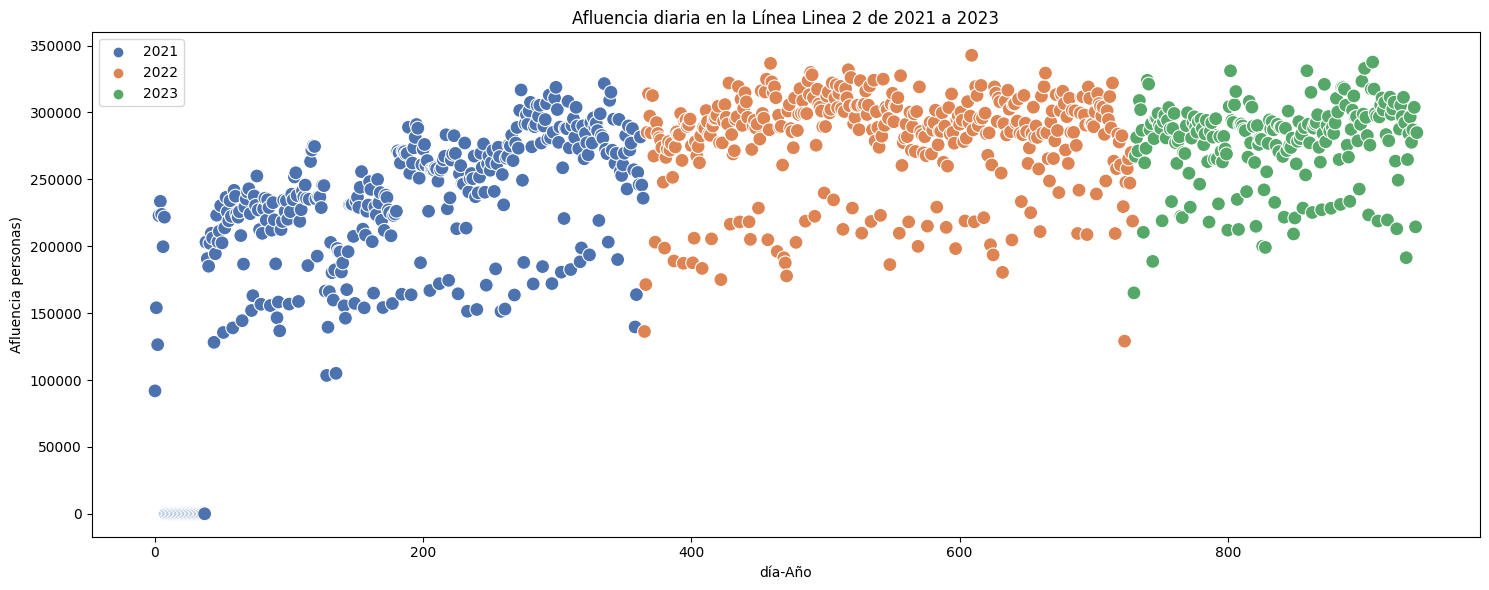

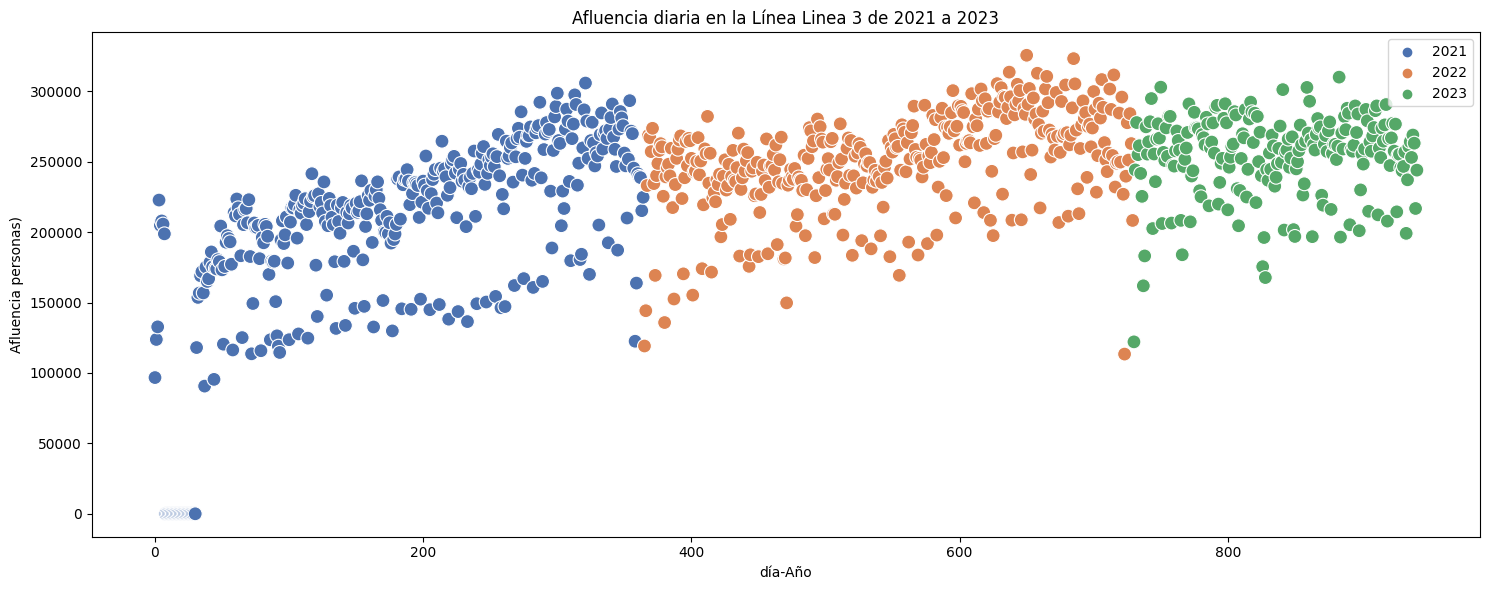

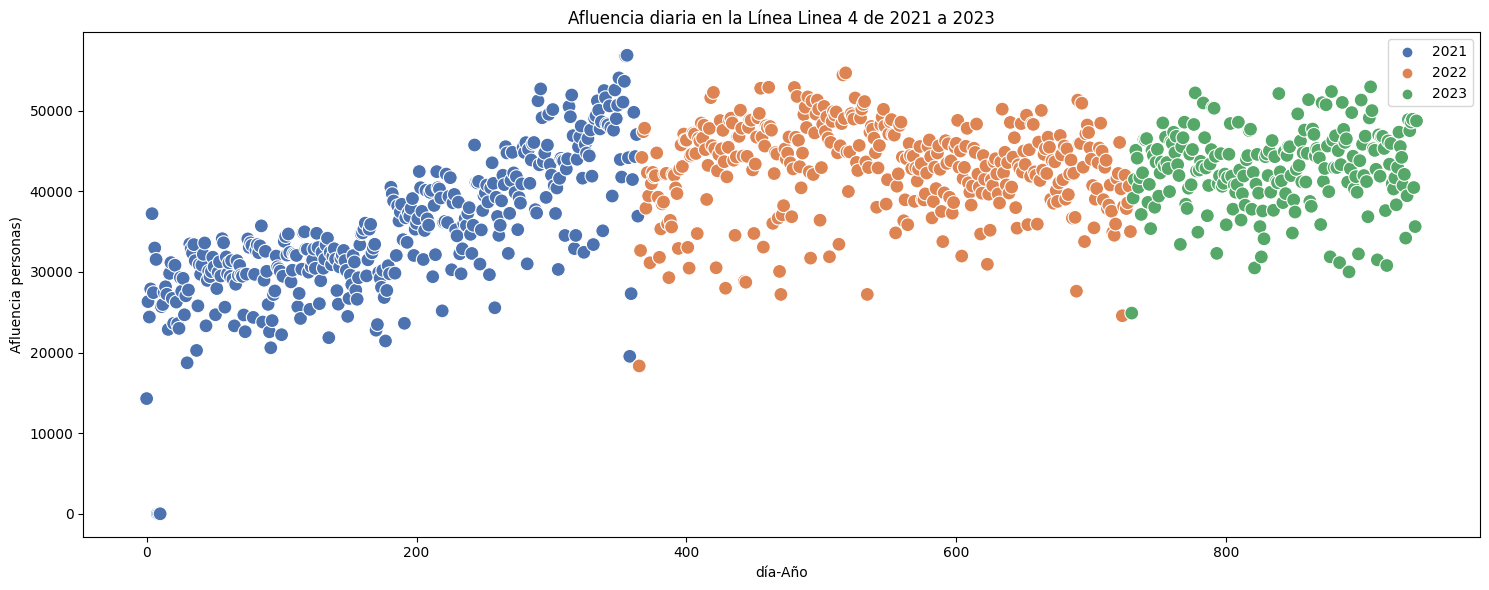

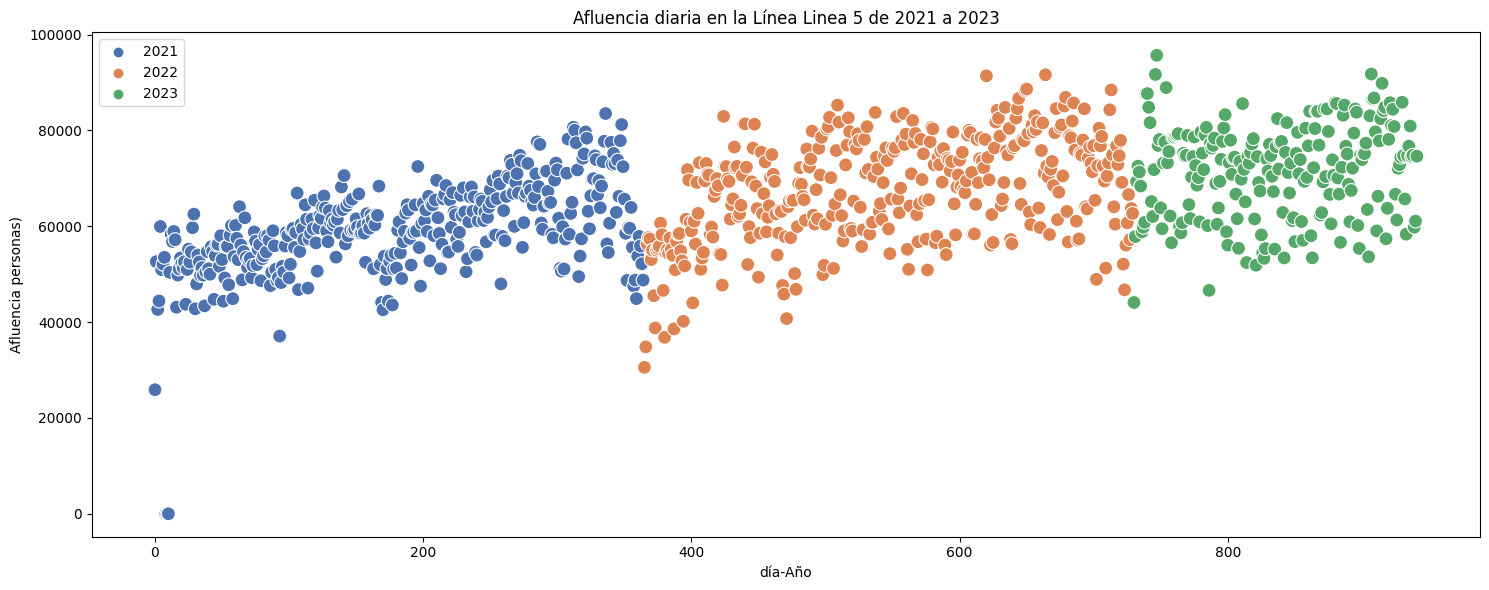

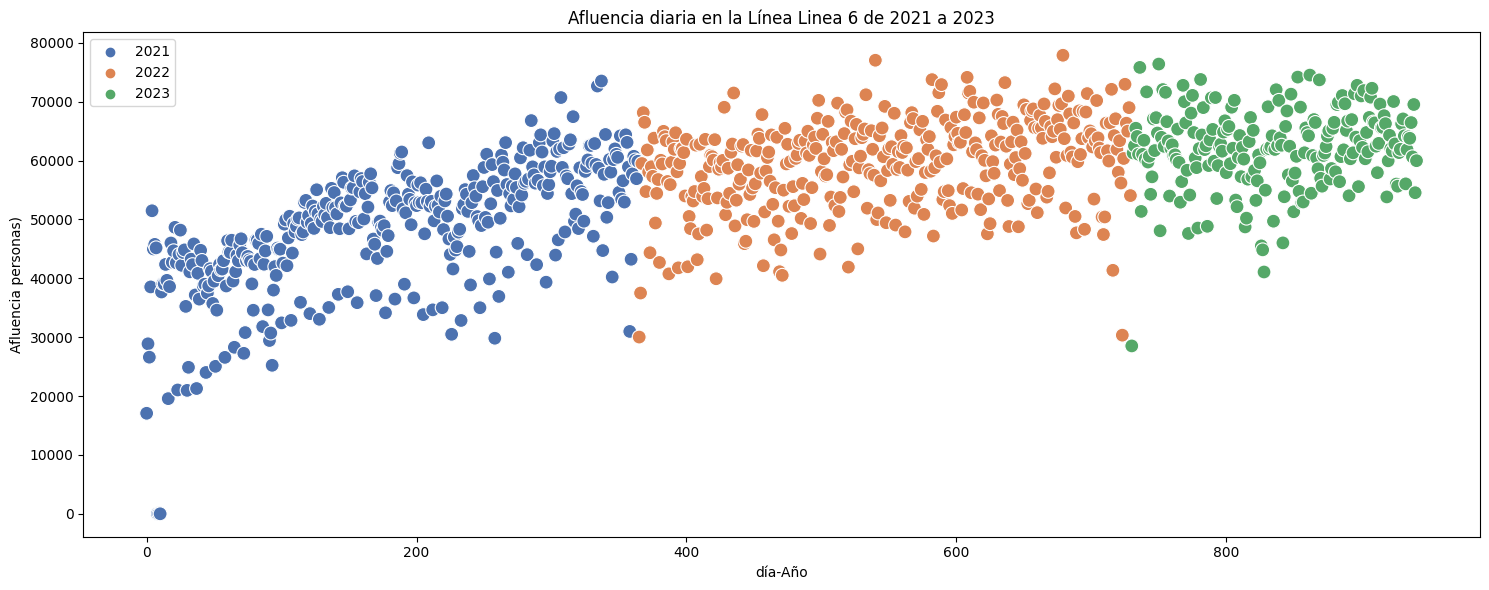

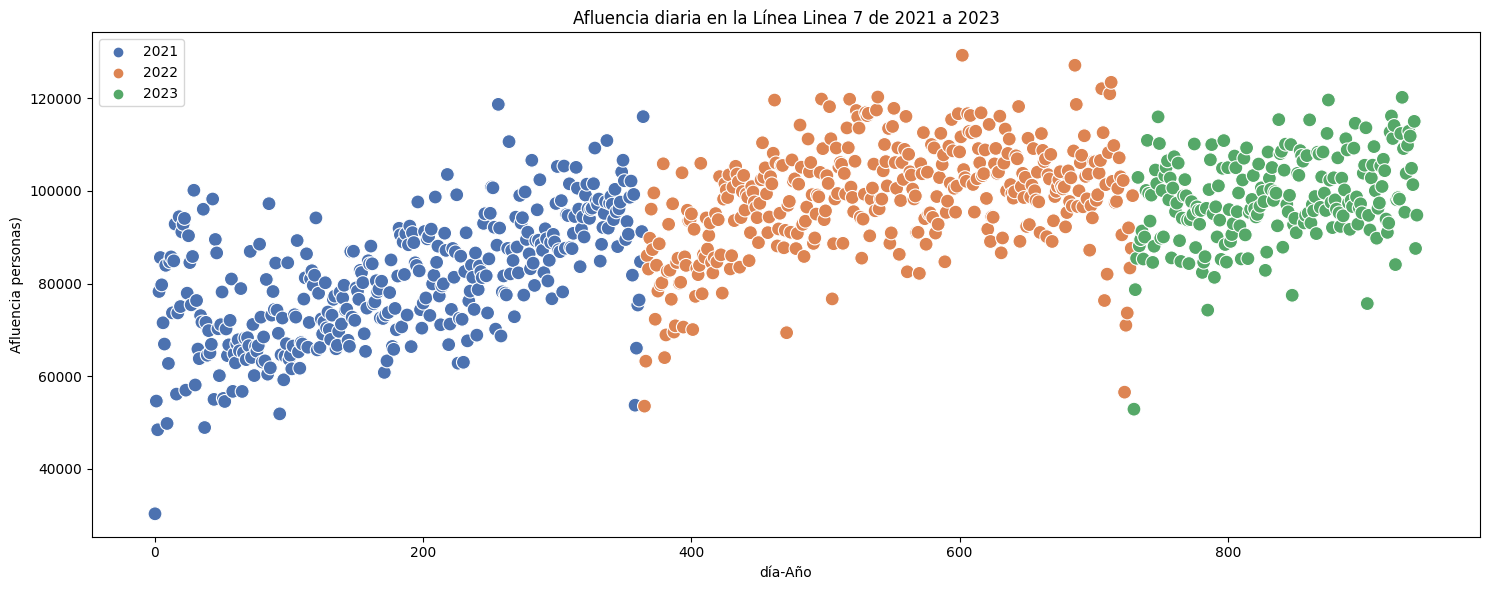

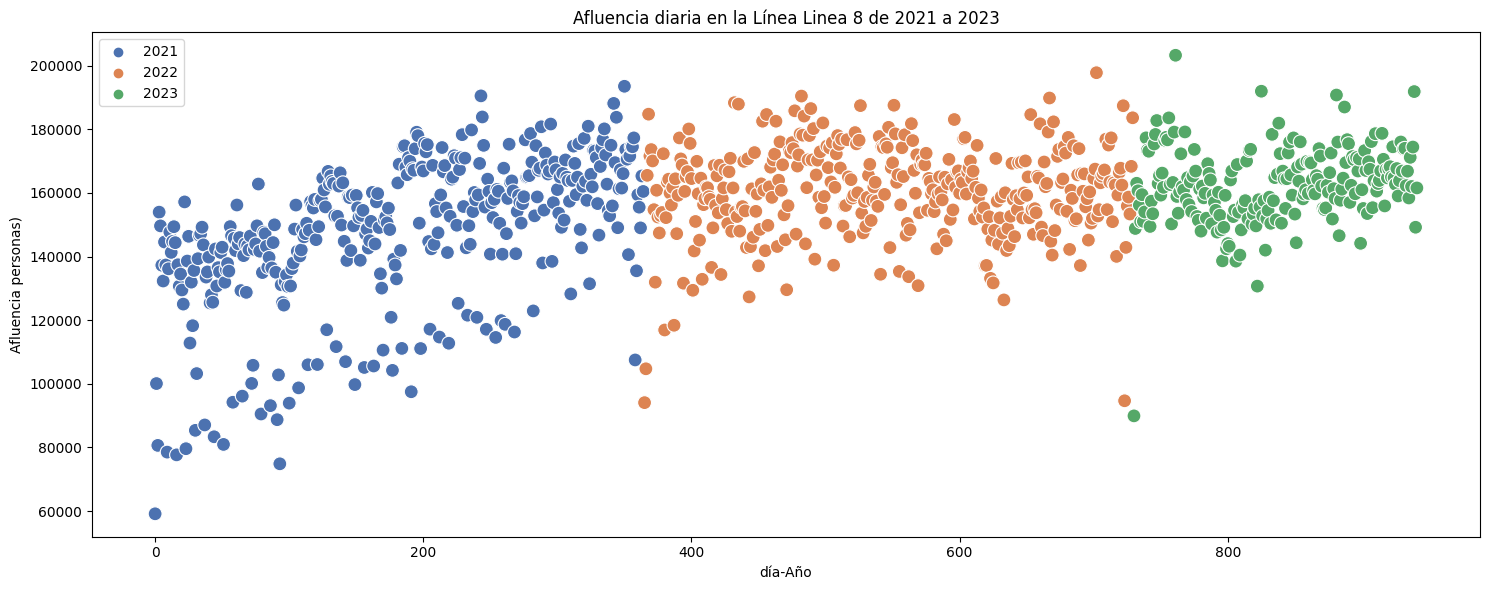

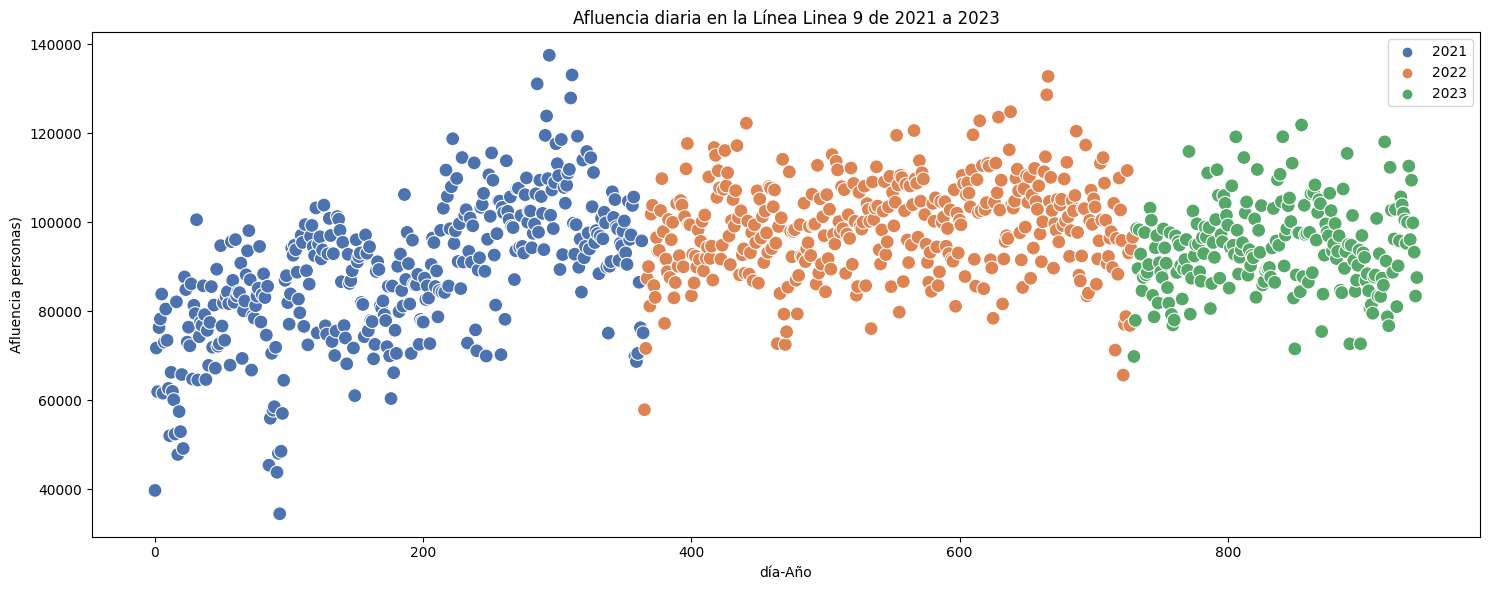

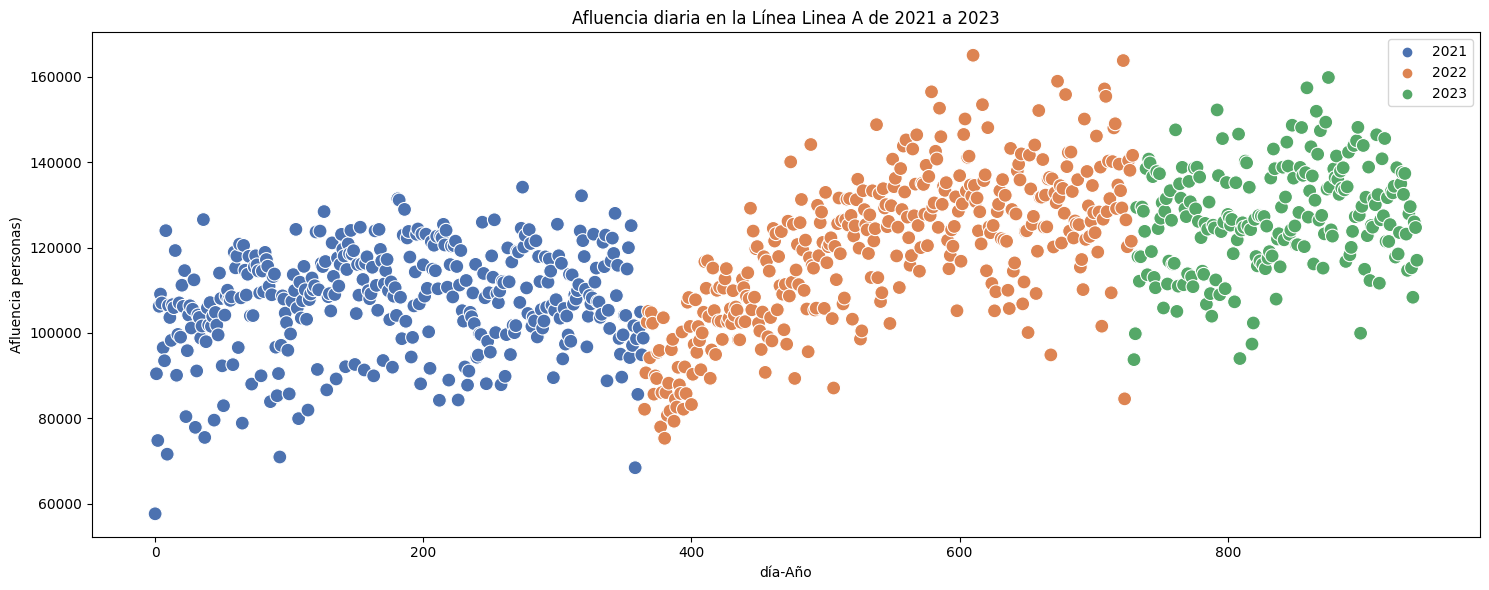

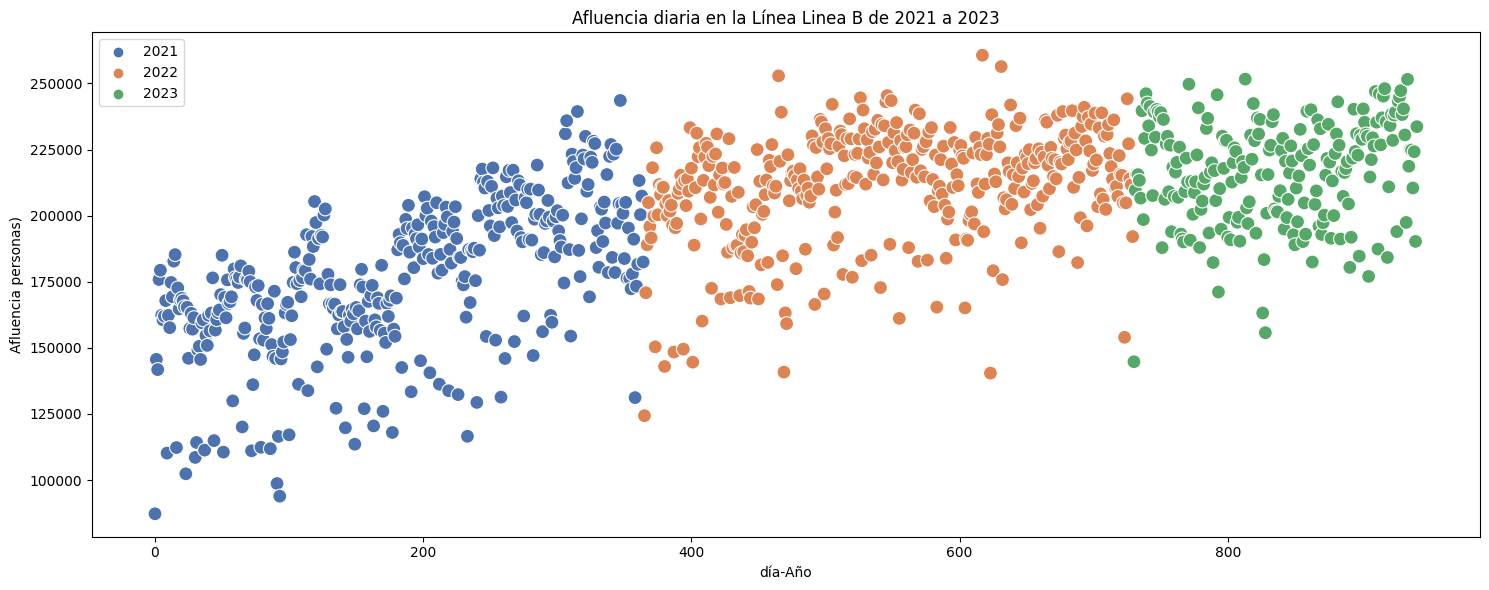

In [110]:
lineas_metro = df_1['linea'].unique()



# Crear un gráfico de dispersión para cada línea del metro
for linea in lineas_metro:
    data_linea = df_1[df_1['linea'] == linea]
    afluencia_promedio = data_linea.groupby(['año', 'dia_del_año'])['afluencia'].sum().reset_index()
    
    plt.figure(figsize=(15, 6))
    sns.set_palette("husl")  # Se cambió la paleta de colores
    
    # Crear un gráfico de dispersión
    ax = sns.scatterplot(x=afluencia_promedio.index, y=afluencia_promedio['afluencia'], hue=afluencia_promedio['año'], palette='deep', s=100)  # Personalizar el tamaño de los puntos
    
    plt.title(f'Afluencia diaria en la Línea {linea} de 2021 a 2023')
    plt.xlabel('día-Año')
    plt.ylabel('Afluencia personas)')
    
    legend = ax.legend(title='Año', title_fontsize='15', loc='upper right')
    handles, labels = ax.get_legend_handles_labels()
    legend.set_visible(False)  # Ocultar la leyenda
    ax.legend(handles=handles, labels=labels)
    
    plt.tight_layout()
    plt.show()

In [170]:
lineas_metro = df_1['linea'].unique()

for linea in lineas_metro:
    data_linea = df_1[df_1['linea'] == linea]
    afluencia_dia_año = data_linea.groupby(['año', 'semana'])['afluencia'].sum().reset_index()
    afluencia_dia_año["semana"]=afluencia_dia_año.index
    valor=afluencia_dia_año['afluencia'].corr(afluencia_dia_año['semana'])
    print(f"La correlación de la {linea} es: {valor}")

La correlación de la Linea 1 es: -0.5905700050796177
La correlación de la Linea 12 es: nan
La correlación de la Linea 2 es: 0.5373140735630719
La correlación de la Linea 3 es: 0.5606544912491906
La correlación de la Linea 4 es: 0.5452201059246716
La correlación de la Linea 5 es: 0.564404510120555
La correlación de la Linea 6 es: 0.6479085716444268
La correlación de la Linea 7 es: 0.5850127242047294
La correlación de la Linea 8 es: 0.37006293152197056
La correlación de la Linea 9 es: 0.32325272069474414
La correlación de la Linea A es: 0.5120418816225318
La correlación de la Linea B es: 0.6013042264235703


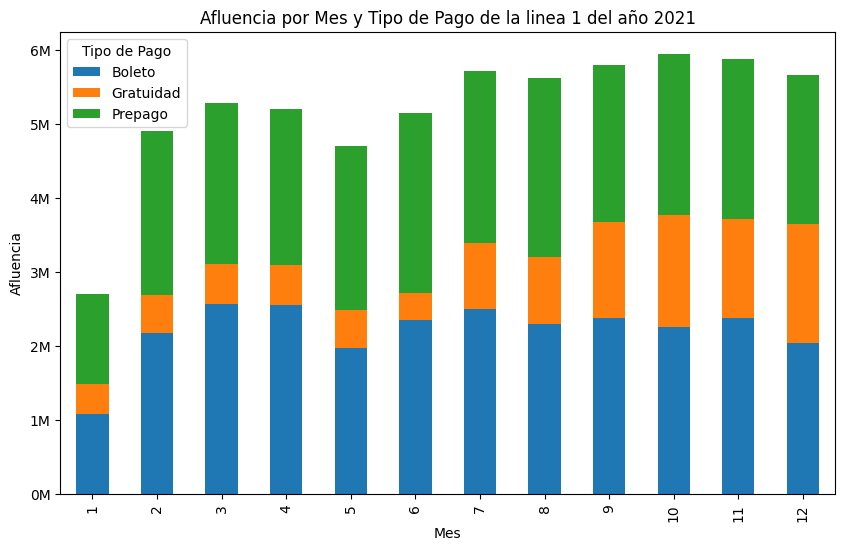

In [ ]:
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

df_linea1_2021 = df_1[(df_1['año'] == 2021) & (df_1['linea'] == 'Linea 1')]
df_2=df_linea1_2021.groupby(['mes', 'tipo_pago'])['afluencia'].sum().unstack(fill_value=0)
ax = df_2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Afluencia por Mes y Tipo de Pago de la linea 1 del año 2021')
plt.xlabel('Mes')
plt.ylabel('Afluencia')
plt.legend(title='Tipo de Pago')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

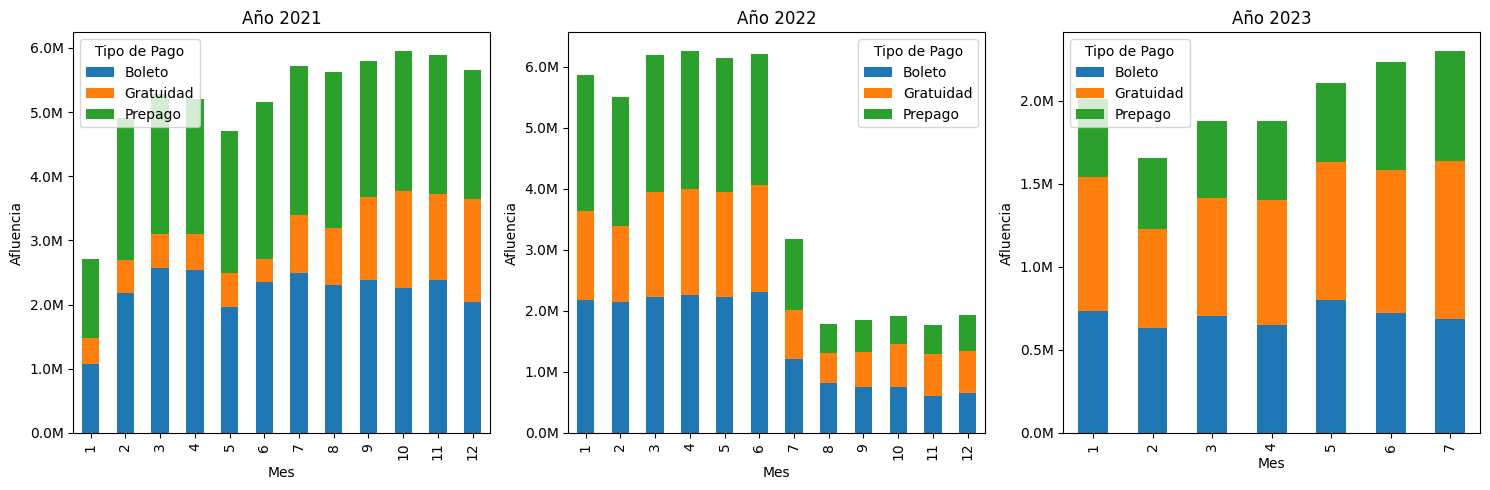

In [ ]:
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

linea = 'Linea 1'
df_linea1 = df_1[df_1['linea'] == linea]
años = df_linea1['año'].unique()

fig, axs = plt.subplots(1, len(años), figsize=(15, 5))

for i, año in enumerate(años):
    df_año = df_linea1[df_linea1['año'] == año]
    df_grouped = df_año.groupby(['mes', 'tipo_pago'])['afluencia'].sum().unstack(fill_value=0)

    ax = df_grouped.plot(kind='bar', stacked=True, ax=axs[i])
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Afluencia')
    ax.legend(title='Tipo de Pago')
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

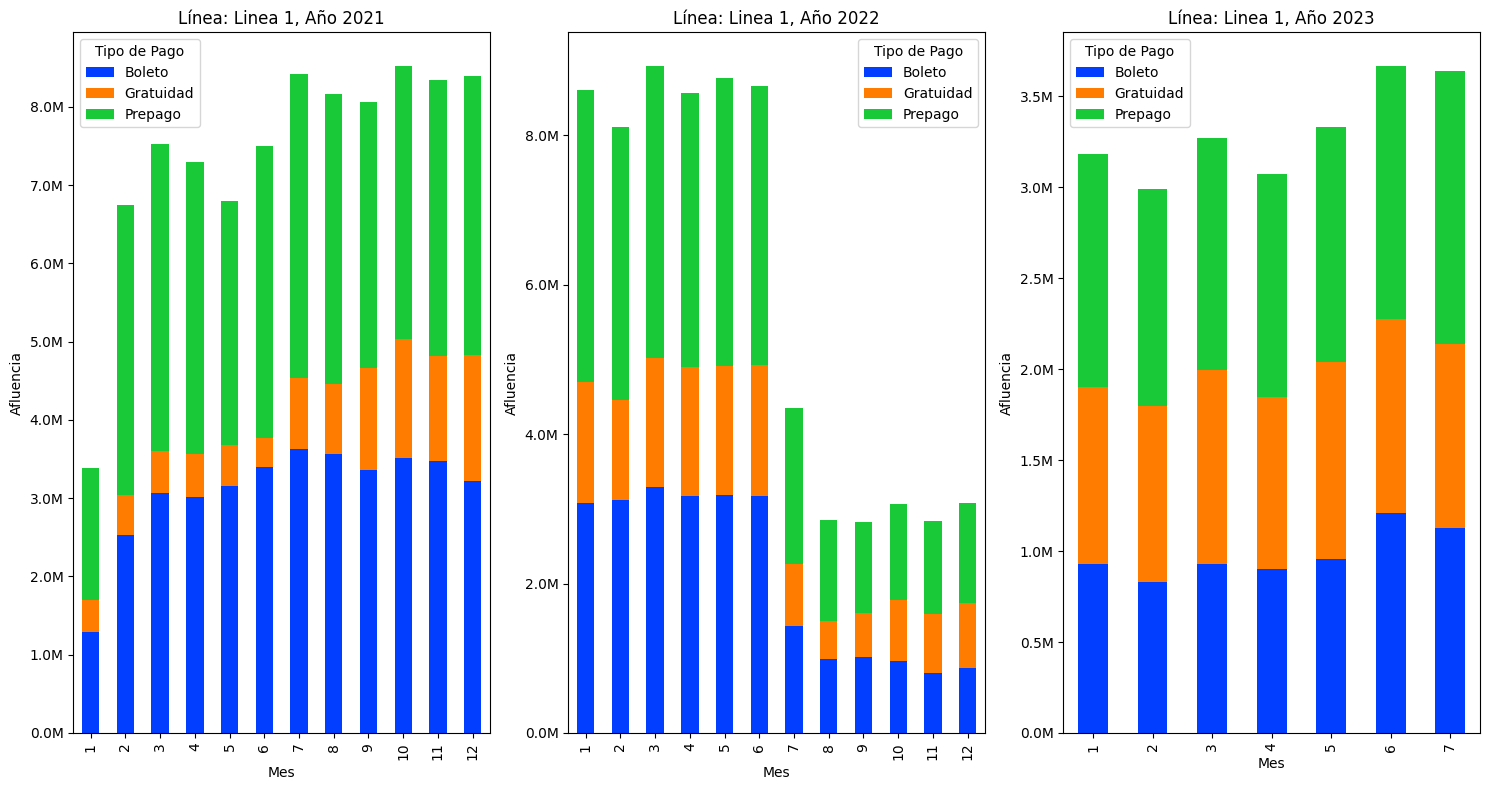

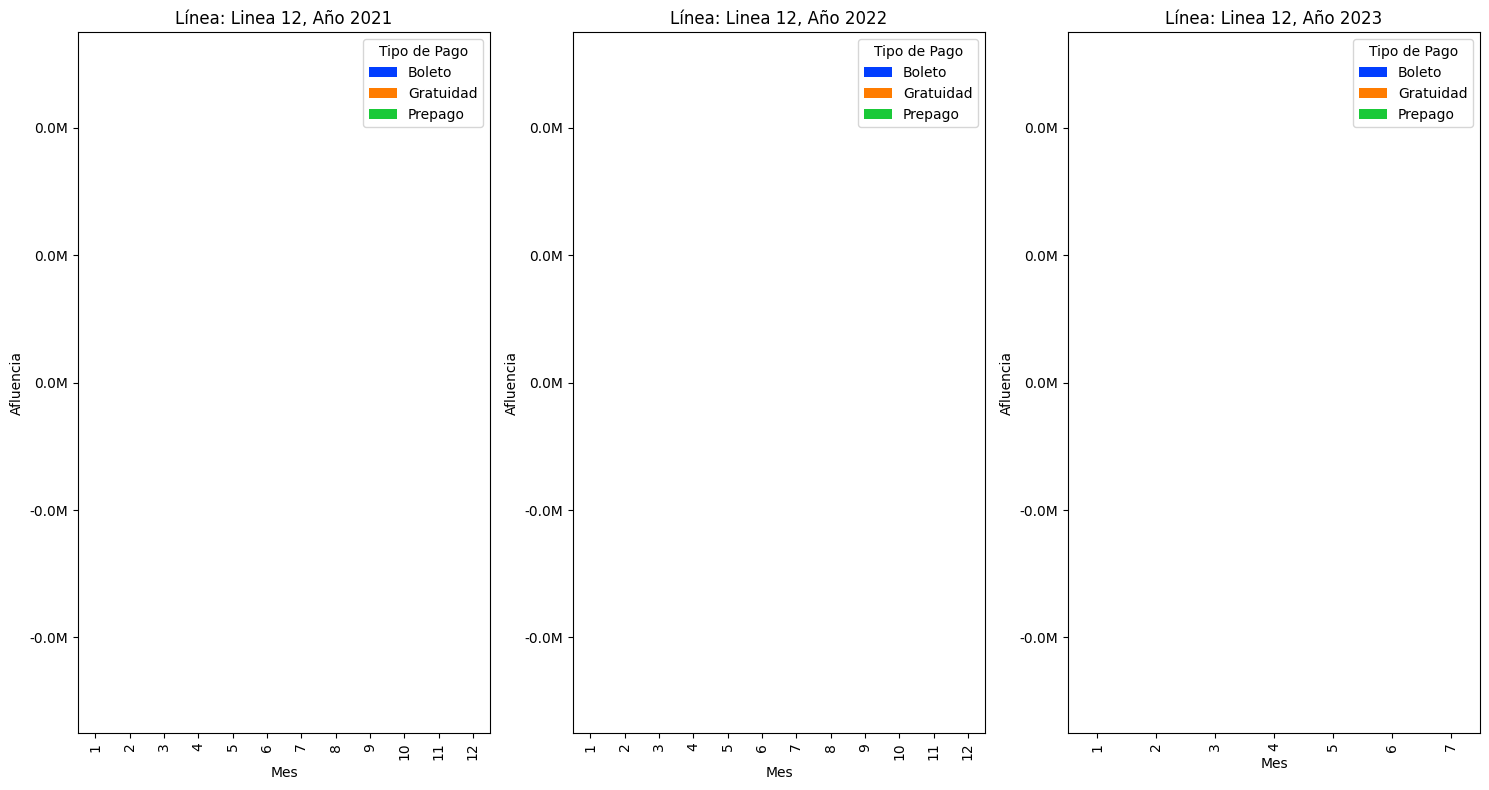

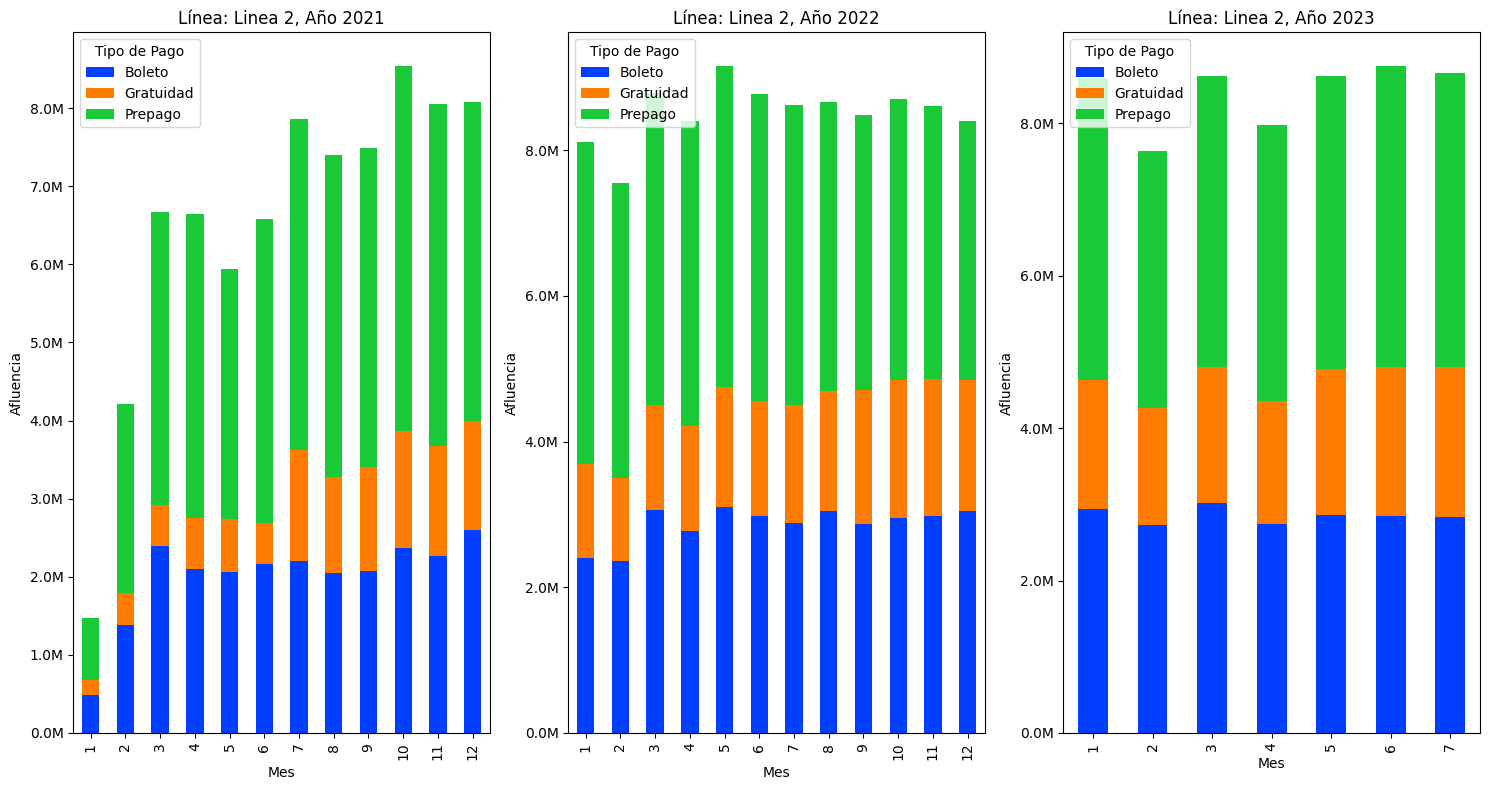

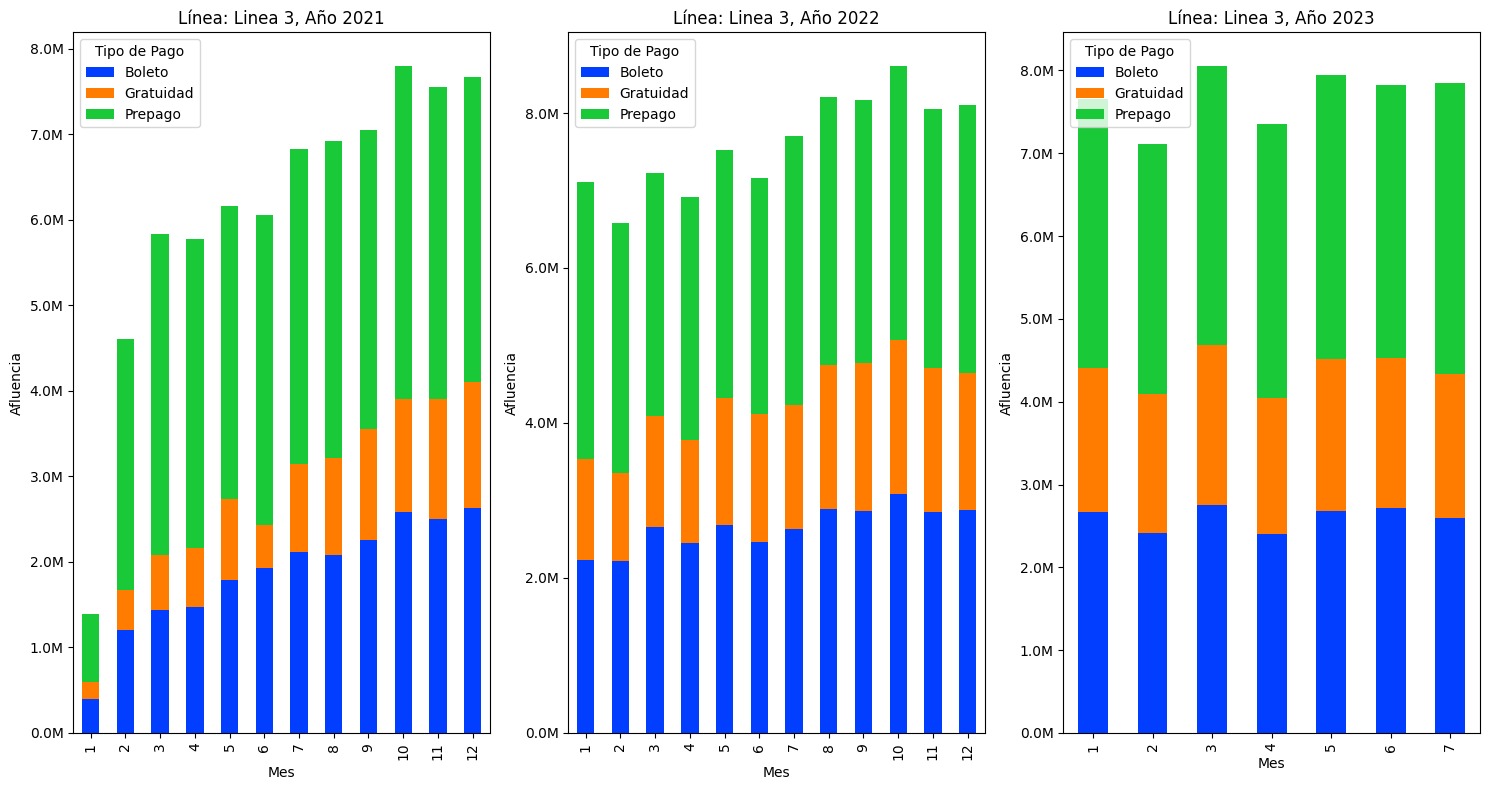

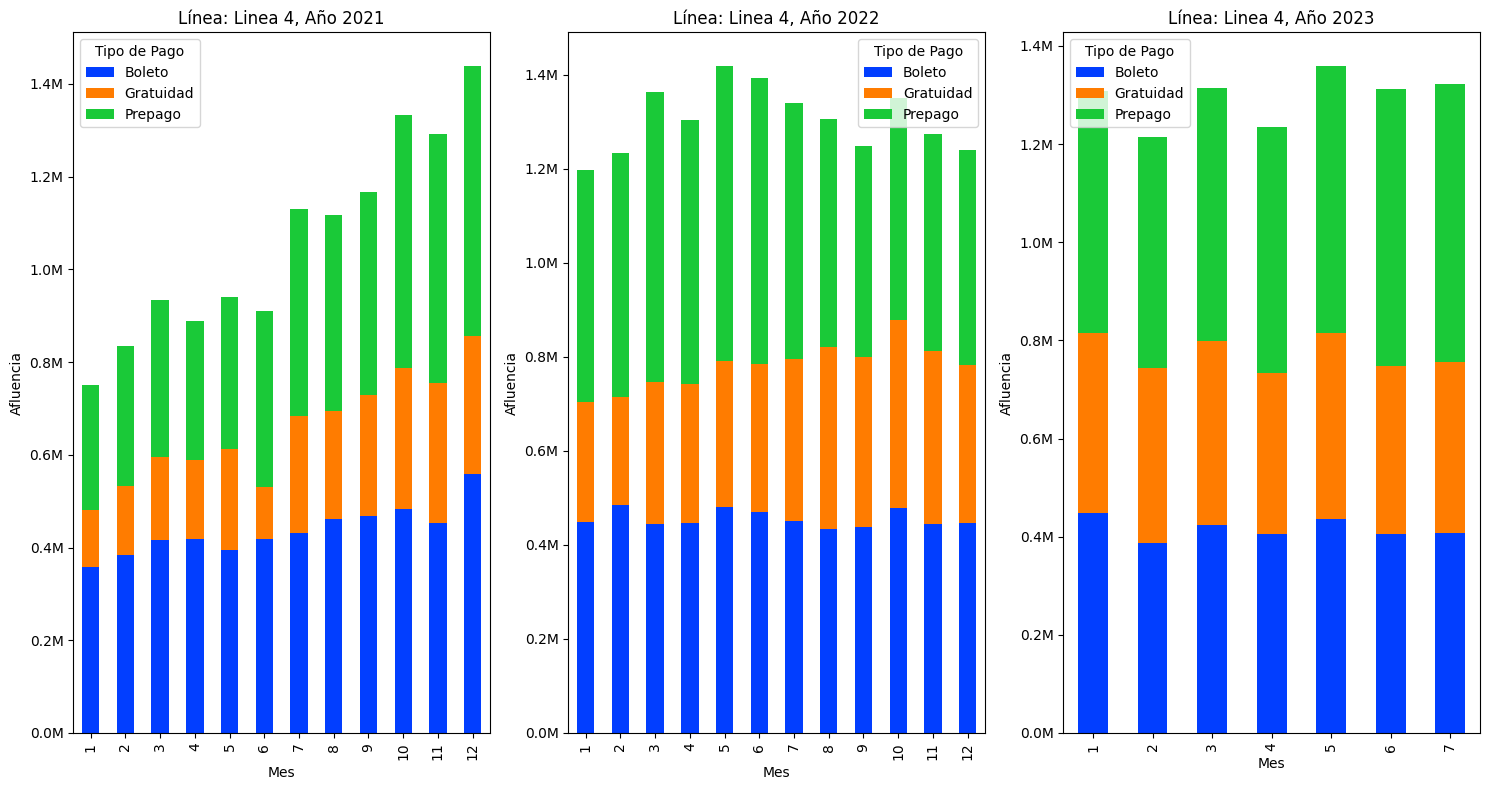

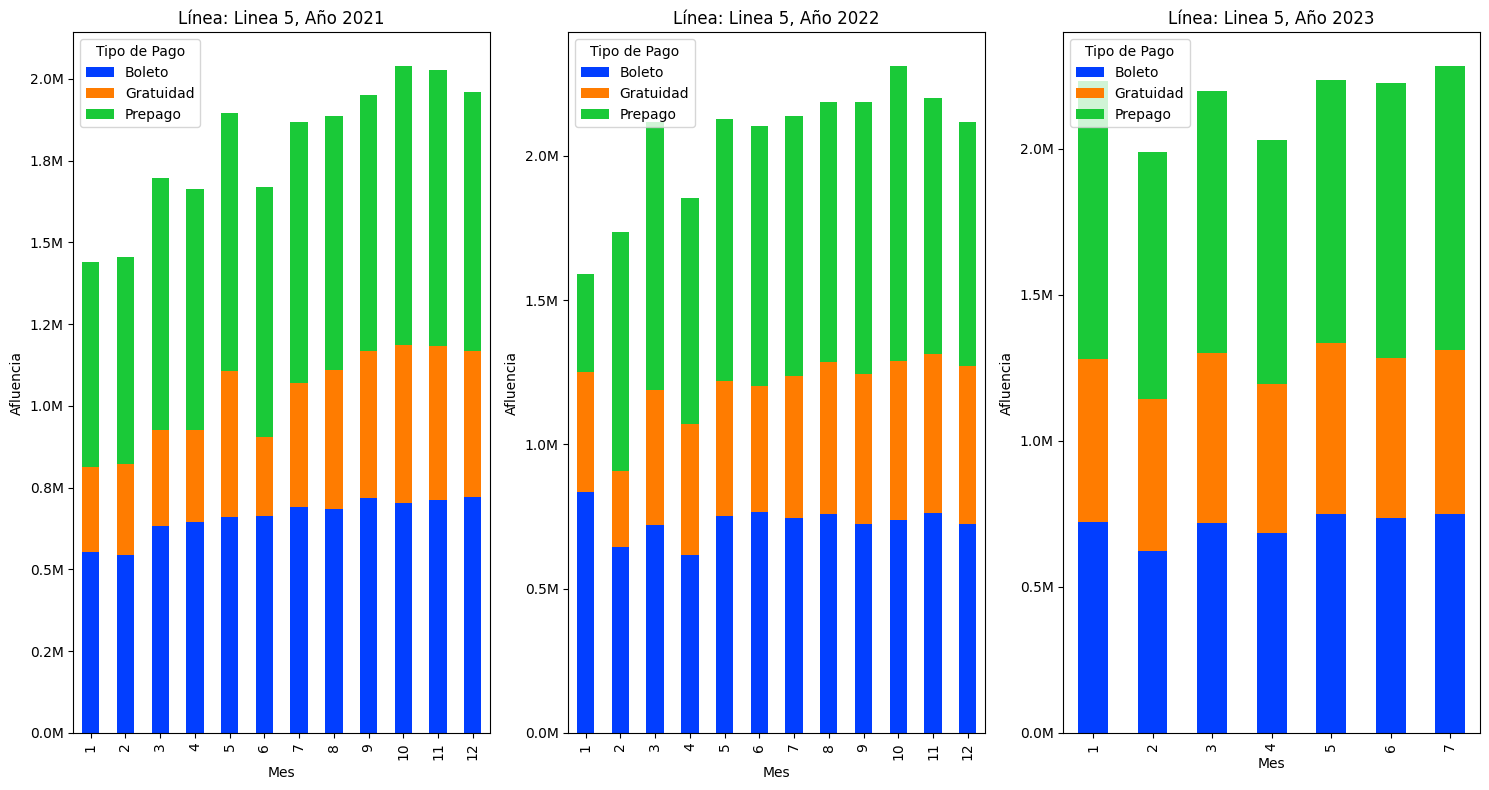

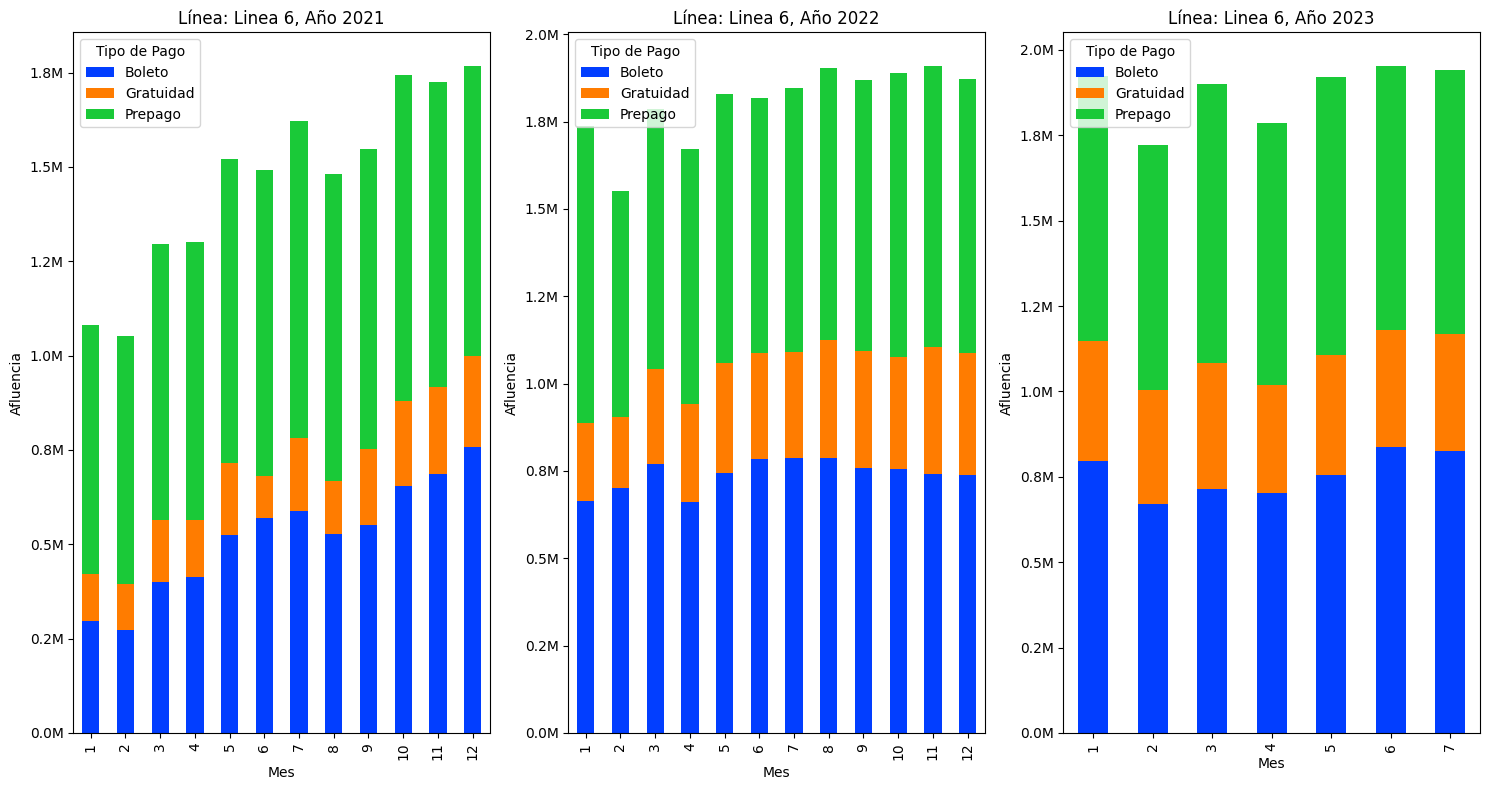

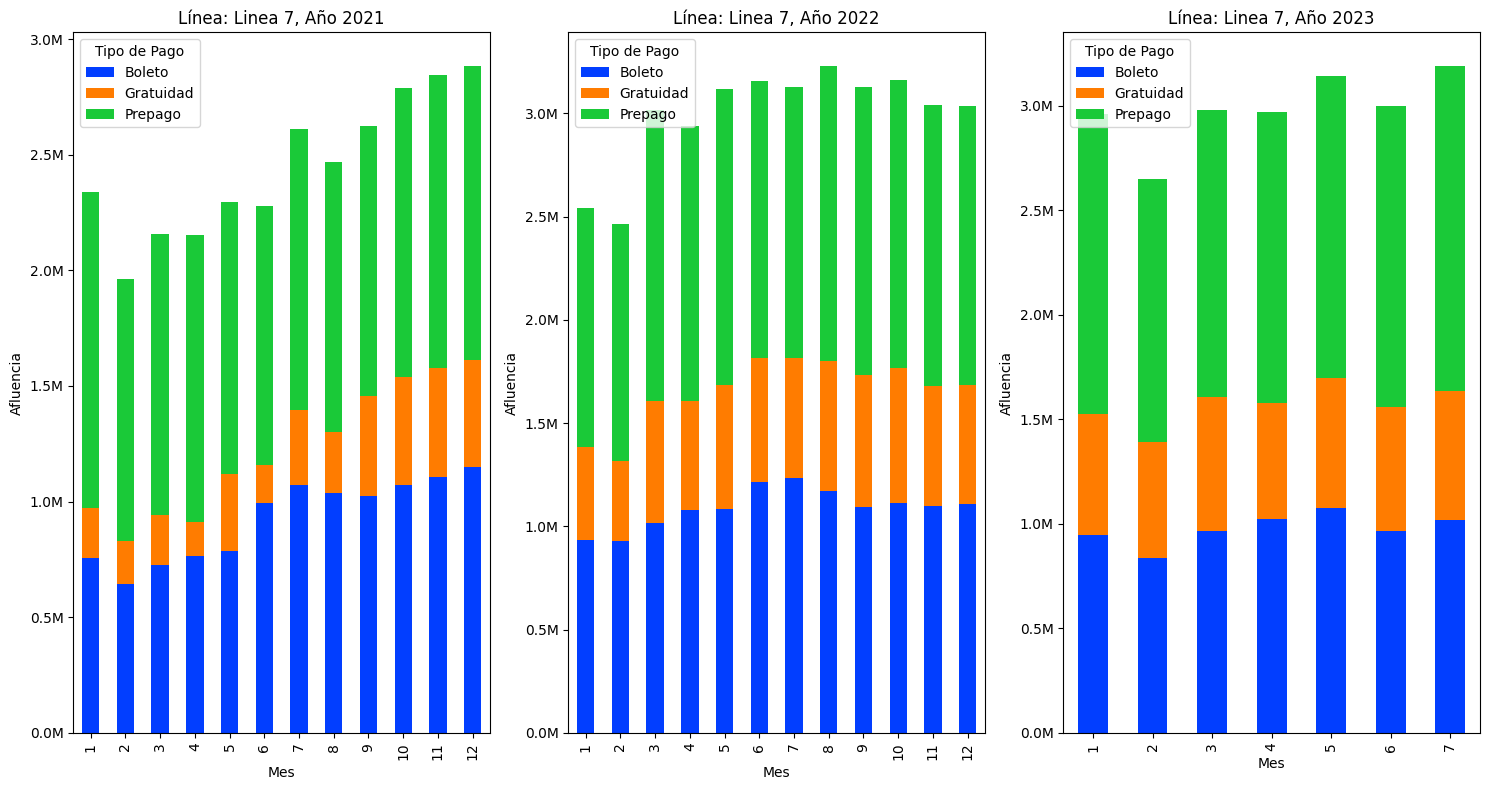

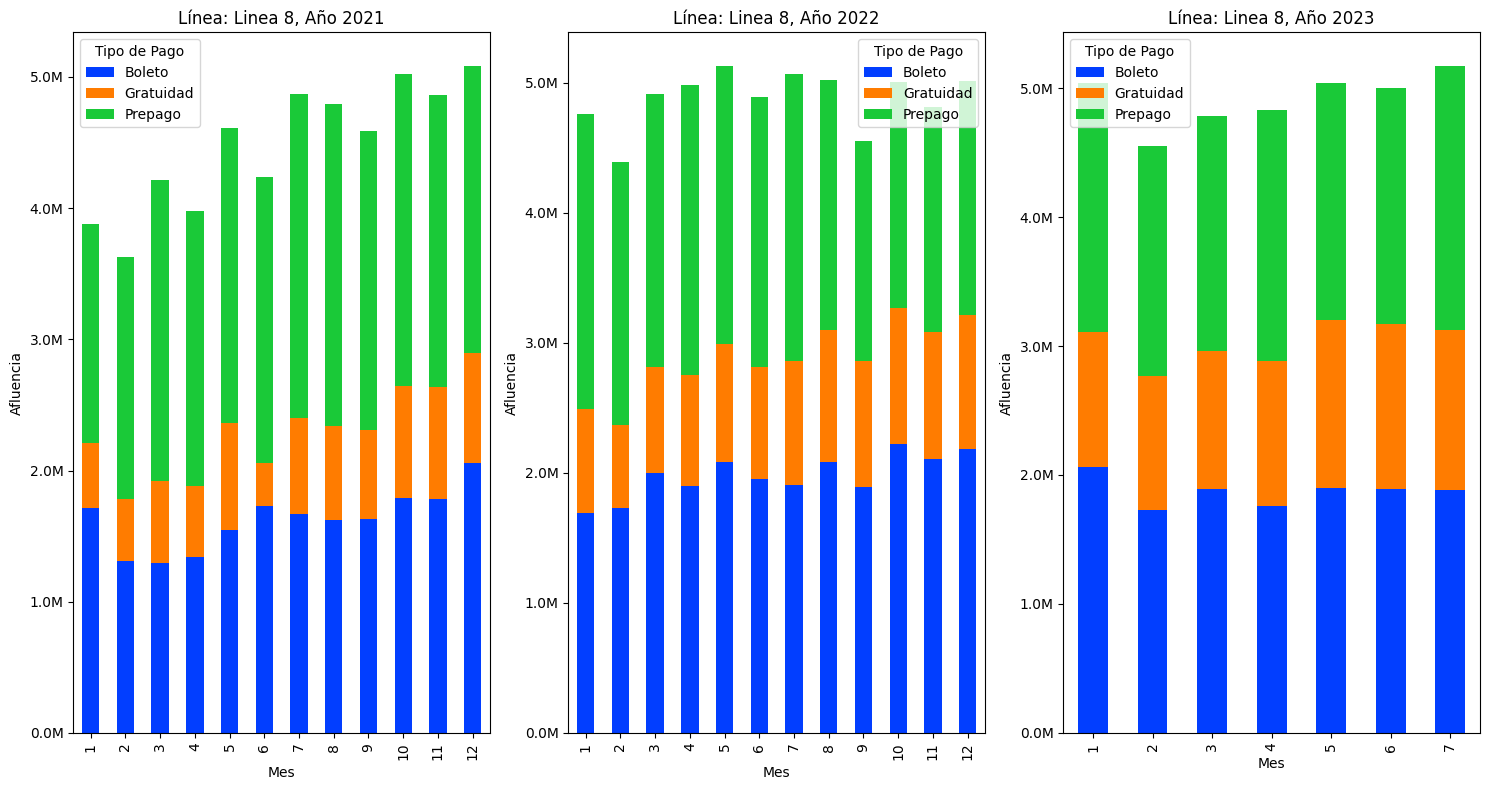

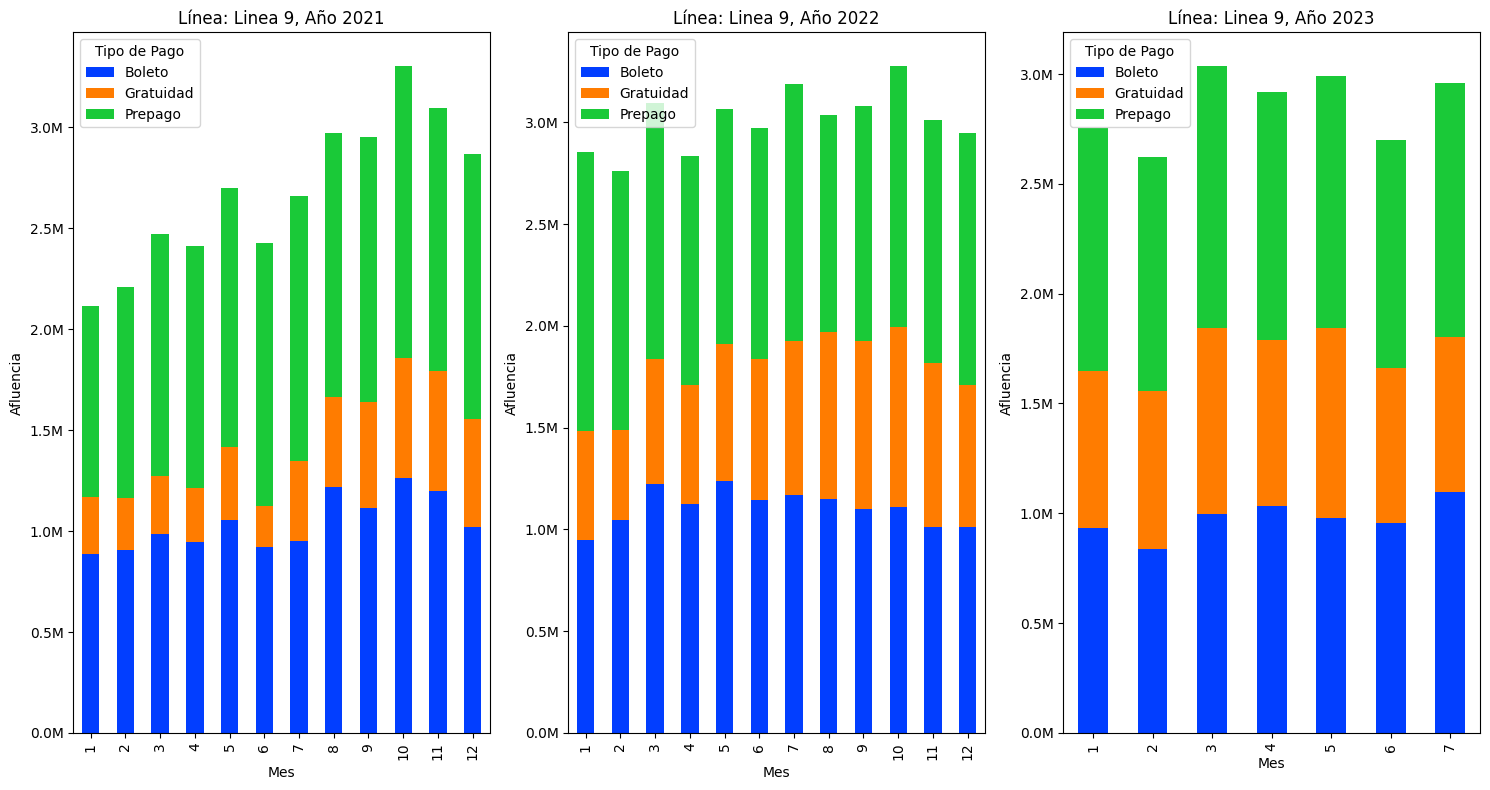

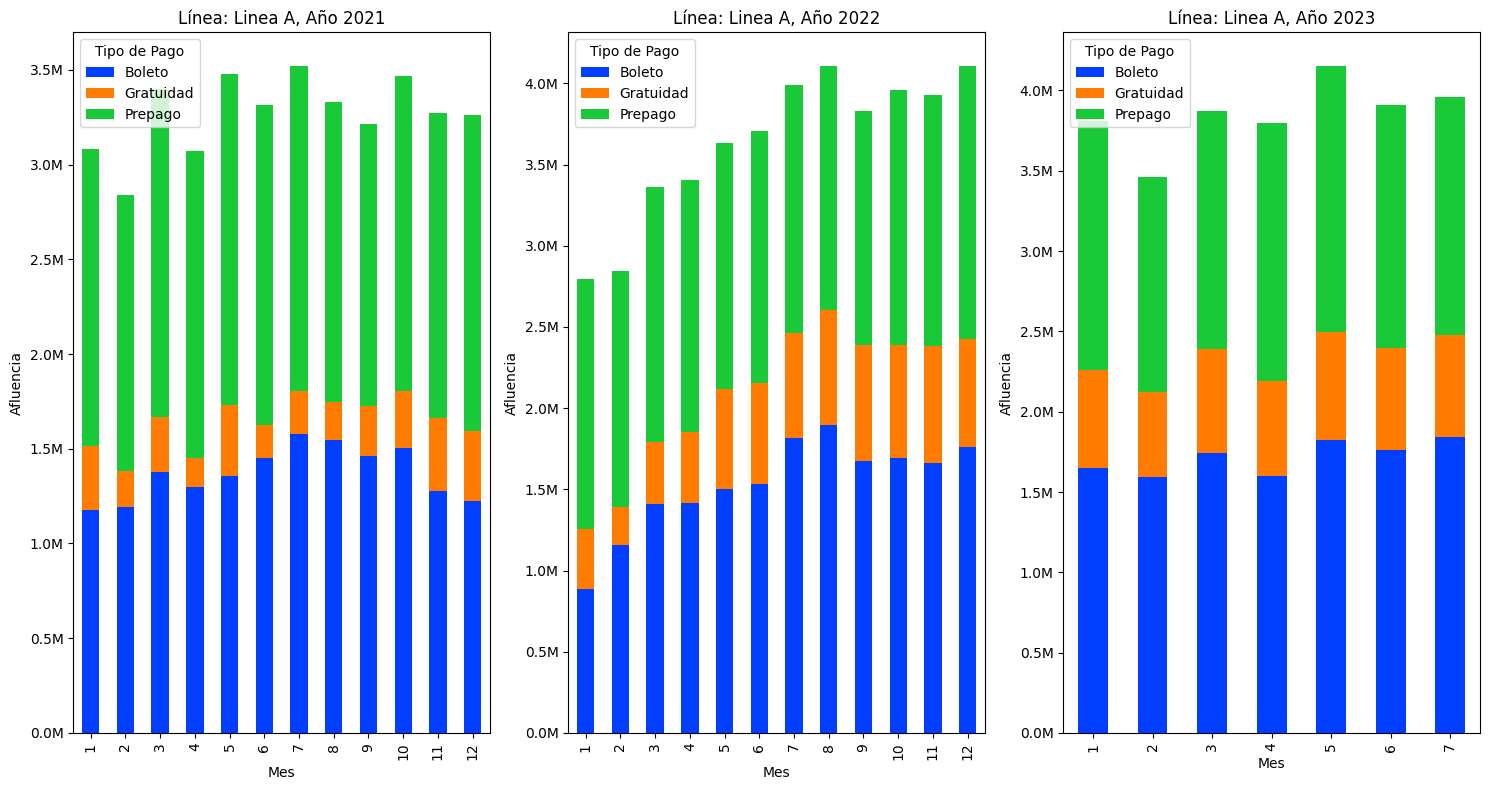

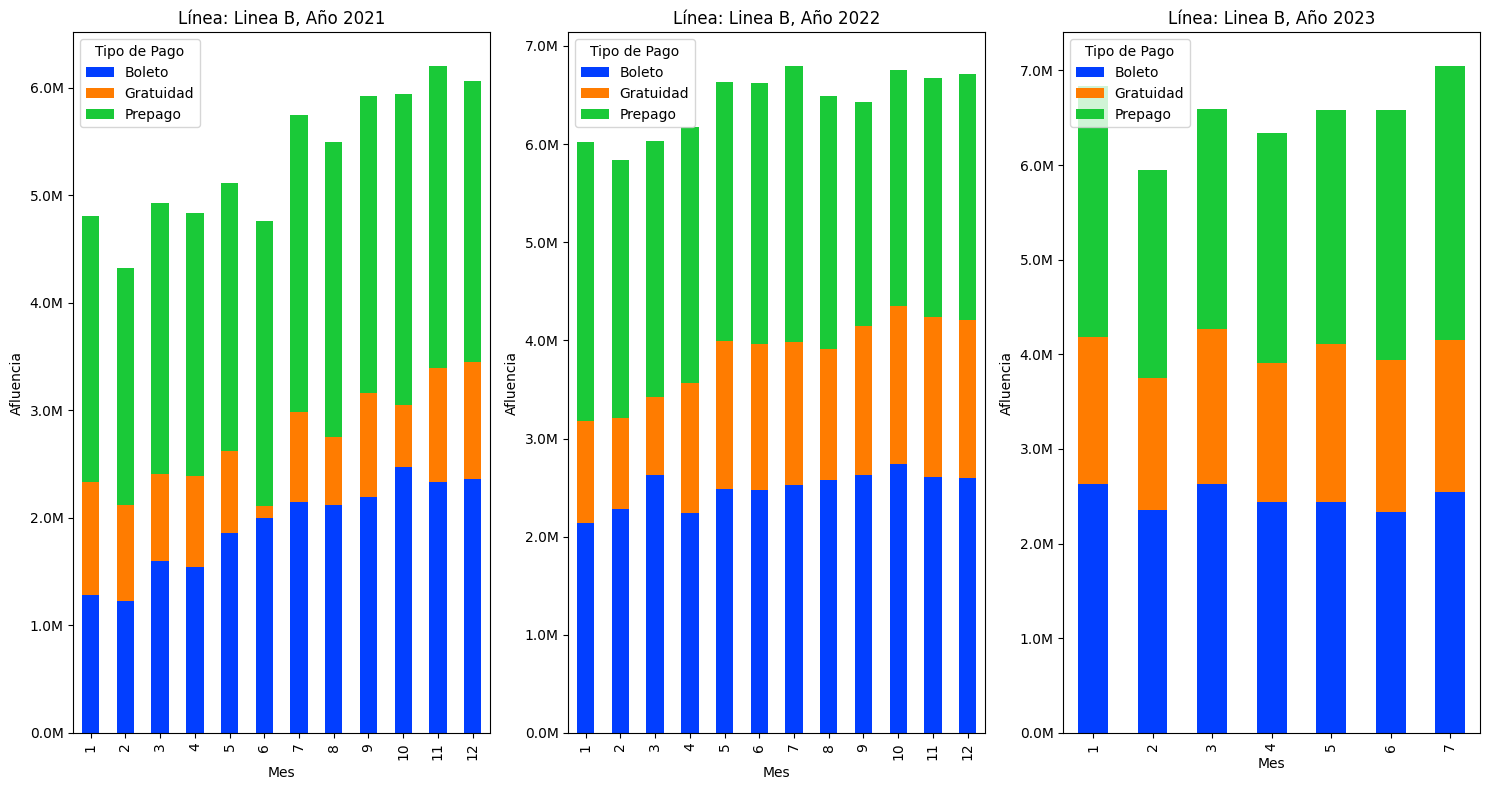

In [38]:
sns.set_palette("bright")
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

lineas_unicas = df_1['linea'].unique()

for linea in lineas_unicas:
    df_linea = df_1[df_1['linea'] == linea]
    años = df_linea['año'].unique()
    fig, axs = plt.subplots(1, len(años), figsize=(15, 8))

    for i, año in enumerate(años):
        df_año = df_linea[df_linea['año'] == año]
        df_grouped = df_año.groupby(['mes', 'tipo_pago'])['afluencia'].sum().unstack(fill_value=0)

        ax = df_grouped.plot(kind='bar', stacked=True, ax=axs[i])
        ax.set_title(f'Línea: {linea}, Año {año}')  # Incluye el nombre de la línea en el título
        ax.set_xlabel('Mes')
        ax.set_ylabel('Afluencia')
        ax.legend(title='Tipo de Pago')
        ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

   
    plt.tight_layout()
    plt.show()

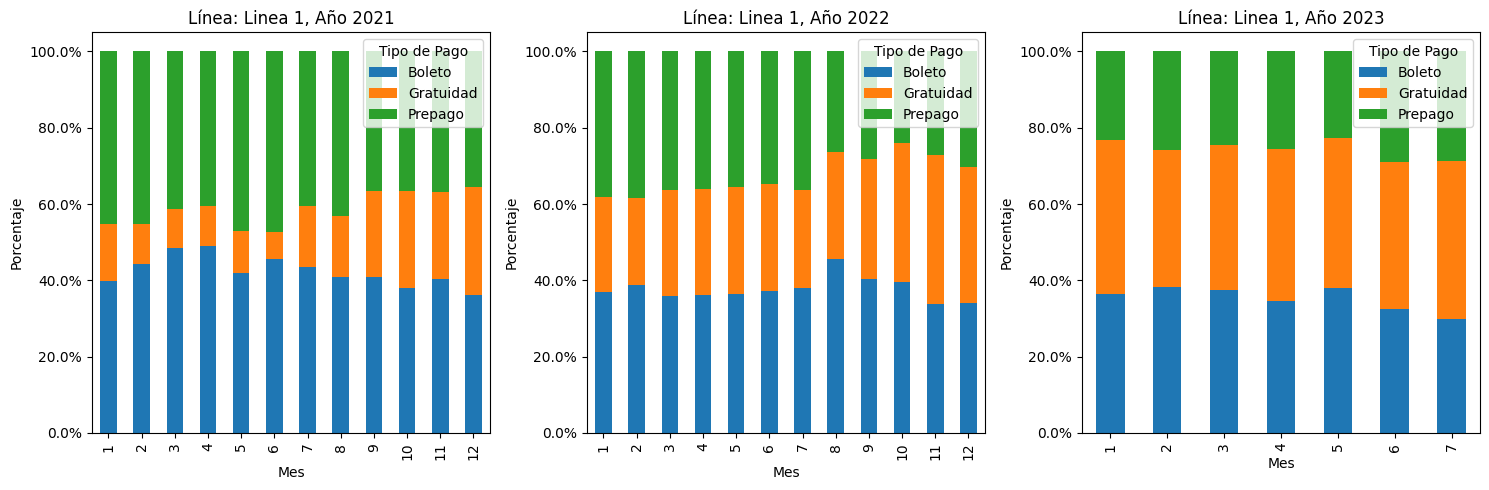

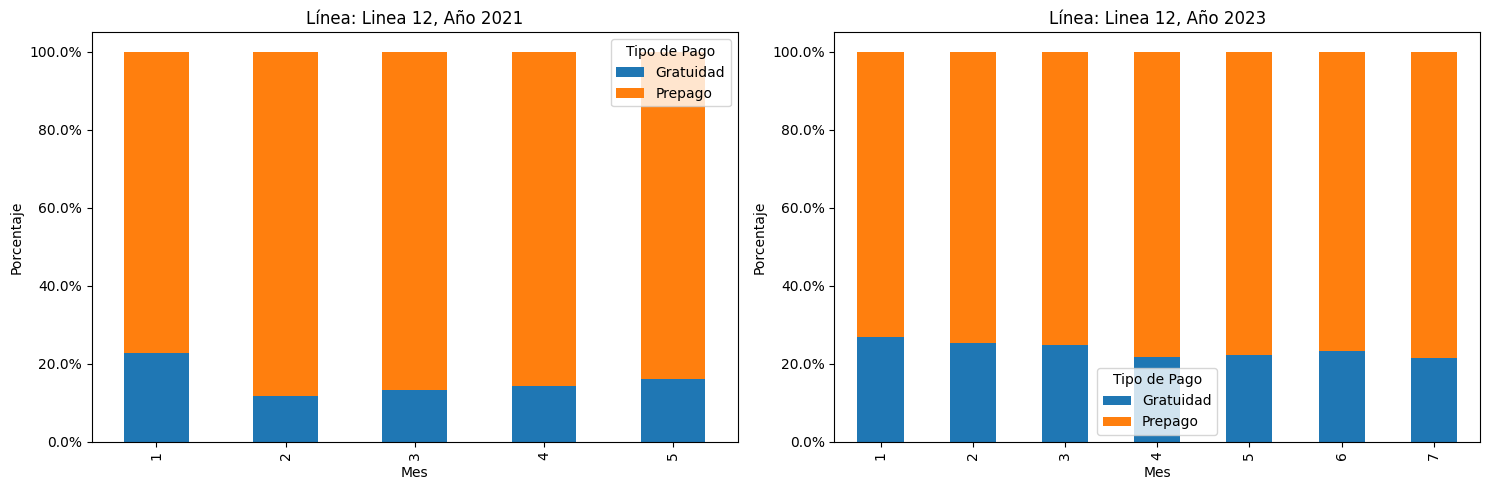

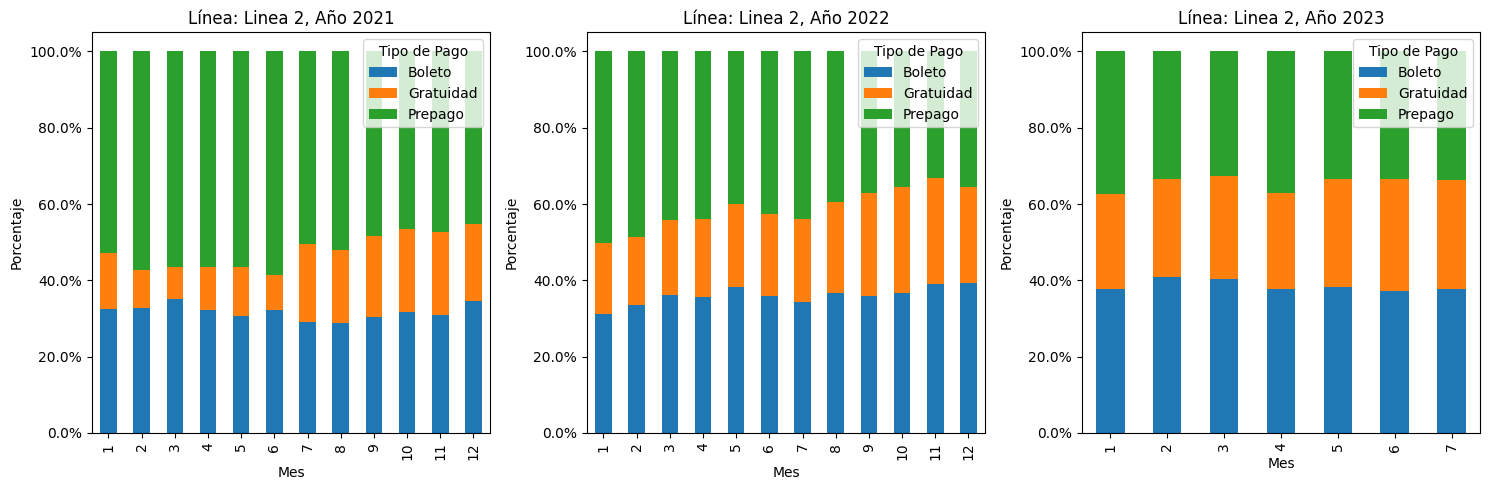

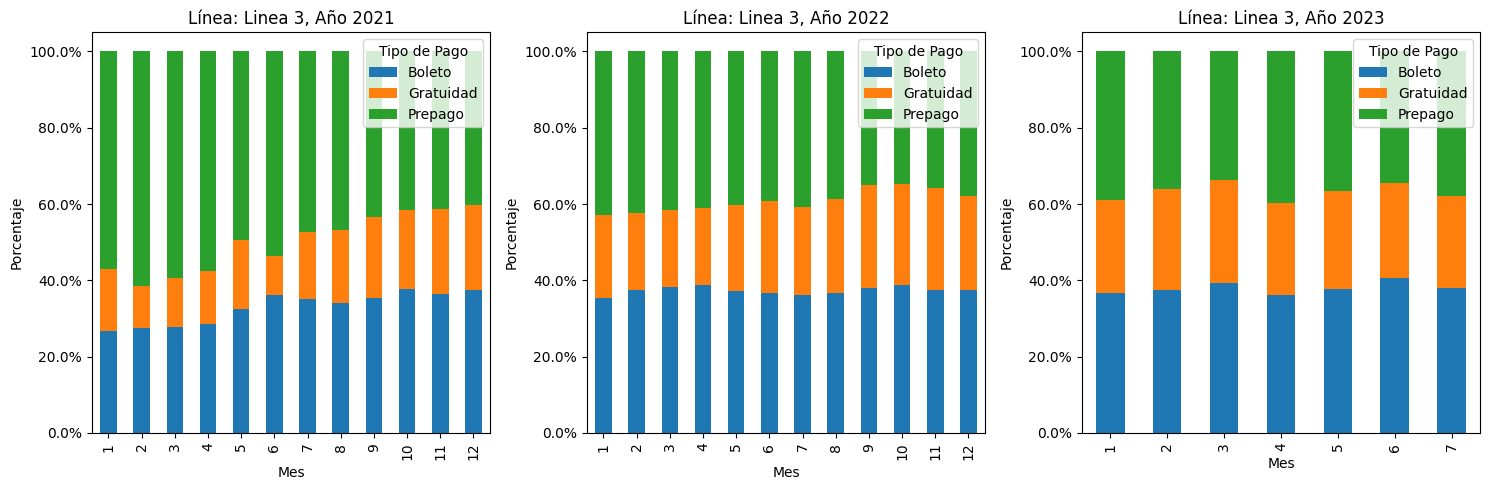

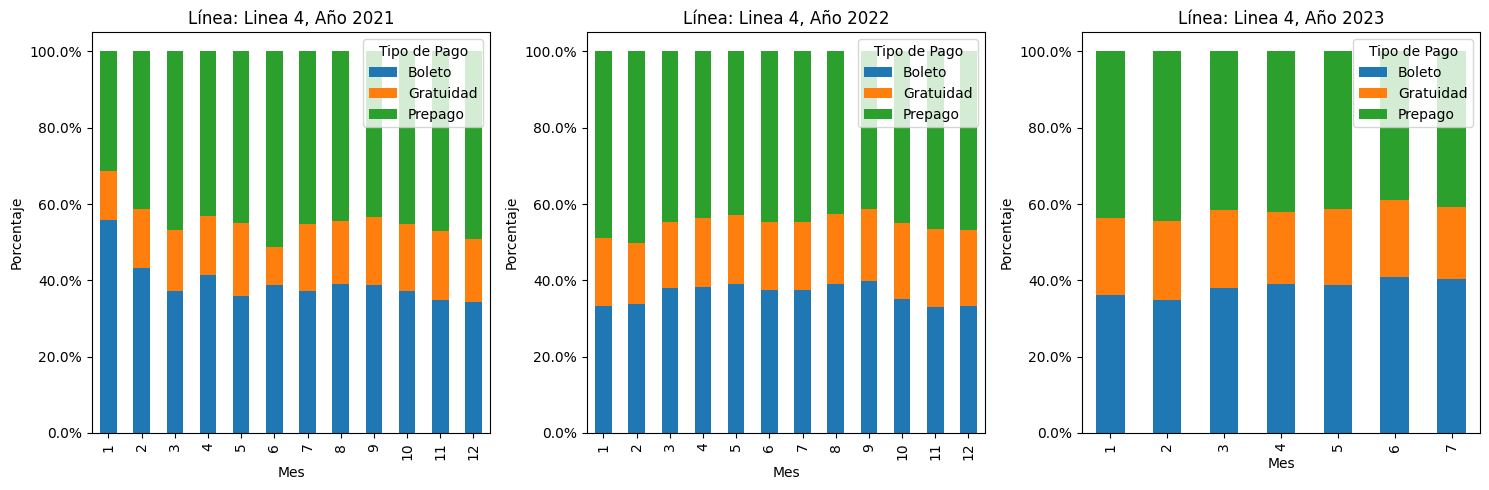

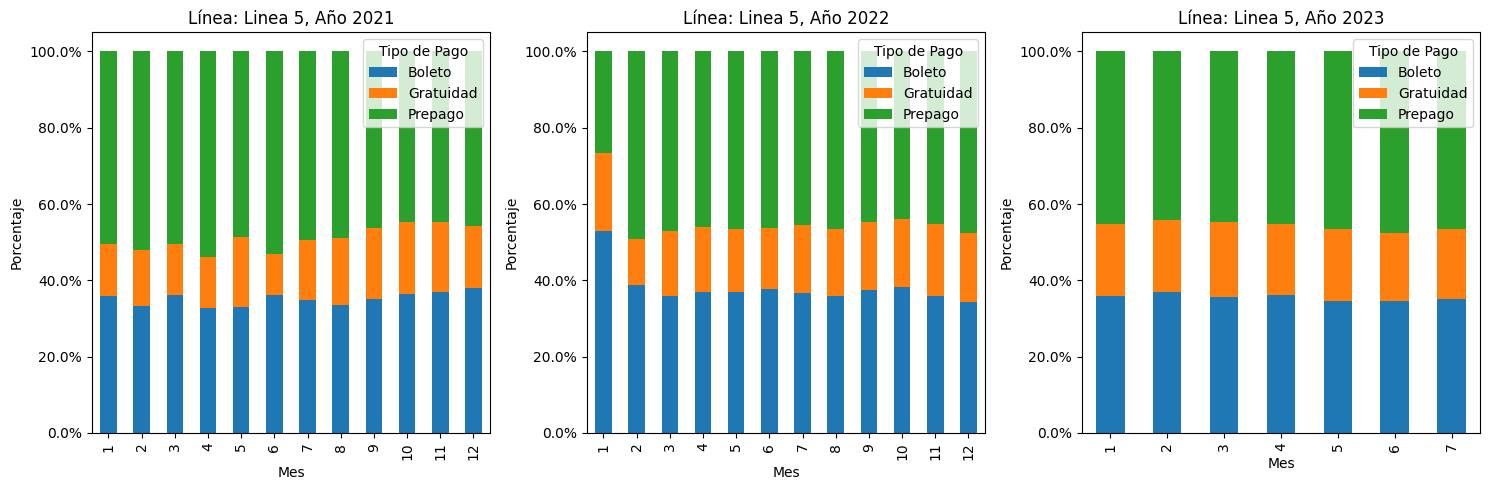

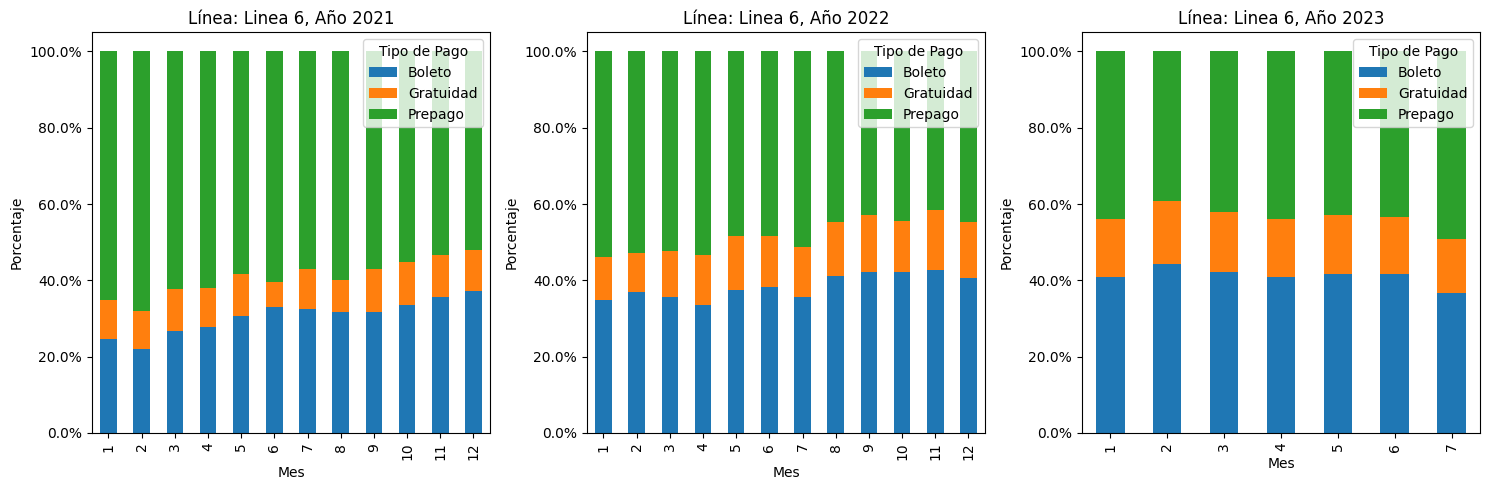

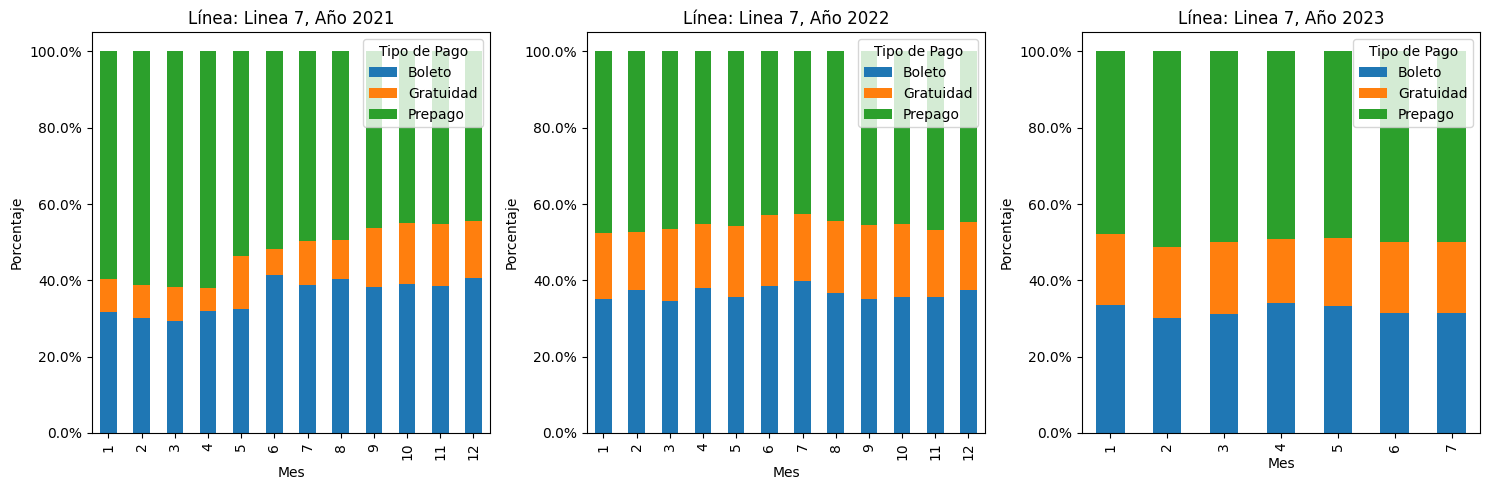

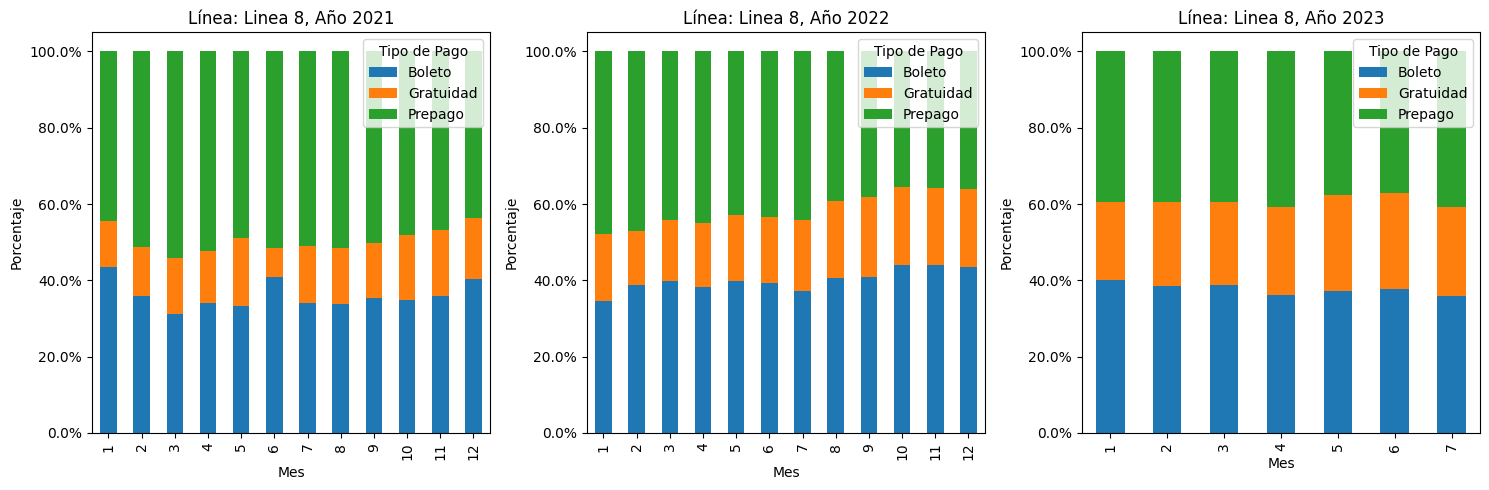

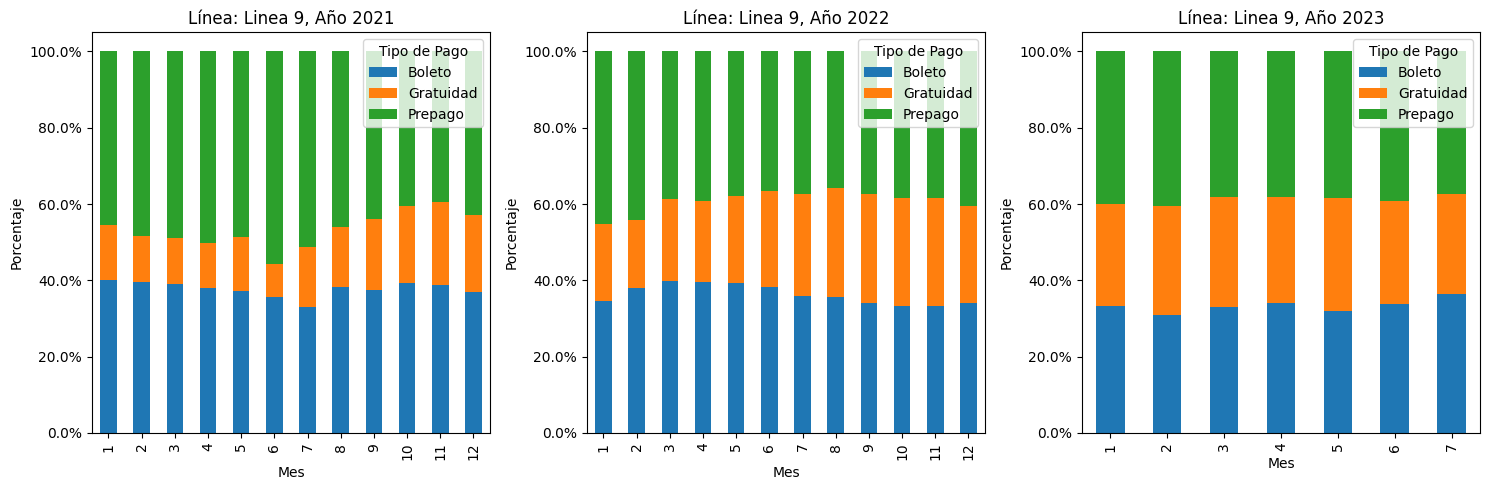

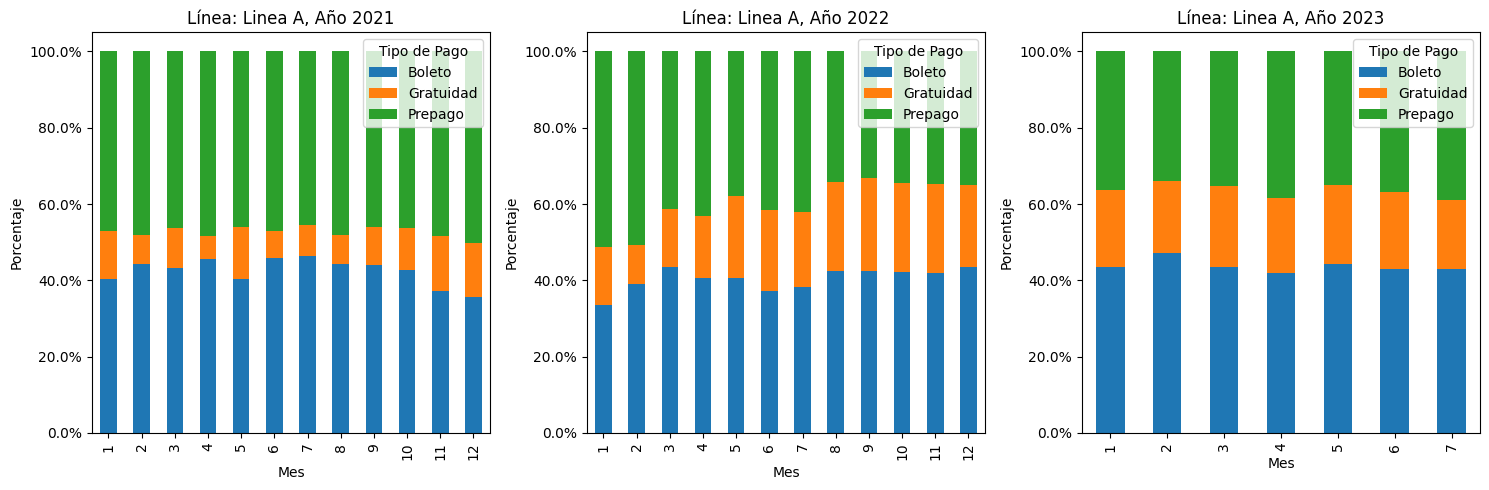

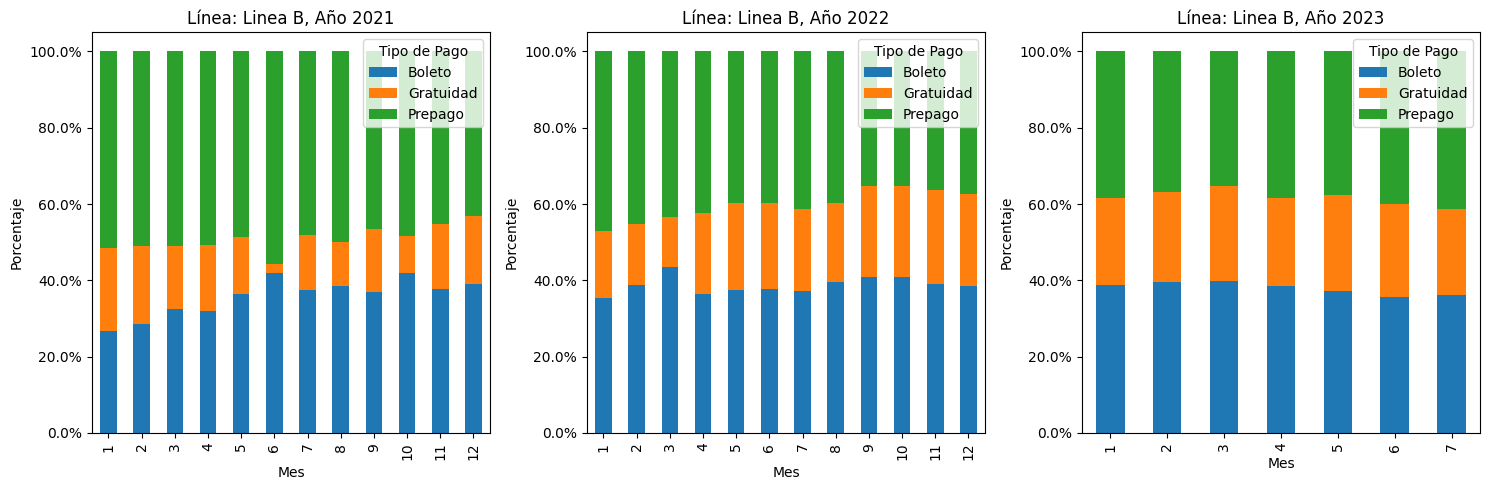

In [ ]:
def percentage_formatter(x, pos):
    return f'{x:.1%}'

# Obtener una lista de líneas únicas en el DataFrame
lineas_unicas = df_1['linea'].unique()

for linea in lineas_unicas:
    # Filtrar datos por línea
    df_linea = df_1[df_1['linea'] == linea]
    
    # Obtener una lista de años únicos en el DataFrame de la línea actual
    años = df_linea['año'].unique()

    # Configurar subplots en una sola fila
    fig, axs = plt.subplots(1, len(años), figsize=(15, 5))

    # Crear un gráfico para cada año
    for i, año in enumerate(años):
        df_año = df_linea[df_linea['año'] == año]
        df_grouped = df_año.groupby(['mes', 'tipo_pago'])['afluencia'].sum().unstack(fill_value=0)

        # Calcular porcentajes por mes
        df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0)

        ax = df_grouped_percentage.plot(kind='bar', stacked=True, ax=axs[i])
        ax.set_title(f'Línea: {linea}, Año {año}')
        ax.set_xlabel('Mes')
        ax.set_ylabel('Porcentaje')
        ax.legend(title='Tipo de Pago')
        ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

In [ ]:
df_3=df_1.copy()

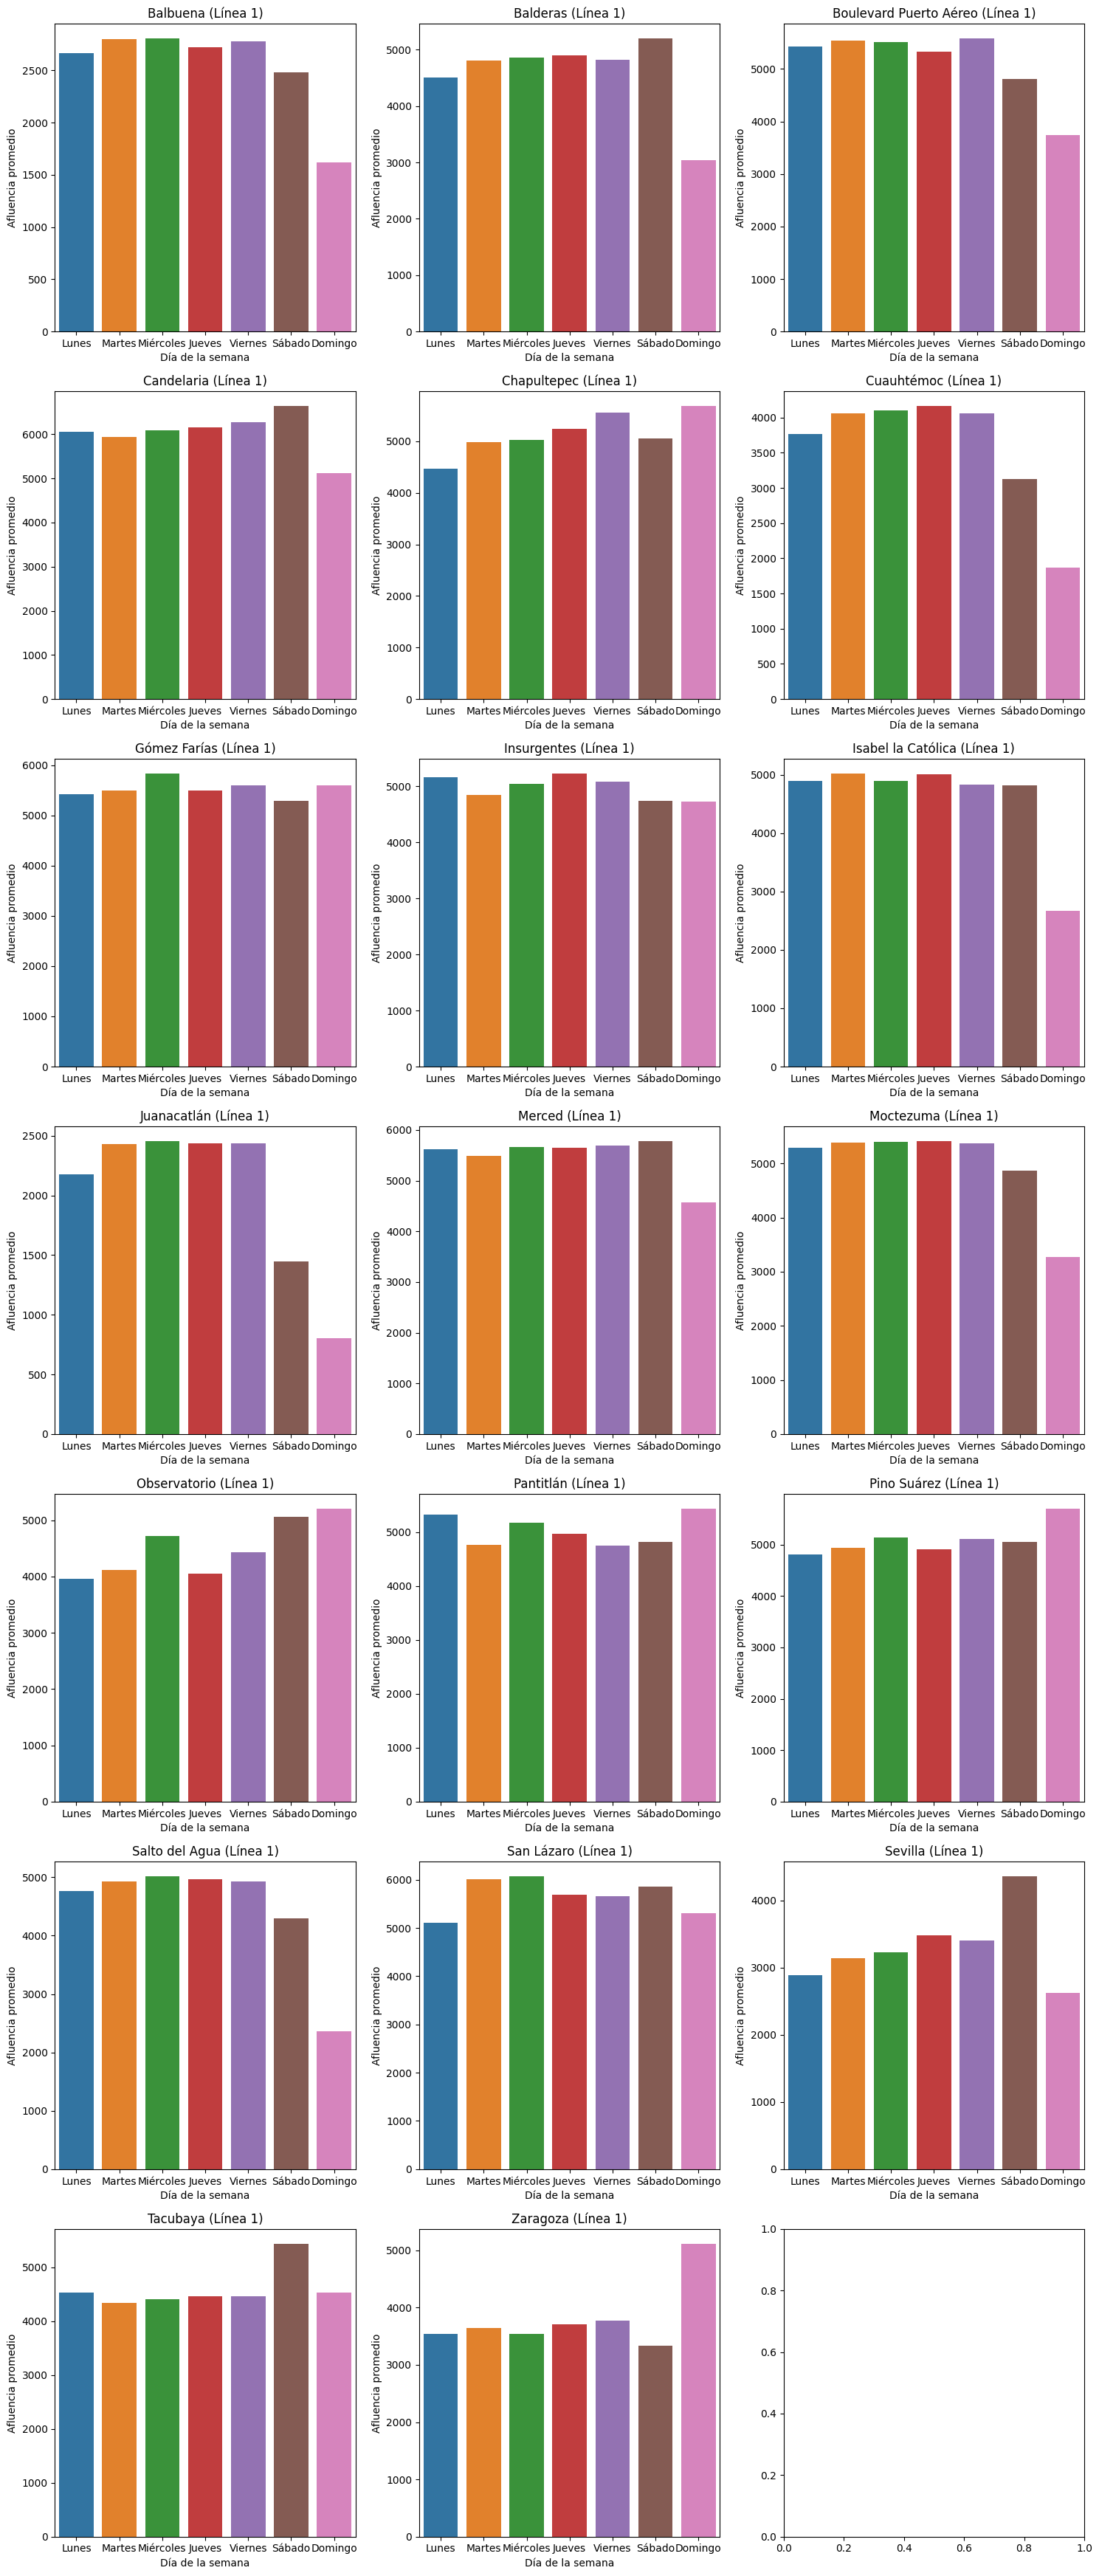

In [ ]:
df_linea1 = df_3[(df_3['linea'] == 'Linea 1') & (df_3['afluencia'] > 100)]

estaciones_unicas = df_linea1['estacion'].unique()
num_graficos = len(estaciones_unicas)
num_filas = (num_graficos // 3) + (num_graficos % 3 > 0)
num_columnas = 3

# Define el orden personalizado de los días de la semana
orden_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

for i, estacion in enumerate(estaciones_unicas):
    data_estacion = df_linea1[df_linea1['estacion'] == estacion]
    fila = i // num_columnas
    columna = i % num_columnas
    ax = axs[fila, columna]
    
    # Calcular el promedio de afluencia por día de la semana
    promedio_por_dia = data_estacion.groupby('dia_semana')['afluencia'].mean().reset_index()
    
    # Aplicar el orden personalizado a la columna 'dia_semana'
    promedio_por_dia['dia_semana'] = pd.Categorical(promedio_por_dia['dia_semana'], categories=orden_dias_semana, ordered=True)
    
    # Crear un gráfico de barras
    sns.barplot(x='dia_semana', y='afluencia', data=promedio_por_dia, ax=ax, errorbar=None)
    
    ax.set_title(f'{estacion} (Línea 1)')
    ax.set_xlabel('Día de la semana')
    ax.set_ylabel('Afluencia promedio')

plt.tight_layout()
plt.show()

In [43]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

No se toma línea 1 por que están cerradas partes de las estaciones, y línea 12 por la reparación.

Para la línea 2

In [41]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

df_linea2 = df[df['linea'] == "Linea 2"]

def create_map(año, mes):
    df_filtered = df_linea2[(df_linea2['año'] == año) & (df_linea2['mes'] == mes)]
    
    mexico_city_map = folium.Map(location=[19.4326, -99.1332], zoom_start=13)
    
    geolocator = Nominatim(user_agent="metro_linea2_map")

    for estacion in df_filtered['estacion'].unique():
        data_estacion = df_filtered[df_filtered['estacion'] == estacion]
        afluencia_promedio = data_estacion['afluencia'].mean()
        location = geolocator.geocode(estacion + ", Ciudad de México")

        if location is not None:
            latitud = location.latitude
            longitud = location.longitude
            folium.Marker(
                location=[latitud, longitud],
                popup=estacion,
                icon=folium.Icon(color='blue')
            ).add_to(mexico_city_map)
            escala = 0.1
            radio = afluencia_promedio * escala
            folium.Circle(
                location=[latitud, longitud],
                radius=radio,
                color='red',
                fill=True,
                fill_opacity=0.5
            ).add_to(mexico_city_map)
    
    display(mexico_city_map)  # Muestra el mapa generado en esta función

# Crear widgets interactivos para seleccionar el año y mes
años = df['año'].unique()
meses = df['mes'].unique()
año_widget = widgets.Dropdown(options=años, description='Año:')
mes_widget = widgets.Dropdown(options=meses, description='Mes:')

# Utilizar la función interact para actualizar el mapa según los widgets seleccionados
interact(create_map, año=año_widget, mes=mes_widget)


interactive(children=(Dropdown(description='Año:', options=(2021, 2022, 2023), value=2021), Dropdown(descripti…

<function __main__.create_map(año, mes)>

In [25]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim


# Filtrar los datos para la línea 2 y el año 2023
df_linea2_2023 = df[(df['linea'] == "Linea 2") ]

# Crear un mapa de la Ciudad de México
mexico_city_map = folium.Map(location=[19.4326, -99.1332], zoom_start=11)

# Inicializar el geocodificador de Nominatim
geolocator = Nominatim(user_agent="metro_linea2_map")

# Iterar a través de los nombres de las estaciones
for estacion in df_linea2_2023['estacion'].unique():
    # Filtrar los datos para la estación actual
    data_estacion = df_linea2_2023[df_linea2_2023['estacion'] == estacion]

    # Calcular la afluencia diaria promedio para la estación
    afluencia_promedio = data_estacion['afluencia'].mean()

    # Geocodificar el nombre de la estación para obtener sus coordenadas
    location = geolocator.geocode(estacion + ", Ciudad de México")

    if location is not None:
        latitud = location.latitude
        longitud = location.longitude

        # Agregar un marcador con el nombre de la estación
        folium.Marker(
            location=[latitud, longitud],
            popup=estacion,
            icon=folium.Icon(color='blue')
        ).add_to(mexico_city_map)

        # Escalar el radio del círculo al 10% del valor de afluencia promedio
        escala = 0.1
        radio = afluencia_promedio * escala

        # Agregar un círculo con el tamaño determinado por la afluencia promedio escalada
        folium.Circle(
            location=[latitud, longitud],
            radius=radio,
            color='red',
            fill=True,
            fill_opacity=0.5
        ).add_to(mexico_city_map)

# Mostrar el mapa interactivo
mexico_city_map.save('metro_linea2_ semanal.html') 

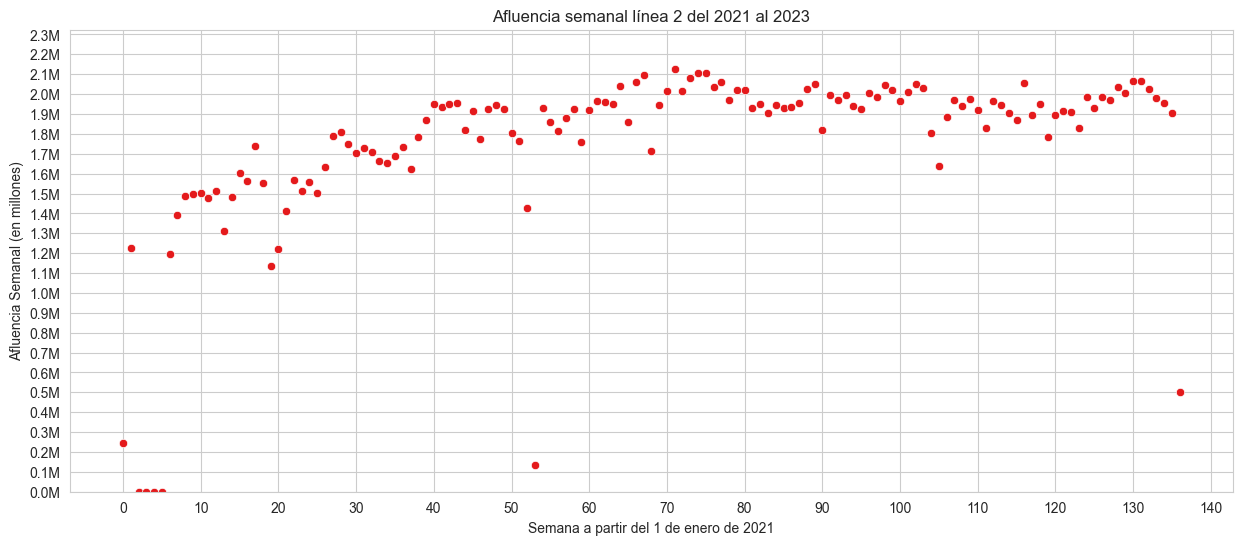

In [270]:
data_linea = df_1[(df_1['linea'] == "Linea 2")]
afluencia_men_lin2= data_linea.groupby(['año', 'semana'])['afluencia'].sum().reset_index()
plt.figure(figsize=(15, 6))
ax=sns.scatterplot(x=afluencia_men_lin2.index,y=afluencia_men_lin2["afluencia"])

# Aplicar formato personalizado al eje y (en millones)
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Agregar etiquetas a los ejes
plt.title("Afluencia semanal línea 2 del 2021 al 2023")
plt.xlabel("Semana a partir del 1 de enero de 2021")
plt.ylabel("Afluencia Semanal (en millones)")


ax.yaxis.set_major_locator(MultipleLocator(base=0.1e6))  # Establece ticks cada 0.1 millones (100,000)
ax.xaxis.set_major_locator(MultipleLocator(base=10)) 
plt.ylim([0, max(afluencia_men_lin2["afluencia"])+0.2e6])  # Ajusta el límite superior según tus datos

# Mostrar el gráfico

plt.show()

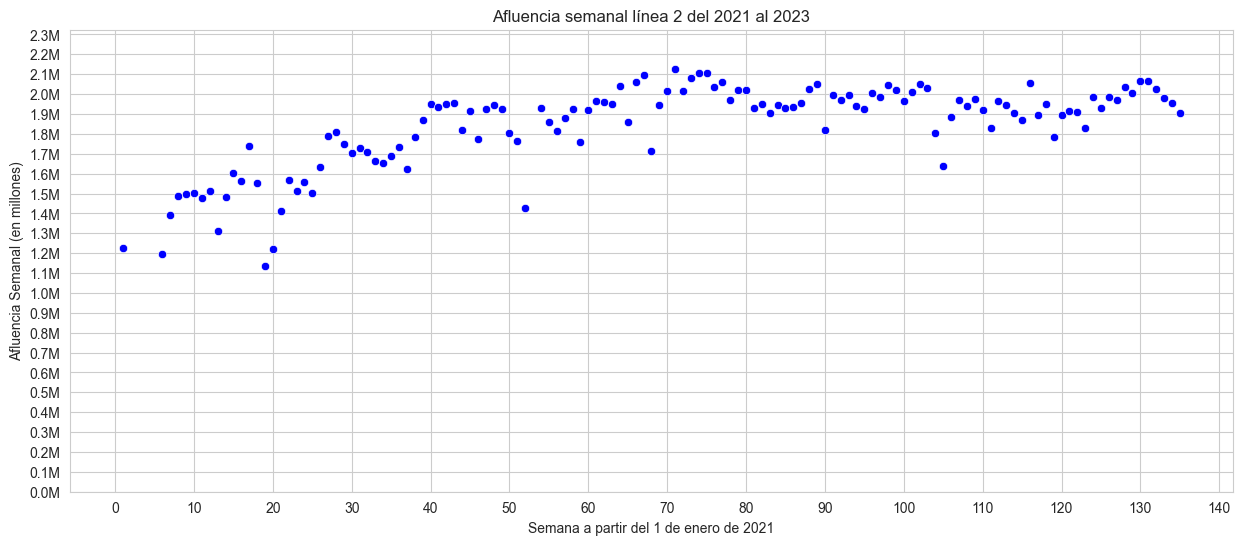

In [291]:
afluencia_men_lin2a=afluencia_men_lin2[(afluencia_men_lin2['afluencia'] > 800000)]
plt.figure(figsize=(15, 6))
sns.set_palette("Set1")
ax=sns.scatterplot(x=afluencia_men_lin2a.index,y=afluencia_men_lin2a["afluencia"],color='blue')
# Aplicar formato personalizado al eje y (en millones)
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Agregar etiquetas a los ejes
plt.title("Afluencia semanal línea 2 del 2021 al 2023")
plt.xlabel("Semana a partir del 1 de enero de 2021")
plt.ylabel("Afluencia Semanal (en millones)")


ax.yaxis.set_major_locator(MultipleLocator(base=0.1e6))  # Establece ticks cada 0.1 millones (100,000)
ax.xaxis.set_major_locator(MultipleLocator(base=10)) 
plt.ylim([0, max(afluencia_men_lin2["afluencia"])+0.2e6])  # Ajusta el límite superior según tus datos

# Mostrar el gráfico

plt.show()


In [273]:
afluencia_men_lin2a["millones_afluencia"]=afluencia_men_lin2a["afluencia"]/1000000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5496\3081645603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_men_lin2a["millones_afluencia"]=afluencia_men_lin2a["afluencia"]/1000000


In [274]:
afluencia_men_lin2a

año semana  afluencia  millones_afluencia
1    2021     01    1228098            1.228098
6    2021     06    1196894            1.196894
7    2021     07    1393161            1.393161
8    2021     08    1486877            1.486877
9    2021     09    1498137            1.498137
..    ...    ...        ...                 ...
131  2023     26    2068039            2.068039
132  2023     27    2024765            2.024765
133  2023     28    1982288            1.982288
134  2023     29    1955945            1.955945
135  2023     30    1905551            1.905551

[130 rows x 4 columns]

In [275]:
afluencia_men_lin2a["x_de_mes"]=afluencia_men_lin2a.index

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5496\578603657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afluencia_men_lin2a["x_de_mes"]=afluencia_men_lin2a.index


In [276]:
afluencia_men_lin2a

año semana  afluencia  millones_afluencia  x_de_mes
1    2021     01    1228098            1.228098         1
6    2021     06    1196894            1.196894         6
7    2021     07    1393161            1.393161         7
8    2021     08    1486877            1.486877         8
9    2021     09    1498137            1.498137         9
..    ...    ...        ...                 ...       ...
131  2023     26    2068039            2.068039       131
132  2023     27    2024765            2.024765       132
133  2023     28    1982288            1.982288       133
134  2023     29    1955945            1.955945       134
135  2023     30    1905551            1.905551       135

[130 rows x 5 columns]

In [277]:
afluencia_men_lin2a = afluencia_men_lin2a.reset_index(drop=True)
afluencia_men_lin2a

año semana  afluencia  millones_afluencia  x_de_mes
0    2021     01    1228098            1.228098         1
1    2021     06    1196894            1.196894         6
2    2021     07    1393161            1.393161         7
3    2021     08    1486877            1.486877         8
4    2021     09    1498137            1.498137         9
..    ...    ...        ...                 ...       ...
125  2023     26    2068039            2.068039       131
126  2023     27    2024765            2.024765       132
127  2023     28    1982288            1.982288       133
128  2023     29    1955945            1.955945       134
129  2023     30    1905551            1.905551       135

[130 rows x 5 columns]

In [278]:
afluencia_men_lin2a["x_de_mes"].corr(afluencia_men_lin2a["millones_afluencia"])

0.703657853971913

In [279]:
x = afluencia_men_lin2a["x_de_mes"]
y = afluencia_men_lin2a["millones_afluencia"]

In [280]:
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.70,0.10,0.20)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.30000000000000004
(90,)
(13,)
(27,)


Regresión lineal

In [281]:
lin_model = LinearRegression()
lin_model.fit(x_train.to_frame(), y_train)
y_train_predict = lin_model.predict(x_train.to_frame())
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_val_predict_lin = lin_model.predict(x_val.to_frame())
MSE = (mean_squared_error(y_val, y_val_predict_lin))
print("validación: MSE ="+str(MSE))

y_test_predict_lin = lin_model.predict(x_test.to_frame())
MSE = (mean_squared_error(y_test, y_test_predict_lin))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict_lin, 'diferencia':y_test-y_test_predict_lin})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.02214959495267764
validación: MSE =0.015869964654961807
Pruebas: MSE =0.02967547803248939


valor_real  prediccion  diferencia
0    1.984174    2.049206   -0.065032
1    1.806824    1.758839    0.047985
2    1.951210    1.808507    0.142703
3    1.966356    1.800866    0.165490
4    1.937474    1.896381    0.041093
5    1.982288    2.075951   -0.093663
6    2.027185    1.904023    0.123162
7    1.952054    1.720633    0.231421
8    1.196894    1.590732   -0.393838
9    2.105106    1.854355    0.250751

Text(0, 0.5, 'Afluencia Semanal (en millones)')

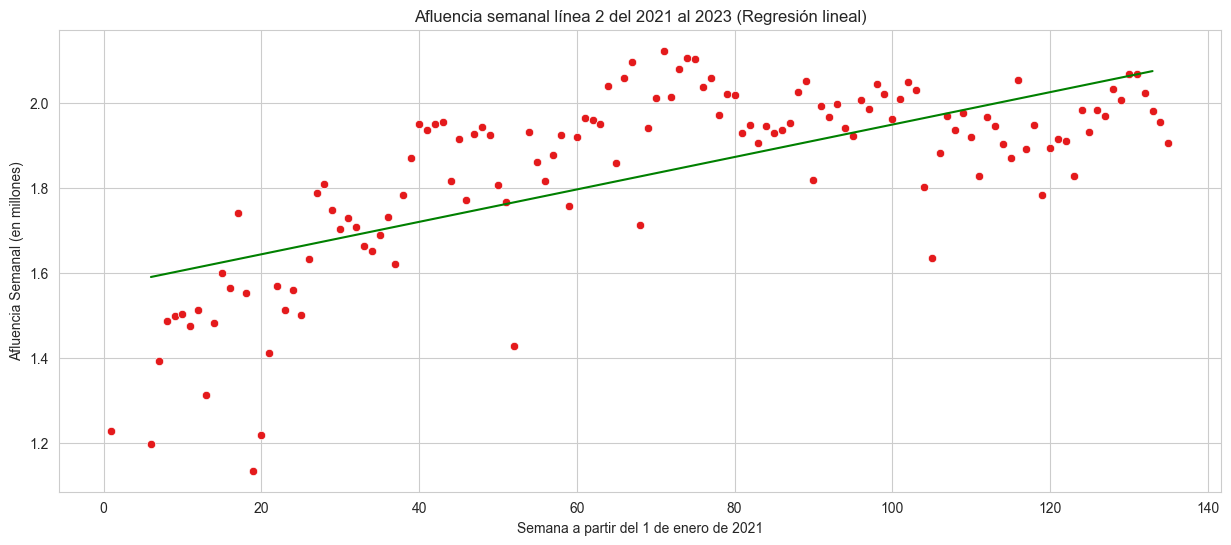

In [285]:
plt.figure(figsize=(15, 6))
ax=sns.scatterplot(x=afluencia_men_lin2a["x_de_mes"],y=afluencia_men_lin2a["millones_afluencia"])
ax=sns.lineplot(x=x_test, y=y_test_predict_lin , color='g');
plt.title("Afluencia semanal línea 2 del 2021 al 2023 (Regresión lineal)")
plt.xlabel("Semana a partir del 1 de enero de 2021")
plt.ylabel("Afluencia Semanal (en millones)")

Regresión polinómica (grado 2)

In [286]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(x_train.to_frame())
Xpolyval = poly.fit_transform(x_val.to_frame())
Xpolytest = poly.fit_transform(x_test.to_frame())

poly_model.fit(Xpolytrain, y_train)
y_predict_pol = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(y_train,y_predict_pol)
print("Entrenamiento: MSE ="+str(MSE))

y_val_predict = poly_model.predict(Xpolyval)
MSE = (mean_squared_error(y_val, y_val_predict))
print("validación: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.013552851489379538
validación: MSE =0.00751890631301484
Pruebas: MSE =0.013353861606568459


valor_real  prediccion  diferencia
0    1.984174    1.918399    0.065775
1    1.806824    1.841715   -0.034891
2    1.951210    1.915751    0.035459
3    1.966356    1.905997    0.060359
4    1.937474    1.985149   -0.047675
5    1.982288    1.882246    0.100042
6    2.027185    1.987465    0.039720
7    1.952054    1.767656    0.184398
8    1.196894    1.404579   -0.207685
9    2.105106    1.961777    0.143329

Text(0, 0.5, 'Afluencia Semanal (en millones)')

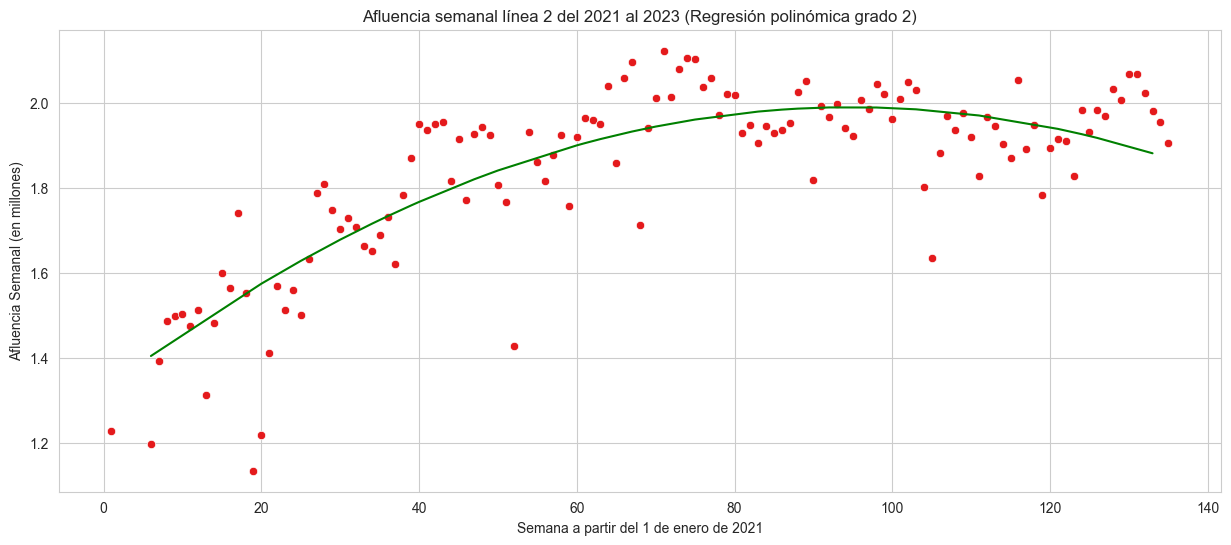

In [287]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=afluencia_men_lin2a["x_de_mes"],y=afluencia_men_lin2a["millones_afluencia"])
sns.lineplot(x=x_test, y=y_test_predict , color='g');
plt.title("Afluencia semanal línea 2 del 2021 al 2023 (Regresión polinómica grado 2)")
plt.xlabel("Semana a partir del 1 de enero de 2021")
plt.ylabel("Afluencia Semanal (en millones)")

Regresión logística

In [288]:
import numpy as np
from scipy.optimize import curve_fit

# Define la función logística que quieres ajustar a los datos
def logistic_function(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Ajusta la función logística a los datos
params, covariance = curve_fit(logistic_function, x_train, y_train)

# Extrae los parámetros ajustados
a, b, c = params

# Realiza predicciones en los datos de entrenamiento
y_train_predict = logistic_function(x_train, a, b, c)

# Realiza predicciones en los datos de validación
y_val_predict = logistic_function(x_val, a, b, c)

# Realiza predicciones en los datos de prueba
y_test_predict = logistic_function(x_test, a, b, c)

# Calcula el MSE en los datos 
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

MSE = mean_squared_error(y_val,y_val_predict)
print("Entrenamiento: MSE ="+str(MSE))

MSE = mean_squared_error(y_test, y_test_predict)
print("Pruebas: MSE =", MSE)

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.013123413490795172
Entrenamiento: MSE =0.007073294828141517
Pruebas: MSE = 0.012815298758509275


valor_real  prediccion  diferencia
0    1.984174    1.966013    0.018161
1    1.806824    1.859581   -0.052757
2    1.951210    1.908225    0.042985
3    1.966356    1.902404    0.063952
4    1.937474    1.948152   -0.010678
5    1.982288    1.966921    0.015367
6    2.027185    1.950030    0.077155
7    1.952054    1.799334    0.152720
8    1.196894    1.341443   -0.144549
9    2.105106    1.934094    0.171012

Text(0, 0.5, 'Afluencia Semanal (en millones)')

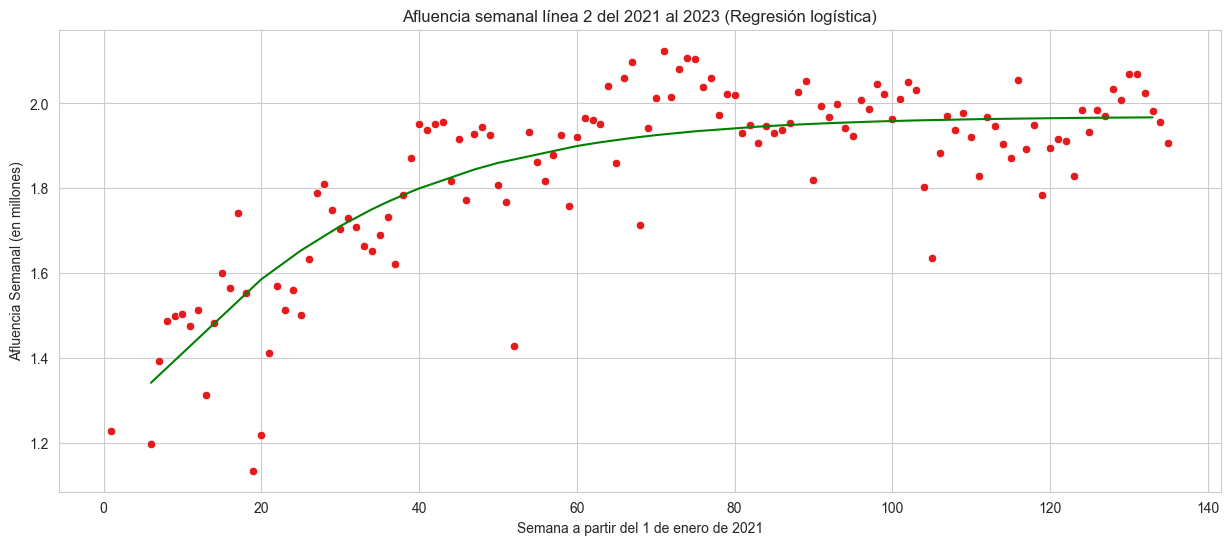

In [289]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=afluencia_men_lin2a["x_de_mes"],y=afluencia_men_lin2a["millones_afluencia"])
sns.lineplot(x=x_test, y=y_test_predict , color='g');
plt.title("Afluencia semanal línea 2 del 2021 al 2023 (Regresión logística)")
plt.xlabel("Semana a partir del 1 de enero de 2021")
plt.ylabel("Afluencia Semanal (en millones)")

In [230]:
from datetime import datetime

# Define una función que toma una fecha en formato "YYYY-MM-DD" y devuelve el número personalizado de semana
def custom_week_number(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    base_date = datetime(2021, 1, 1)  # Fecha de inicio para asignar la semana 1
    weeks_difference = (date_obj - base_date).days // 7 + 1
    return weeks_difference

In [231]:
fecha = "2024-09-25"  #Fecha deseada
numero_semana = custom_week_number(fecha)
print(f"La fecha {fecha} corresponde al número de semana a partir del 1 de enero de 2021: {numero_semana}")
#coeficientes de regresión lineal
coeficientes_lineal = lin_model.coef_[0]
intercepto_lineal = lin_model.intercept_
prediccion_lineal=coeficientes_lineal*numero_semana+intercepto_lineal
#para la cuadrática
x_eval = poly.fit_transform(np.array([[numero_semana]]))
prediccion_cuad = poly_model.predict(x_eval)

#Para la logística
y_test_predict = logistic_function(numero_semana, a, b, c)
print(f"La predicción para la línea 2 en la fecha {fecha}")
print(f"Predicción de regresión lineal: {prediccion_lineal:.3f} millones de personas")
print(f"Predicción de regresión polinomial grado 2: {prediccion_cuad[0]:.3f} millones de personas")
print(f"Predicción de regresión logística: {y_test_predict:.3f} millones de personas")

La fecha 2024-09-25 corresponde al número de semana a partir del 1 de enero de 2021: 195
La predicción para la línea 2 en la fecha 2024-09-25
Predicción de regresión lineal: 2.350 millones de personas
Predicción de regresión polinomial grado 2: 1.243 millones de personas
Predicción de regresión logística: 1.983 millones de personas


In [238]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = x
y = y

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []

# Realiza la validación cruzada
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(X_train.to_frame(), y_train)

    y_pred = model.predict(X_test.to_frame())

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calcula el MSE promedio en todos los pliegues
average_mse = sum(mse_scores) / num_folds

print(f"Resultados de validación cruzada k-fold para regresión lineal (k={num_folds}):")
for fold, mse in enumerate(mse_scores, start=1):
    print(f"Fold {fold}: MSE = {mse:.4f}")

print(f"Promedio de MSE en todos los pliegues: {average_mse:.4f}")


Resultados de validación cruzada k-fold para regresión lineal (k=5):
Fold 1: MSE = 0.0140
Fold 2: MSE = 0.0332
Fold 3: MSE = 0.0205
Fold 4: MSE = 0.0137
Fold 5: MSE = 0.0362
Promedio de MSE en todos los pliegues: 0.0235


In [258]:
X = x
y = y

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []

# Realiza la validación cruzada
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly_model = LinearRegression()
    poly = PolynomialFeatures(degree=2)
    
    Xpolytrain = poly.fit_transform(X_train.to_frame())
    Xpolytest = poly.fit_transform(X_test.to_frame())
    poly_model.fit(Xpolytrain, y_train)
    y_pred = poly_model.predict(Xpolytest)
   
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calcula el MSE promedio en todos los pliegues
average_mse = sum(mse_scores) / num_folds

print(f"Resultados de validación cruzada k-fold de regresión polinómica grado 2(k={num_folds}):")
for fold, mse in enumerate(mse_scores, start=1):
    print(f"Fold {fold}: MSE = {mse:.4f}")

print(f"Promedio de MSE en todos los pliegues: {average_mse:.4f}")

Resultados de validación cruzada k-fold de regresión polinómica grado 2(k=5):
Fold 1: MSE = 0.0080
Fold 2: MSE = 0.0230
Fold 3: MSE = 0.0112
Fold 4: MSE = 0.0054
Fold 5: MSE = 0.0187
Promedio de MSE en todos los pliegues: 0.0133


In [257]:
X = x
y = y

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []

# Realiza la validación cruzada
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define la función logística que quieres ajustar a tus datos
    def logistic_function(x, a, b, c):
        return a / (1 + np.exp(-b * (x - c)))

    # Ajusta la función logística a tus datos
    params, covariance = curve_fit(logistic_function, X_train, y_train)

    # Extrae los parámetros ajustados
    a, b, c = params
    
    y_pred = logistic_function(X_test, a, b, c)
      
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calcula el MSE promedio en todos los pliegues
average_mse = sum(mse_scores) / num_folds

print(f"Resultados de validación cruzada k-fold de regresión polinómica grado 2(k={num_folds}):")
for fold, mse in enumerate(mse_scores, start=1):
    print(f"Fold {fold}: MSE = {mse:.4f}")

print(f"Promedio de MSE en todos los pliegues: {average_mse:.4f}")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Resultados de validación cruzada k-fold de regresión polinómica grado 2(k=5):
Fold 1: MSE = 0.0071
Fold 2: MSE = 0.0594
Fold 3: MSE = 0.0098
Fold 4: MSE = 0.0053
Fold 5: MSE = 0.0664
Promedio de MSE en todos los pliegues: 0.0296
